# Aulas de Introdução a Ciências da Computação (2020-02)

## Aula 01

## Análise: Base de dados Iris

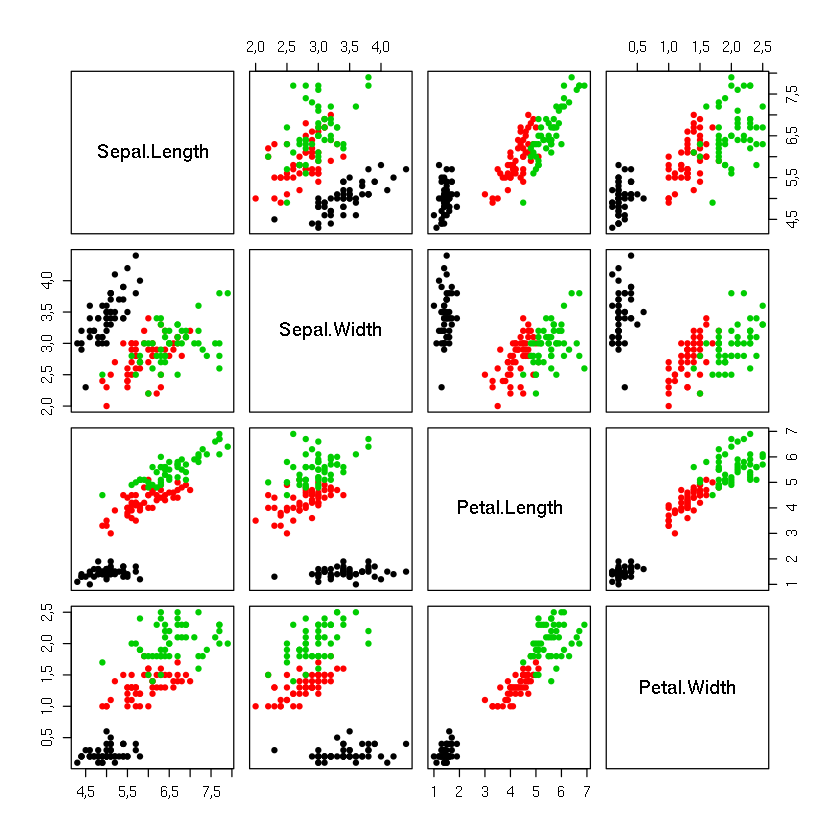

In [1]:
plot(iris[,1:4], col = iris[,5], pch=20, cex=1.3)

## Correlações de variáveis

In [2]:
names(iris)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "Species"

In [43]:
cor(iris[,1], iris[,2])

[1] -0,1175698

In [44]:
cor(iris[,1], iris[,3])

[1] 0,8717538

Produto escalar entre matrizes:

In [45]:
iris_1_centralizada = iris[,1]-mean(iris[,1])
iris_2_centralizada = iris[,2]-mean(iris[,2])

iris_1_centralizada%*%iris_2_centralizada

[,1]     
[1,] -6,322667

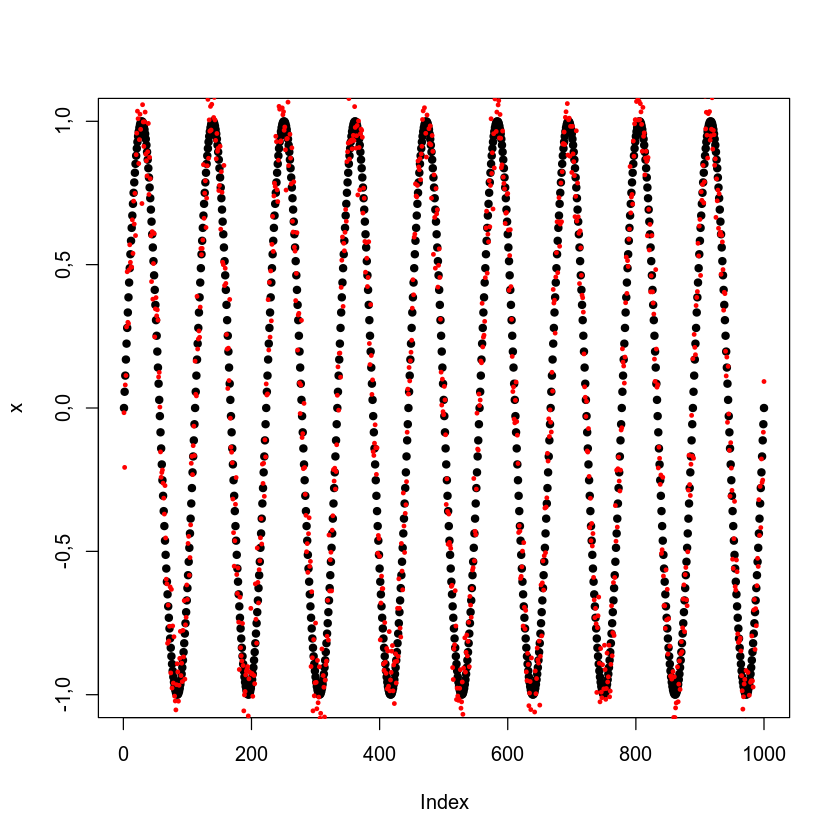

In [78]:
x = sin(2*pi*seq(0,9,len=1000))
y = x + rnorm(mean=0, sd=.1, n=1000)
plot(x, cex=1.2, pch=20)
points(y, col=2, cex=.6, pch=20)

Similaridade média entre pontos

In [82]:
((x-mean(x))%*%(y-mean(y)) / (sd(x)*sd(y))) / 1000

[,1]     
[1,] 0,9890349

In [83]:
cor(x,y)

[1] 0,9900249

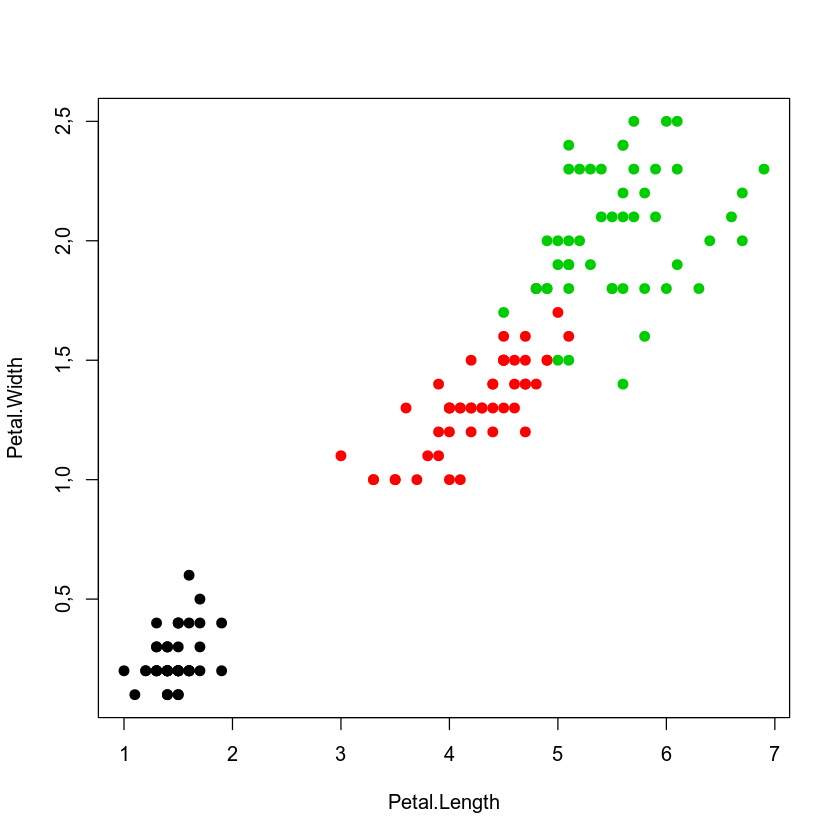

In [88]:
plot(iris[,3:4], col=iris[,5], cex=1.6, pch=20)

## Aula 02

## Análise de PCA

In [92]:
install.packages("splus2R")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


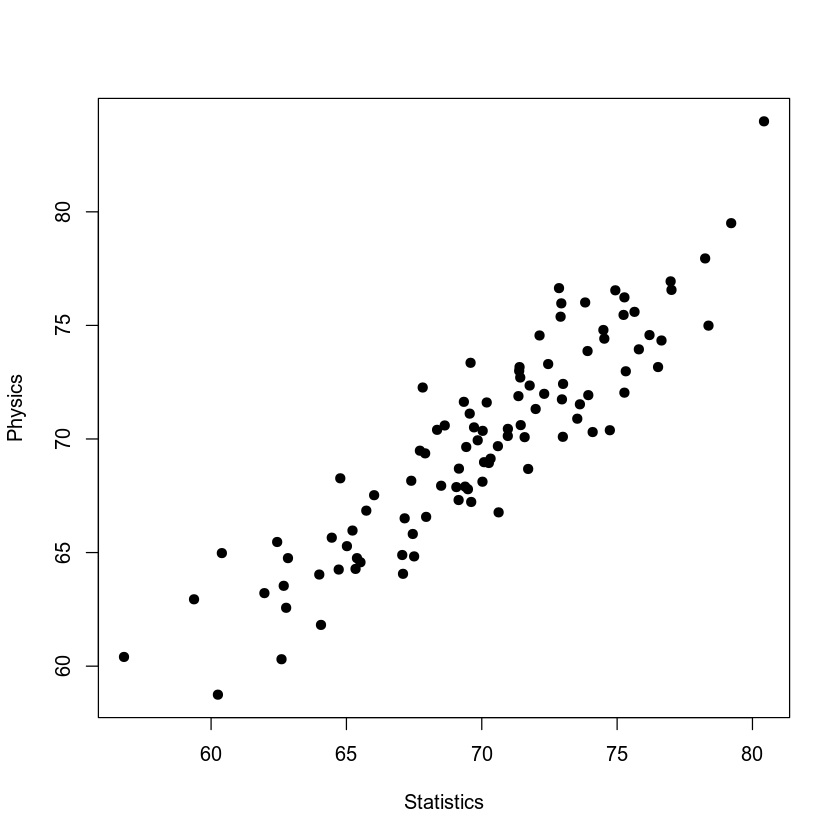

In [95]:
require(splus2R)
data = as.data.frame(rmvnorm(100, rho=.9) * 5+70)
colnames(data) = c("Statistics", "Physics")
plot(data, pch=20, cex=1.5)

In [106]:
scaled.cov = cov(scaled)
print(scaled.cov)

           Statistics  Physics
Statistics   22,06257 19,42776
Physics      19,42776 20,89767


In [107]:
eigenspace = eigen(scaled.cov)
print(eigenspace)

eigen() decomposition
$values
[1] 40,91661  2,04363

$vectors
           [,1]       [,2]
[1,] -0,7176235  0,6964313
[2,] -0,6964313 -0,7176235



In [108]:
rownames(eigenspace$vectors) = c("Statistics", "Physics")
colnames(eigenspace$vectors) = c("PC1", "PC2")
print(eigenspace)

eigen() decomposition
$values
[1] 40,91661  2,04363

$vectors
                  PC1        PC2
Statistics -0,7176235  0,6964313
Physics    -0,6964313 -0,7176235



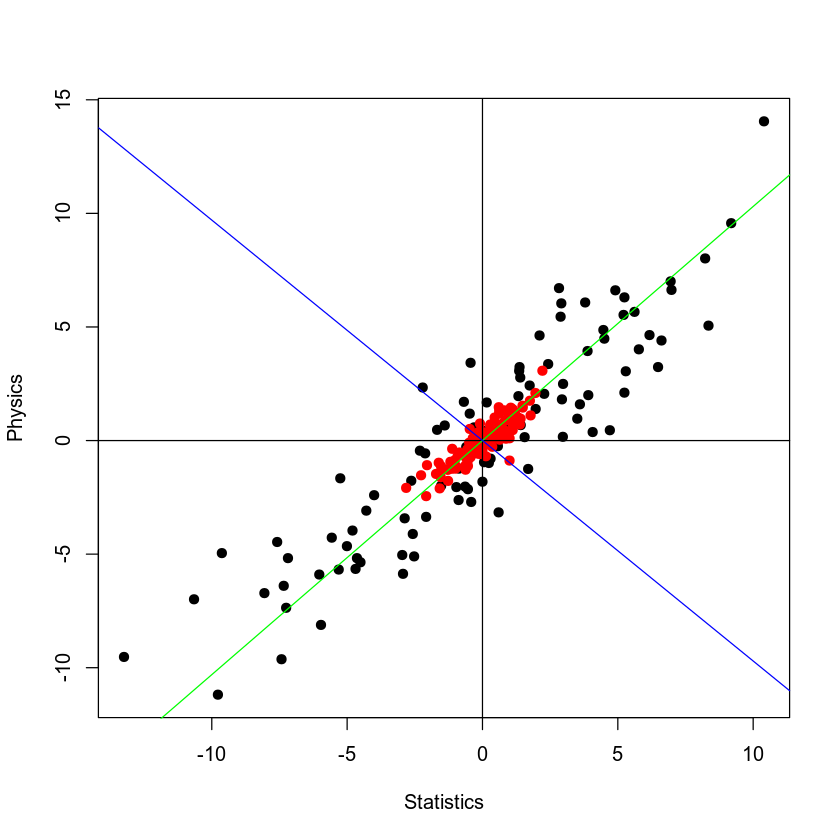

In [110]:
scaled = apply(data, 2, function(x) {x - mean(x)})
plot(scaled, pch=20, cex=1.5)
points(scaled[21], col=2, pch=20, cex=1.5)

x2 = apply(data, 2, function(col) {(col - mean(col)) / sd(col)})
points(x2, col=2, pch=20, cex=1.5)
abline(v=0,h=0)

pc1.slope = eigenspace$vectors[1,1]/eigenspace$vectors[2,1]
pc2.slope = eigenspace$vectors[1,2]/eigenspace$vectors[2,2]

abline(0, pc1.slope, col='green')
abline(0, pc2.slope, col='blue')

In [111]:
sum(eigenspace$values)

[1] 42,96024

In [112]:
sum(var(scaled[,1]), var(scaled[,2]))

[1] 42,96024

In [113]:
eigenspace$values/sum(eigenspace$values)

[1] 0,95242973 0,04757027

### Score plot

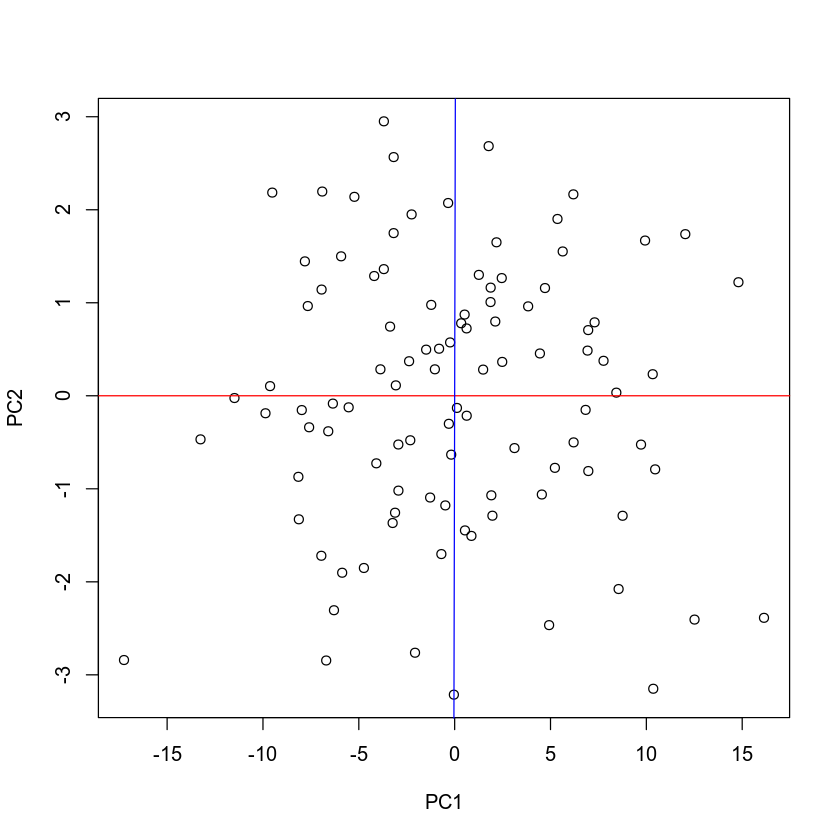

In [116]:
scores = scaled %*% eigenspace$vectors
plot(scores)
abline(0,0, col='red')
abline(0,90, col='blue')

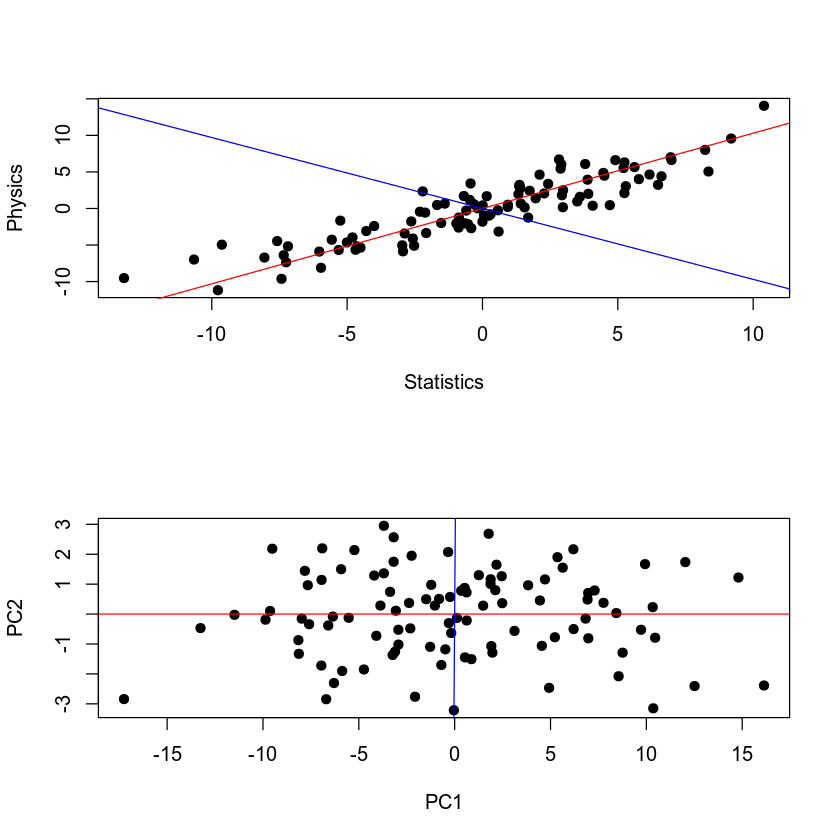

In [119]:
par(mfrow = c(2,1))
plot(scaled, pch=20, cex=1.5)
abline(0, pc1.slope, col='red')
abline(0, pc2.slope, col='blue')

plot(scores, pch=20, cex=1.5)
abline(0,0, col='red')
abline(0,90, col='blue')

## Biplot

Com essa forma de gráfico, podemos entender melhor a relação existente entre as variáveis originais

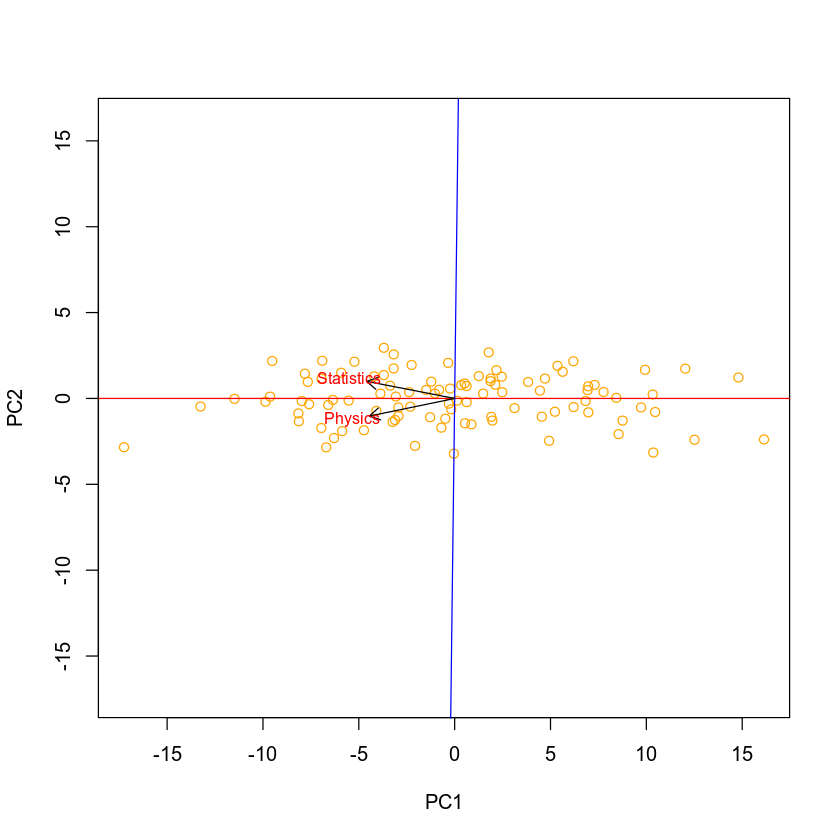

In [129]:
plot(scores, xlim=range(scores), ylim=range(scores), col='orange')
abline(0,0, col='red')
abline(0,90, col='blue')

sd = sqrt(eigenspace$values)
factor = 1
arrows(0,0, eigenspace$vectors[,1] * sd[1]/factor, eigenspace$vectors[,2]*sd[2]/factor, length=.1, col=1)

text(eigenspace$vectors[,1]*sd[1]/factor*1.2, 
     eigenspace$vectors[,2]*sd[2]/factor*1.2, c("Statistics", "Physics"), cex=.8, col=2)

Como o ângulo entre os vetores é agudo, existe forte correlação entre as variáveis, e pontos entre esses vetores apresentam um equilíbrio entre cada variável.

De outra forma, pontos acima da linha vermelha, cujo ângulo com o vetor "Statistics" é menor do que com o vetor "Physics", são pontos que apresentam maiores notas em estatística.

## Análise: Base de dados Wine

In [1]:
wine_data = read.table("Estudos/WineData/wine.data", sep=',')

In [2]:
wine_data[0:3,]

V1 V2    V3   V4   V5   V6  V7   V8   V9   V10  V11  V12  V13  V14 
1 1  14.23 1.71 2.43 15.6 127 2.80 3.06 0.28 2.29 5.64 1.04 3.92 1065
2 1  13.20 1.78 2.14 11.2 100 2.65 2.76 0.26 1.28 4.38 1.05 3.40 1050
3 1  13.16 2.36 2.67 18.6 101 2.80 3.24 0.30 2.81 5.68 1.03 3.17 1185

In [3]:
Y = wine_data[,1]
X = wine_data[,2:14]

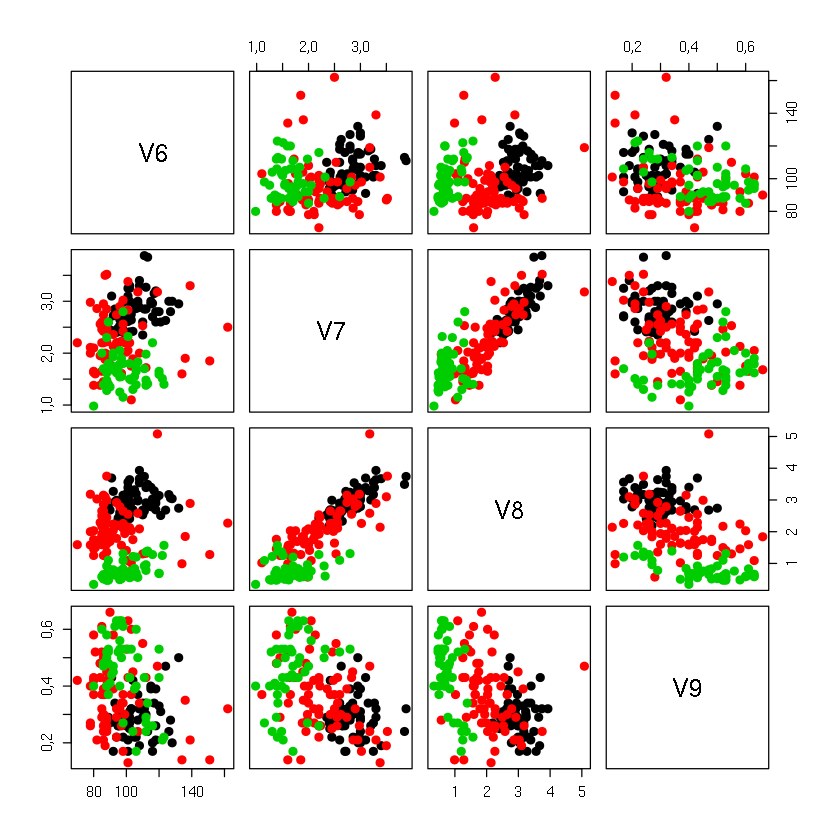

In [4]:
plot(X[,5:8], col=Y, pch=20, cex=2)

Variação de escala entre os parâmetros observados (colunas)

In [5]:
apply(X, 2, function(col) {range(col)})

V2    V3   V4   V5   V6  V7   V8   V9   V10  V11   V12  V13  V14 
[1,] 11,03 0,74 1,36 10,6  70 0,98 0,34 0,13 0,41  1,28 0,48 1,27  278
[2,] 14,83 5,80 3,23 30,0 162 3,88 5,08 0,66 3,58 13,00 1,71 4,00 1680

Aplicando correção de centralização e reescala

In [6]:
scaled = apply(X, 2, function(col) {(col - mean(col)) / sd(col)})

In [7]:
apply(scaled, 2, function(col) {range(col)})

V2        V3        V4        V5        V6        V7        V8       
[1,] -2,427388 -1,428952 -3,668813 -2,663505 -2,082381 -2,101318 -1,691200
[2,]  2,253415  3,100446  3,147447  3,145637  4,359076  2,532372  3,054216
     V9        V10       V11       V12       V13       V14      
[1,] -1,862979 -2,063214 -1,629691 -2,088840 -1,889723 -1,488987
[2,]  2,395645  3,475269  3,425768  3,292407  1,955399  2,963114

In [11]:
scaled[2:5,]

V2        V3          V4         V5         V6         V7        V8       
[1,] 0,2455968 -0,49800856 -0,8256672 -2,4838405 0,01809398 0,5670481 0,7315653
[2,] 0,1963252  0,02117152  1,1062139 -0,2679823 0,08810981 0,8067217 1,2121137
[3,] 1,6867914 -0,34583508  0,4865539 -0,8069748 0,92829983 2,4844372 1,4623994
[4,] 0,2948684  0,22705328  1,8352256  0,4506745 1,27837900 0,8067217 0,6614853
     V9         V10        V11        V12        V13       V14        
[1,] -0,8184106 -0,5431887 -0,2924962  0,4049085 1,1103172  0,96252635
[2,] -0,4970050  2,1299594  0,2682629  0,3174085 0,7863692  1,39122370
[3,] -0,9791134  1,0292513  1,1827317 -0,4263410 1,1807407  2,32800680
[4,]  0,2261576  0,4002753 -0,3183774  0,3611585 0,4483365 -0,03776747

In [156]:
scaled.cov = cov(scaled)

In [157]:
eigenspace = eigen(scaled.cov)

In [158]:
eigenspace

eigen() decomposition
$values
 [1] 4,7058503 2,4969737 1,4460720 0,9189739 0,8532282 0,6416570 0,5510283
 [8] 0,3484974 0,2888799 0,2509025 0,2257886 0,1687702 0,1033779

$vectors
              [,1]         [,2]        [,3]        [,4]        [,5]        [,6]
 [1,] -0,144329395 -0,483651548 -0,20738262 -0,01785630  0,26566365  0,21353865
 [2,]  0,245187580 -0,224930935  0,08901289  0,53689028 -0,03521363  0,53681385
 [3,]  0,002051061 -0,316068814  0,62622390 -0,21417556  0,14302547  0,15447466
 [4,]  0,239320405  0,010590502  0,61208035  0,06085941 -0,06610294 -0,10082451
 [5,] -0,141992042 -0,299634003  0,13075693 -0,35179658 -0,72704851  0,03814394
 [6,] -0,394660845 -0,065039512  0,14617896  0,19806835  0,14931841 -0,08412230
 [7,] -0,422934297  0,003359812  0,15068190  0,15229479  0,10902584 -0,01892002
 [8,]  0,298533103 -0,028779488  0,17036816 -0,20330102  0,50070298 -0,25859401
 [9,] -0,313429488 -0,039301722  0,14945431  0,39905653 -0,13685982 -0,53379539
[10,]  0,088616705 -

Onde cada coluna representa uma componente principal, e cada linha, o vetor resultante de cada atributo

In [160]:
eigenspace$values / sum(eigenspace$values)

[1] 0,361988481 0,192074903 0,111236305 0,070690302 0,065632937 0,049358233
 [7] 0,042386793 0,026807489 0,022221534 0,019300191 0,017368357 0,012982326
[13] 0,007952149

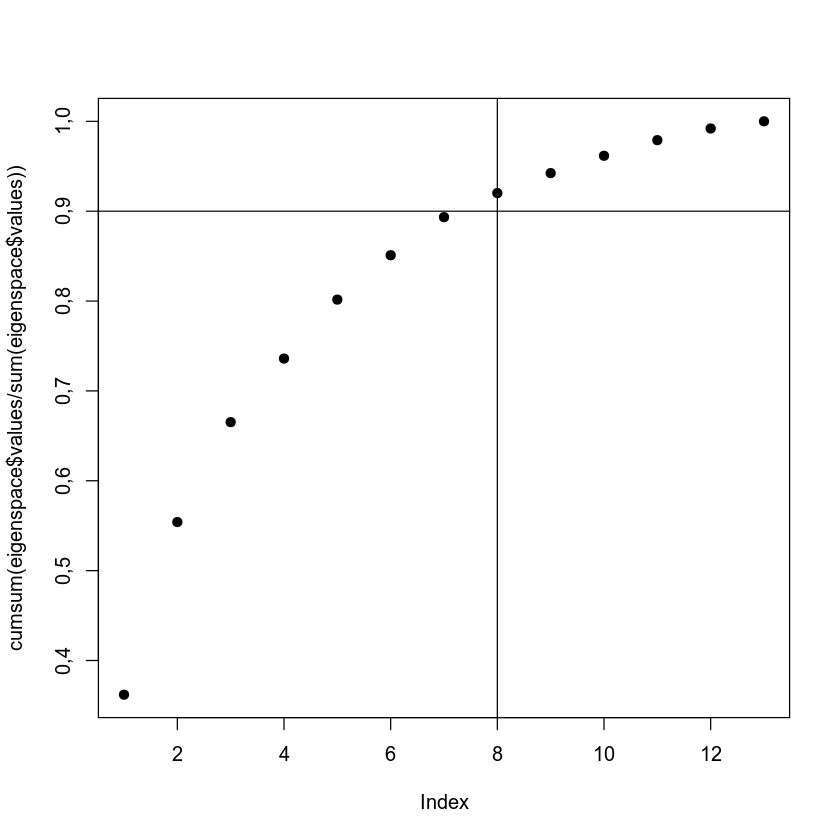

In [163]:
plot(cumsum(eigenspace$values / sum(eigenspace$values)), pch=20, cex=1.5)
abline(v=8, h=.9)

In [169]:
print(as.numeric(scaled[1,]))

 [1]  1,5143408 -0,5606682  0,2313998 -1,1663032  1,9085215  0,8067217
 [7]  1,0319081 -0,6577078  1,2214385  0,2510088  0,3611585  1,8427215
[13]  1,0101594


Exemplo: aplicando o produto escalar sobre os autovetores e a primeira coluna do conjunto de dados escalados

In [171]:
print((eigenspace$vectors)%*%(as.numeric(scaled[1,])))

             [,1]
 [1,]  1,60096835
 [2,] -0,55948981
 [3,]  0,62455674
 [4,]  0,86081060
 [5,] -0,87665157
 [6,]  0,22483172
 [7,]  0,52357283
 [8,]  1,40299275
 [9,] -2,45099349
[10,] -0,73030477
[11,] -0,80922565
[12,] -1,28297533
[13,] -0,05555267


Aplicando o produto escalar sobre todo o conjunto de dados

In [173]:
scores = scaled %*% eigenspace$vectors
scores = as.data.frame(scaled %*% eigenspace$vectors)

In [175]:
colnames(scores) = paste("PC", 1:13, sep='')
print(colnames(scores))

 [1] "PC1"  "PC2"  "PC3"  "PC4"  "PC5"  "PC6"  "PC7"  "PC8"  "PC9"  "PC10"
[11] "PC11" "PC12" "PC13"


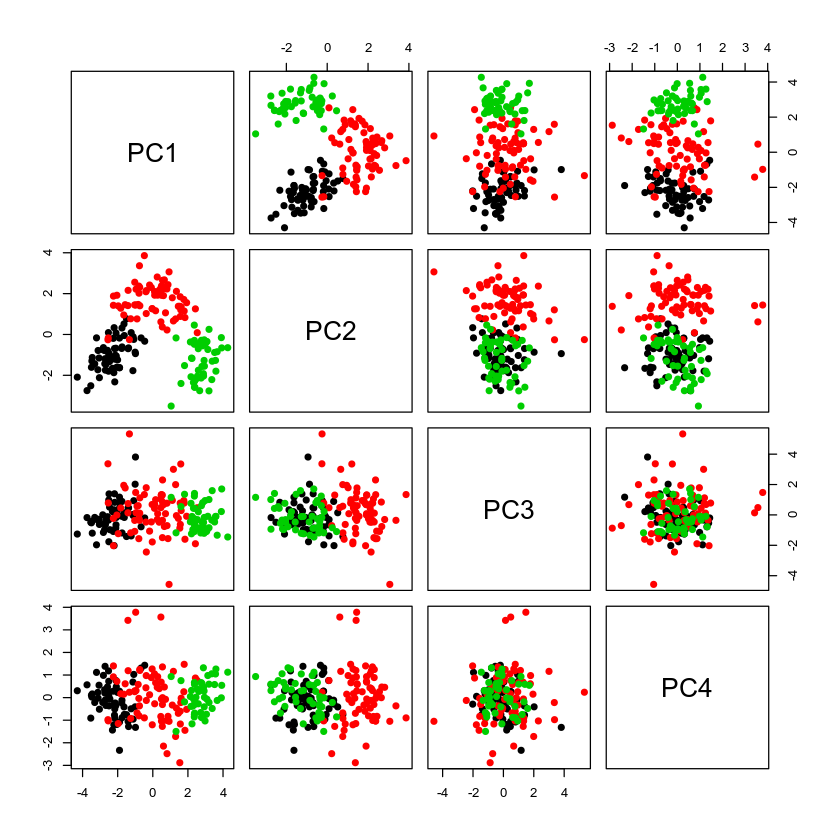

In [177]:
plot(scores[,1:4], col=Y, pch=20, cex=1.5)

## Análise KNN: K-Nearest Neighbours

Considerando a média do atribudo dos $k$ vizinhos mais próximos

$$
\hat{f}(x_q) = \frac{1}{k}\sum_{i=1}^{k} f(x_i)
$$

In [35]:
knn <- function(query, k, X, Y) {
    #Distancia euclidiana que a consulta (query) tem em relação aos exemplos (linhas) da matriz X
    E = apply(X, 1, function(row) { sqrt(sum((row-query))^2) })
    
    #Posição relativa dos k vizinhos mais próximos
    ids = sort.list(E, dec=F)[1:k]
    
    # Classes únicas
    classes = unique(Y)
    
    i = 1
    count = rep(0, length(classes))
    for (class in classes) {
        count[i] = sum(class == Y[ids])
        i = i + 1
    }
    
    ret = list()
    ret$classes = classes
    ret$count = count
    ret$max.prob.class = classes[which.max(count)]
    
    return (ret)
}

In [36]:
wine_data = read.table("Estudos/WineData/wine.data", sep=',')
Y = wine_data[,1]
X = wine_data[,2:14]

In [37]:
res = knn(query=X[1,], k=5, X=X, Y=Y)
print(res)

$classes
[1] 1 2 3

$count
[1] 5 0 0

$max.prob.class
[1] 1



In [38]:
res = knn(query=X[1,], k=50, X=X, Y=Y)
print(res)

$classes
[1] 1 2 3

$count
[1] 43  4  3

$max.prob.class
[1] 1



Conjunto de treinamento

In [215]:
ids = sample(1:nrow(X), size=ceiling(0.5*nrow(X)))
X.train = X[ids,]
Y.train = Y[ids]

In [216]:
print(X.train[,3])
print("Classes:")
print(Y.train[0:3])

 [1] 2,10 2,72 2,10 2,43 2,62 2,20 2,20 1,75 1,98 2,25 2,24 2,52 2,29 2,28 2,26
[16] 2,38 2,56 2,62 2,50 2,12 1,70 2,30 2,23 2,38 2,41 2,30 1,92 2,38 2,80 2,86
[31] 2,42 2,64 2,54 2,64 2,60 2,12 2,62 2,04 2,48 2,58 2,30 2,50 2,40 2,40 3,23
[46] 2,51 2,17 2,23 1,71 2,72 3,22 2,42 2,39 2,68 2,54 2,30 2,19 2,48 2,20 2,31
[61] 2,32 2,21 2,14 2,17 2,70 2,12 2,70 2,69 2,59 2,61 2,84 2,32 1,90 2,32 2,41
[76] 2,28 2,92 2,27 2,40 2,38 2,15 2,45 2,61 2,30 2,51 2,42 2,36 2,36 2,21
[1] "Classes:"
[1] 3 1 2


Conjunto de teste

In [252]:
X.test = X[-ids,]
Y.test = Y[-ids]

In [262]:
# X[-ids] <--  entende que -ids representa o número das colunas (e pega todas as linhas)

In [263]:
# X[-ids,] <-- entende que -ids representa o número das linhas (e pega todas as colunas)

In [254]:
accuracy = 0
for (i in 1:nrow(X.test)) {
    res = knn(query=X.test[i,], k=3, X=X.train, Y=Y.train)
    res_class = res$max.prob.class
    y_class = Y.test[i]
    if (res_class == y_class) {
        accuracy = accuracy + 1
    }
}
accuracy = accuracy / nrow(X.test)
cat("Accuracy = ", accuracy, "\n")

Accuracy =  0,7303371 


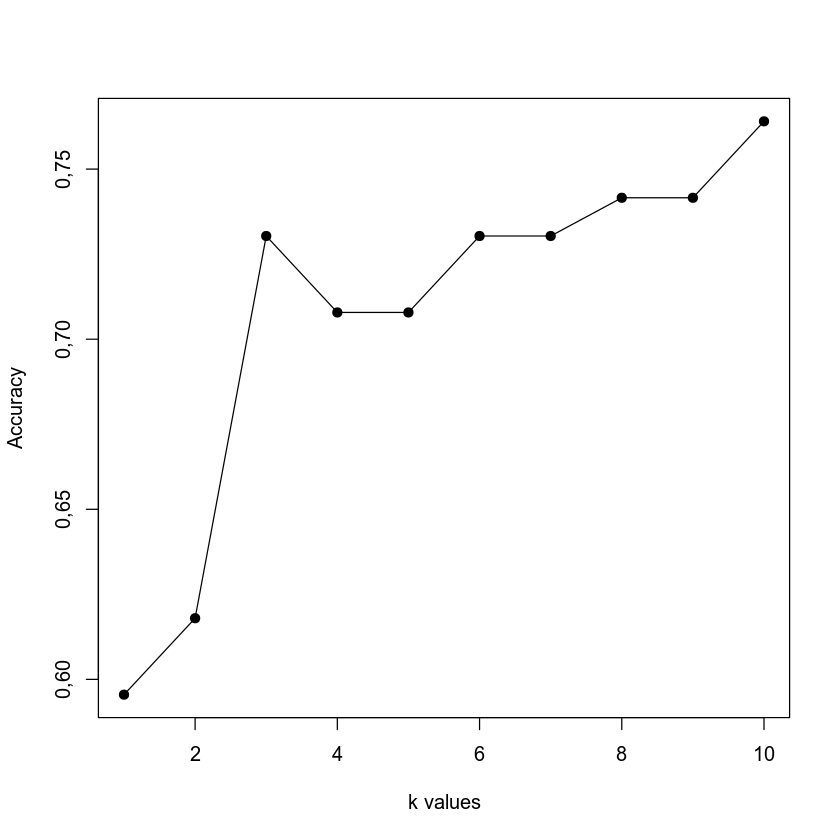

In [257]:
R = NULL
for (k in 1:10) {
    accuracy = 0
    for (i in 1:nrow(X.test)) {
        res = knn(query=X.test[i,], k=k, X=X.train, Y=Y.train)
        res_class = res$max.prob.class
        y_class = Y.test[i]
        if (res_class == y_class) {
            accuracy = accuracy + 1
        }
    }
    
    accuracy = accuracy / nrow(X.test)
    R = rbind(R, c(k, accuracy))
}
plot(R, xlab='k values', ylab='Accuracy', pch=20, cex=1.5)
lines(R, pch=20, cex=1.5)


## Aula 03

# Aprendizado Baseado em Instâncias

Combinando os resultados anteriores em uma única função

In [39]:
test.wine <- function(PCA = FALSE, perc = 0.9) {
    
    # PCA == FALSE --> Sem transformação por auto-valores/auto-vetores
    # PCA == TRUE --> Com transformação por PCA em um subconjunto de PCs
    wine_data = read.table("Estudos/WineData/wine.data", sep=',')
    Y = wine_data[,1]
    X = wine_data[,2:14]
    
    if (PCA) {
        # Transformação espacial
        
        # Centralização e reescala
        scaled = apply(X, 2, function(col) {(col - mean(col)) / sd(col)})
        
        # Avaliação das dependências lineares entre os atributos
        C = cov(scaled)
        E = eigen(C)
        
        # Plot da soma acumulada de autovalores
        plot(cumsum(E$values/sum(E$values)), main="Importância agregada por PC", xlab='# PCs', 
             ylab='Importância em %',, pch=20, cex=1.5)
        
        # Returnar o número de autovalores tais que a soma acumulada seja maior do que um dado percentual
        numero.PCs = which(cumsum(E$values/sum(E$values)) >= perc)[1]
        print(numero.PCs)
        
        # Realizar transformação do espaço (projeção dos dados sobre os autovetores)
        Transform = scaled %*% E$vectors
        X = Transform[,1:numero.PCs]
    }
    
    R = matrix(0, nrow=10, ncol=5)
    for (j in 1:5){
        
        #Hold-out
        # - uma parcela dos dados é escolhida aleatoriamente (uniforme) para 
        #   para compor o conjunto de treinamento e o restante disjunto dos exemplos irá 
        #   compor o conjunto de treinamento
        
        ids = sample(1:nrow(X), size=ceiling(0.75*nrow(X)))
        X.train = X[ids,]
        Y.train = Y[ids]

        X.test = X[-ids,]
        Y.test = Y[-ids]

        for (k in 1:10) {
            accuracy = 0
            for (i in 1:nrow(X.test)) {
                res = knn(query=X.test[i,], k=k, X=X.train, Y=Y.train)
                res_class = res$max.prob.class
                y_class = Y.test[i]
                if (res_class == y_class) {
                    accuracy = accuracy + 1
                }
            }

            accuracy = accuracy / nrow(X.test)
            R[k,j] = accuracy
        }
    }
    
    return (R)
} 

[1] 10


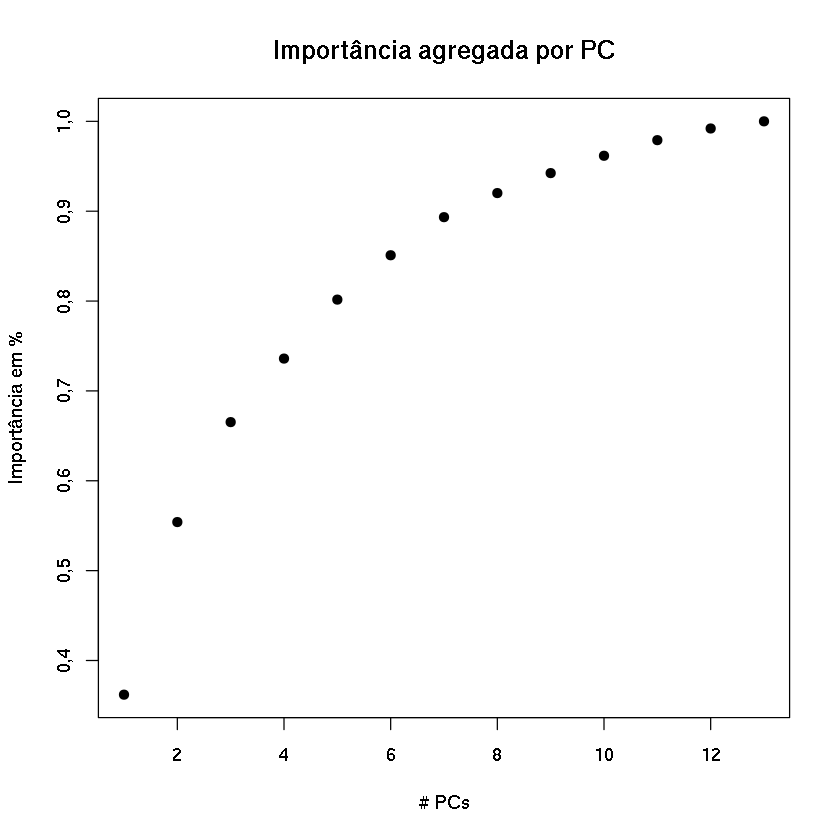

In [40]:
com.PCA = test.wine(PCA=TRUE, perc=.95)

Analisando a média dos valores de acurácia obtidos com Hold-out

In [41]:
apply(com.PCA, 1, function(row) {mean(row)})

[1] 0,5590909 0,5863636 0,5363636 0,5636364 0,6045455 0,5909091 0,6045455
 [8] 0,5909091 0,6181818 0,6136364

## Análise DWNN: Distance-Weighted Nearest Neighbors

KNN -> Sistema de contagem (classes discretas) para problemas de categorização

DWNN -> Regressão do espaço (classes contínuas) para problemas de regressão

No caso discreto, tomamos o argumento máximo (análogo a uma heaviside)

$$
\hat{f}(X_q) = argmax_{v \in V} \sum_{i=1}^{k}w_i \delta(v, f(x_i) 
$$

$$
w_i \equiv \frac{1}{d(x_q, x_i)^2}
$$

com $d(a,b_i)$ distância euclidiana entre o ponto de consulta $a$ e os pontos vizinhos $b_i$

No caso contínuo

$$
\hat{f}(x_q) \leftarrow \frac{\sum_{i=1}^{k} w_i f(x_i)}{\sum_{i=1}^k w_i}
$$


$$
w_i \equiv \frac{1}{d(x_q, x_i)^2}
$$

A classe do ponto de consulta é dada pela média ponderada das saídas produzidas pelos vizinhos mais próximos, mapeados por gaussianas centradas no ponto de consulta $x_q$

Neste caso, consideramos um \textit{kernel} radiam tal que os pesos $w_i$ são dados por

$$
w_i = e^{-\frac{E(x_q, x_i)^2}{2 \sigma ^2}}
$$

In [2]:
ps = c(1,10)
sigma = 1
exp(-ps^2 / (2*sigma))

[1] 6.065307e-01 1.928750e-22

Como o centro da gaussiana (média) está em zero, a distância até o primeiro ponto de consulta (=1) apresenta importância de 0.6, entquanto um ponto com distância 10, é zero (erro numérico). Caso sigma aumente, a variância da gaussiana no ponto de consulta aumenta e as distâncias são consideradas como mais importantes (a abertura da gaussiana é maior)

In [3]:
sigma = 10
exp(-ps^2 / (2*sigma))

[1] 0.951229425 0.006737947

Considerando os pesos para os pontos 1 e 10 como: w(1) = 0.5, w(10) = 127,87

In [4]:
sigma = 1
w = exp(-ps^2 / (2*sigma))
y = c(0.5, 127.87)
w*y

[1] 3.032653e-01 2.466292e-20

Temos a importância ponderada por cada ponto de acordo com sua distância do ponto de consulta no centro da gaussiana   

In [5]:
sum(w*y) / sum(w)

[1] 0.5

E a soma retorna uma regressão numérica, baseada no peso de cada pontoe em sua distância relativa

In [6]:
dwnn <- function(query, X, Y, sigma) {
    
    E = apply(X, 1, function(row) { sqrt(sum((row - query)^2)) })
    
    # Construção de gaussiana centrada na query
    weight = exp(-E^2 / (2*sigma^2))
    
    # Multiplicando ponto a ponto os pesos pela saída de cada elemento
    return (weight %*% Y / sum(weight))
}

In [32]:
test.linear <- function(sigma) {
    pdf("dwnn_linear_eg.pdf", onefile = FALSE) 
    dataset = cbind(-5:5, -5:5)
    print(dataset)
    plot(dataset, pch=20, cex=2, cex.lab=2, cex.axis=2)
    
    X = matrix(dataset[,1], ncol=1)
    Y = matrix(dataset[,2], ncol=1)
    
    R = NULL
    for (x in seq(-5,5,len=100)) {
        y = dwnn(query=x, X=X, Y=Y, sigma=sigma)
        R = rbind(R, c(x,y))
    
    }
    
    points(R, col=2, pch=20)
    dev.off()
}

Caso $\sigma$ -> 0, apenas pontos pertencentes ao conjunto de dados pode ser analisado, já que o raio da gaussiana é pequeno o suficiente para que não exista vizinhos próximos

Caso $\sigma$ -> $\infty$, a resposta da regressão retorna a média de todos os pontos, já que a gaussiana ocupa todo o espaço e todos os pontos são considerados vizinhos

      [,1] [,2]
 [1,]   -5   -5
 [2,]   -4   -4
 [3,]   -3   -3
 [4,]   -2   -2
 [5,]   -1   -1
 [6,]    0    0
 [7,]    1    1
 [8,]    2    2
 [9,]    3    3
[10,]    4    4
[11,]    5    5


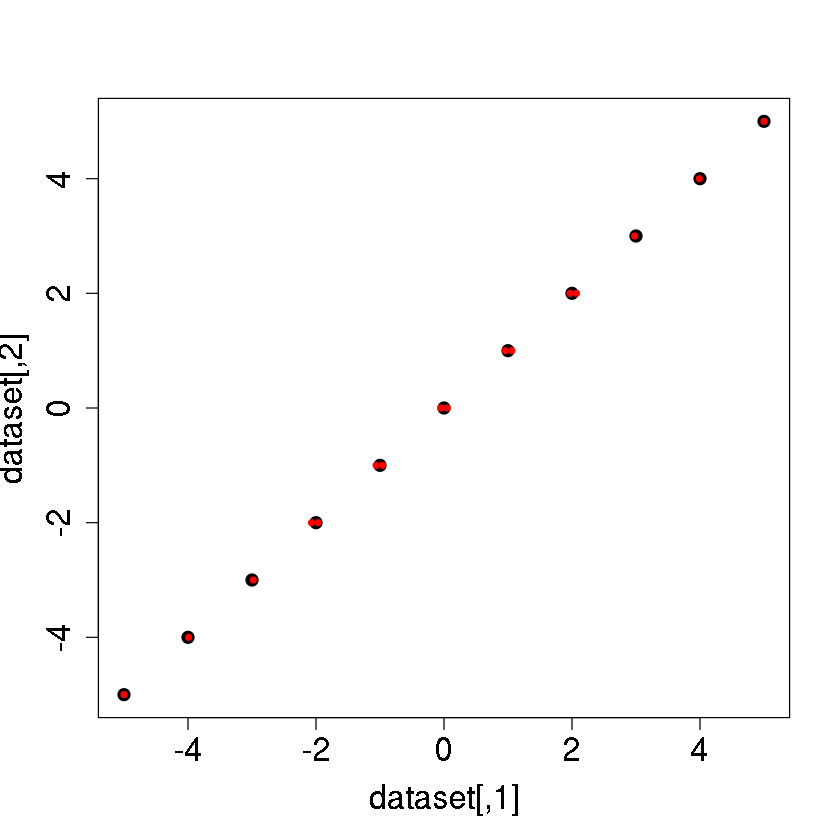

In [8]:
test.linear(0.002)

In [33]:
test.linear(0.2)

      [,1] [,2]
 [1,]   -5   -5
 [2,]   -4   -4
 [3,]   -3   -3
 [4,]   -2   -2
 [5,]   -1   -1
 [6,]    0    0
 [7,]    1    1
 [8,]    2    2
 [9,]    3    3
[10,]    4    4
[11,]    5    5


png 
  2

      [,1] [,2]
 [1,]   -5   -5
 [2,]   -4   -4
 [3,]   -3   -3
 [4,]   -2   -2
 [5,]   -1   -1
 [6,]    0    0
 [7,]    1    1
 [8,]    2    2
 [9,]    3    3
[10,]    4    4
[11,]    5    5


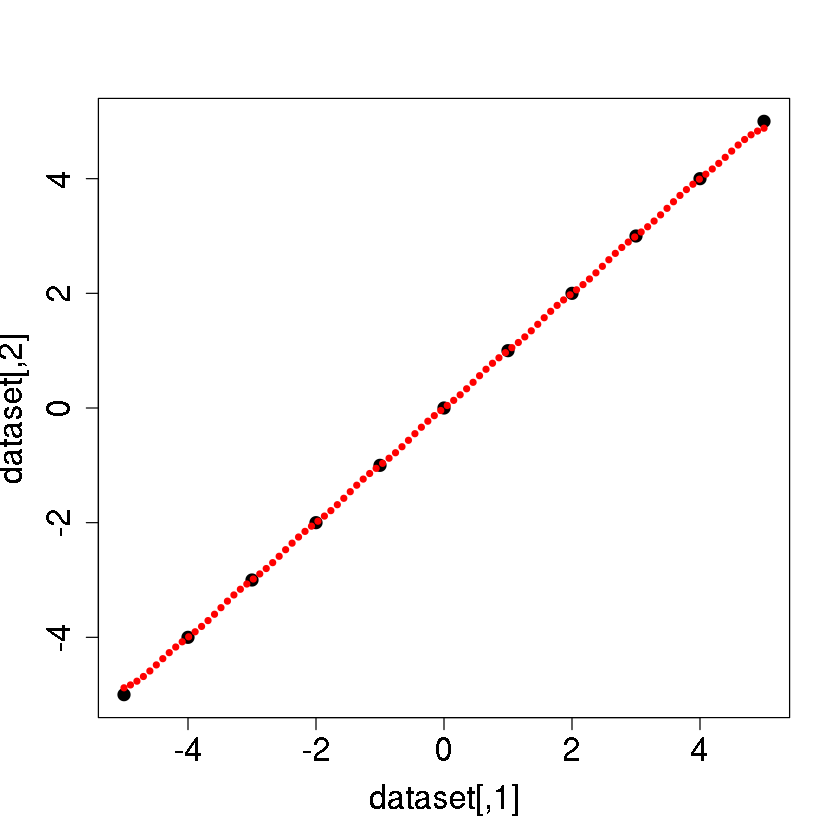

In [69]:
test.linear(0.5)

      [,1] [,2]
 [1,]   -5   -5
 [2,]   -4   -4
 [3,]   -3   -3
 [4,]   -2   -2
 [5,]   -1   -1
 [6,]    0    0
 [7,]    1    1
 [8,]    2    2
 [9,]    3    3
[10,]    4    4
[11,]    5    5


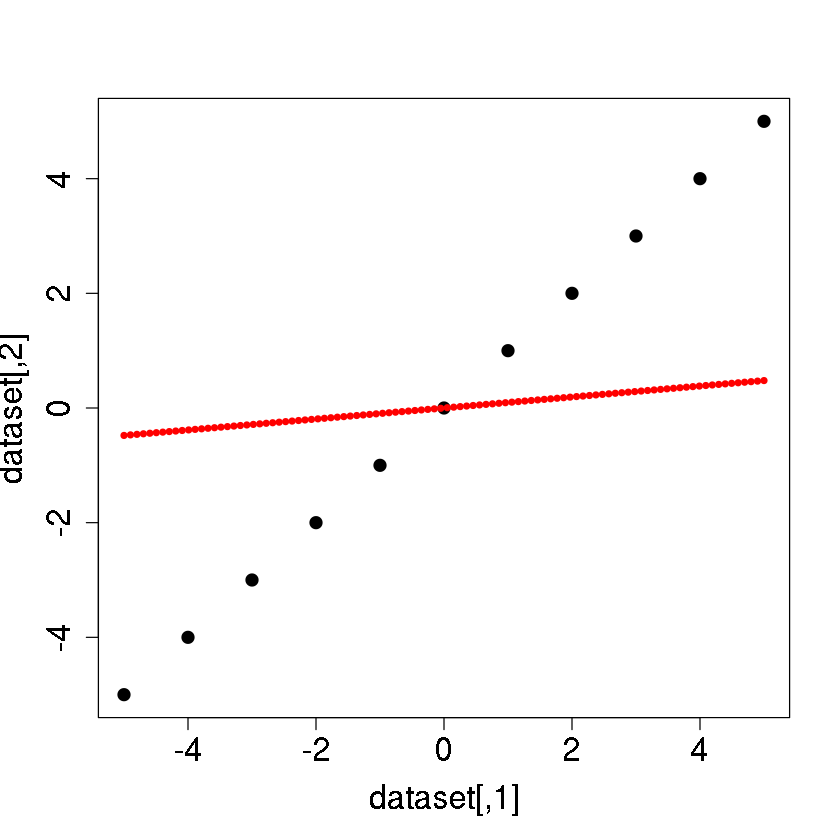

In [70]:
test.linear(10)

Quanto maior a abertura da gaussiana centrada em zero, todos os pontos do espaço serão considerados com o mesmo peso, mesmo que estejam a -5 e +5 (extremos) de distância do ponto de consulta

In [77]:
test.linear2 <- function(sigma) {
    dataset = cbind(-5:5, -5:5)
    print(dataset)
    plot(dataset, pch=20, cex=2, cex.lab=2, cex.axis=2, xlim=c(-7,7))
    
    X = matrix(dataset[,1], ncol=1)
    Y = matrix(dataset[,2], ncol=1)
    
    R = NULL
    for (x in seq(-7, 7,len=100)) {
        y = dwnn(query=x, X=X, Y=Y, sigma=sigma)
        R = rbind(R, c(x,y))
    
    }
    
    points(R, col=2, pch=20)
}

      [,1] [,2]
 [1,]   -5   -5
 [2,]   -4   -4
 [3,]   -3   -3
 [4,]   -2   -2
 [5,]   -1   -1
 [6,]    0    0
 [7,]    1    1
 [8,]    2    2
 [9,]    3    3
[10,]    4    4
[11,]    5    5


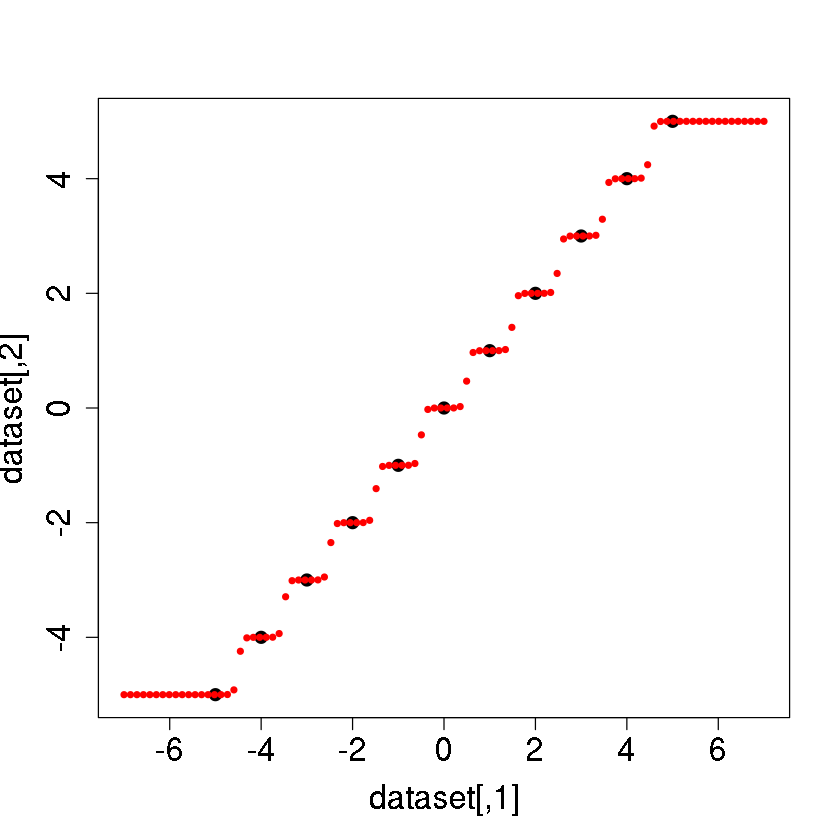

In [78]:
test.linear2(0.2)

Nesse caso, a distribuição de probabilidades conjunta P(x,y) no treinamento (pontos pretos) é distinta da distribuição do teste (pontos vermelhos) passando dos extremos

### Regressão para uma série temporal

In [99]:
test.sin <- function(sigma) {
    # Como serie temporal, é uma variável unidimensional
    time = seq(0,9, length=1000)
    series = sin(sin(2*pi*time))
    par(mfrow=c(2,1))
    plot(series, xlim=c(0,1200), pch=20, cex=1, cex.lab=2)
    
    # Temos que adicionar um espaço de entradas X e um espaço de saídas Y
    # Dado series[1], esperamos ter o resultado series[2]
    
    X = matrix(series[1:999], ncol=1)
    Y = as.numeric(series[2:1000])
    
    # Conjunto de treinamento
    ids = 1:800
    X.train = matrix(X[ids,], ncol=1)
    Y.train = Y[ids]
    
    # Conjunto de teste
    X.test = matrix(X[-ids,], ncol=1)
    Y.test = Y[-ids]
    
    # Teste
    R = NULL
    for (i in 1:nrow(X.test)) {
        x = X.test[i,]
        y = dwnn(query=x, X=X.train, Y=Y.train, sigma=sigma)
        R = rbind(R, c(x,y))
        
    }

    plot(series[-ids], pch=20, cex=1, cex.lab=2)
    points(R[,2], pch=20, cex=.6, col=2)
}

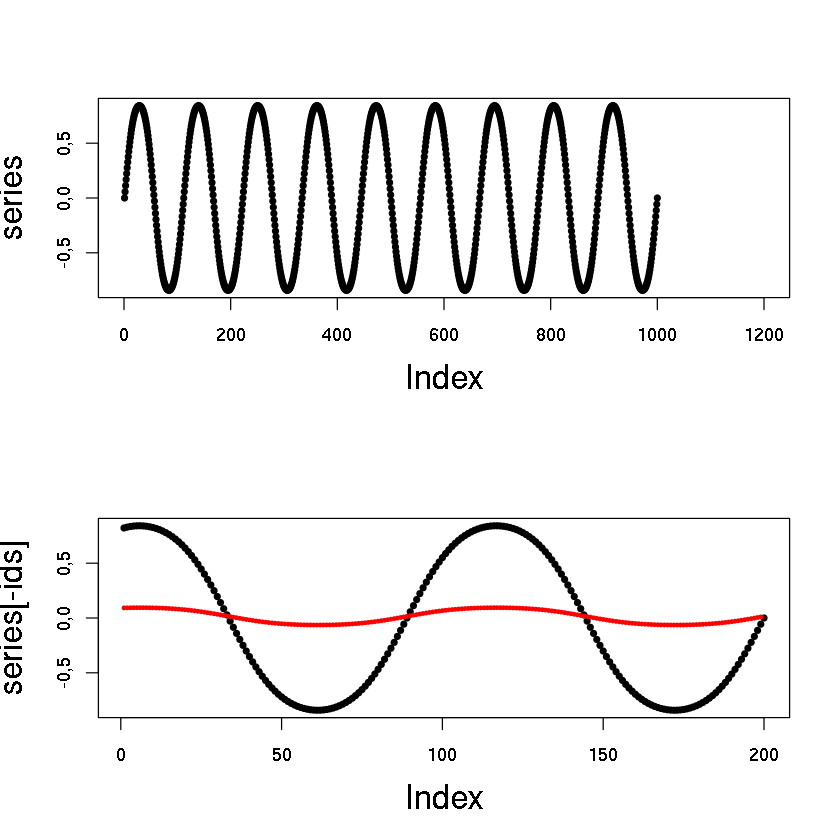

In [101]:
test.sin(2)

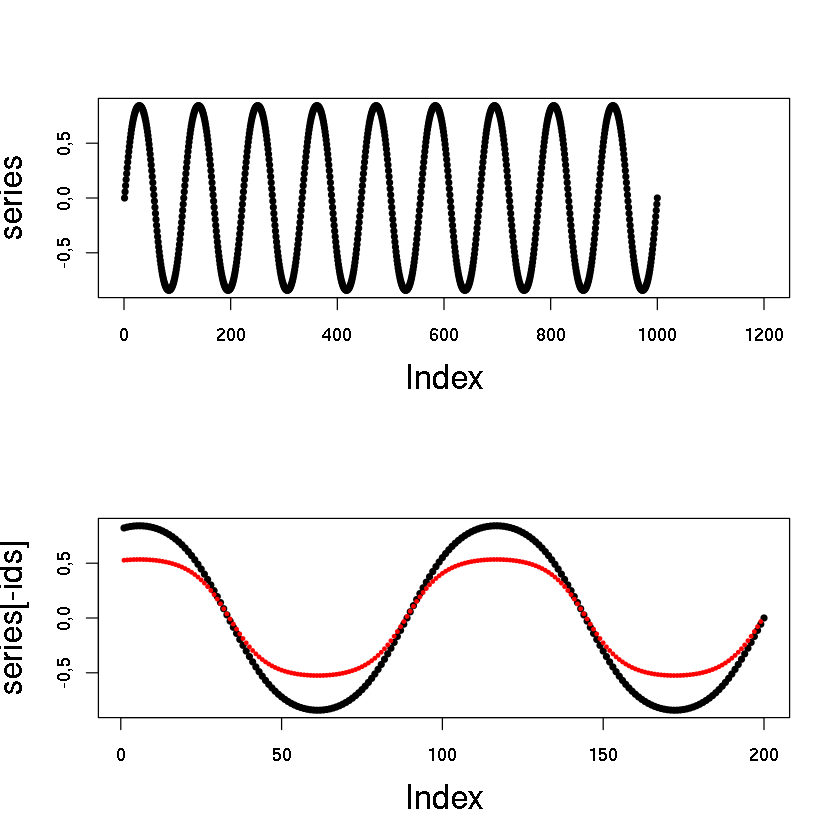

In [104]:
test.sin(.6)

In [115]:
test.sin2 <- function(sigma, lag.max=200) {
    # Como serie temporal, é uma variável unidimensional
    time = seq(0,9, length=1000)
    series = sin(sin(2*pi*time))
    plot(series, xlim=c(0,1200), pch=20, cex=1, cex.lab=2)
    
    # Temos que adicionar um espaço de entradas X e um espaço de saídas Y
    # Dado series[1], esperamos ter o resultado series[2]
    
    X = matrix(series[1:999], ncol=1)
    Y = as.numeric(series[2:1000])
    
    # Conjunto de treinamento
    X.train = X
    Y.train = Y
    
    
    # Predição recorrente ---> Redes neurais profundas
    #  - Uma saída vira entrada para prever umapróxima saída
    R = matrix(NA, nrow=nrow(X.train), ncol=2)
    x = series[1000]
    
    for (i in 1:lag.max) {
        y = dwnn(query=x, X=X.train, Y=Y.train, sigma=sigma)
        R = rbind(R, c(x,y))
        x = y
    }

    points(R[,2], pch=20, cex=.6, col=2)
}

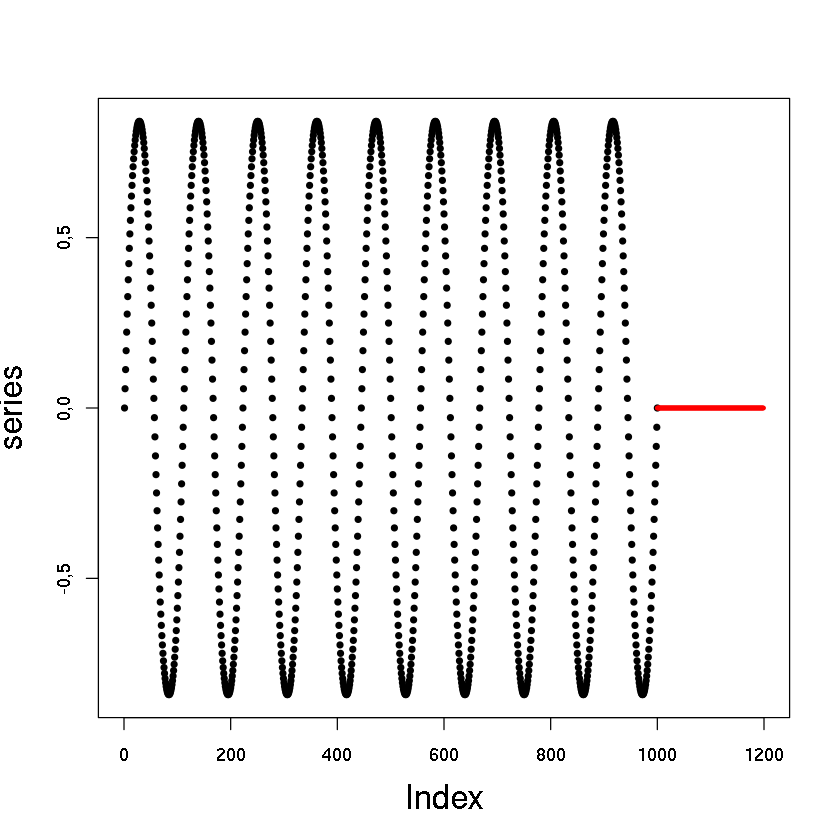

In [116]:
test.sin2(200)

Caso a abertura seja muito grande, como anteriormente, os dados preditos tendem à média de todos os pontos

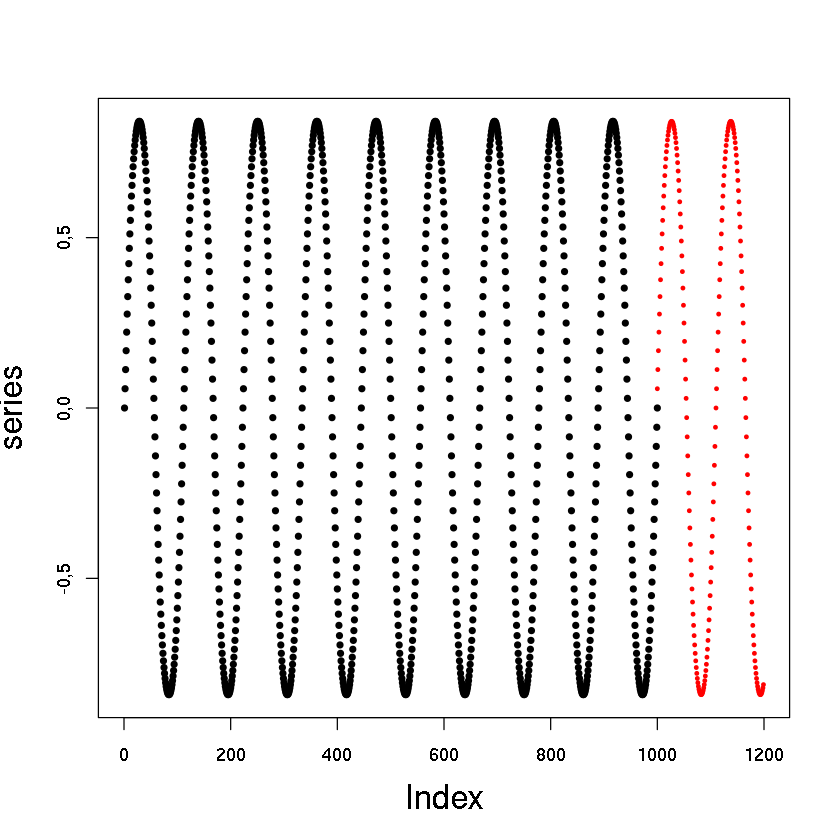

In [117]:
test.sin2(.0001)

Considerando redução da abertura da gaussiana, a predição não tende à média. 

A distribuição de probabilidades conjunta P(X,Y) para a função test.linear não  para a test.sin2

# Aula 04

Retomada dos algoritmos KNN e DWNN - Paradigmas do IBL (Instance-Based Learning)

In [29]:
knn <- function(query, k, X, Y) {
    E = apply(X, 1, function(row) { sqrt(sum((row - query)^2)) })
    
    ids = sort.list(E, dec=F)[1:k]
    classes = unique(Y)
    count = rep(0, length(classes))
    i = 1
    for (class in classes) {
        count[i] = sum(class == Y[ids])
        i = i + 1
    }
    
    ret = list()
    ret$classes = classes
    ret$count = count
    ret$max.prob.class = classes[which.max(count)]
    return (ret)
}

In [28]:
dwnn <- function(query, X, Y, sigma) {
    E = apply(X, 1, function(row) { sqrt(sum((row - query)^2)) })
    weight = exp(-E^2 / (2*sigma^2))
    return (weight %*% Y / sum(weight))
}

In [14]:
id = c(sample(1:50, size=25), sample(51:100, size=25), sample(101:150, size=25)) 
print(iris[125,])
query = iris[125,1:4]
knn(query=query, k=15, X=iris[id,1:4], Y=iris[id,5])

    Sepal.Length Sepal.Width Petal.Length Petal.Width   Species
125          6.7         3.3          5.7         2.1 virginica


$classes
[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

$count
[1]  0  1 14

$max.prob.class
[1] virginica
Levels: setosa versicolor virginica

Exemplo de uso: DWNN Sunspots

In [24]:
series = read.table("Estudos/SunspotsTimeSeries/monthly-sunspots.csv", sep=',')
series[0:5,]

V1      V2      
1 Month   Sunspots
2 1749-01 58.0    
3 1749-02 62.6    
4 1749-03 70.0    
5 1749-04 55.7

In [19]:
install.packages("tseriesChaos")

also installing the dependency ‘deSolve’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
require(tseriesChaos)
dataset = tseriesChaos::embedd(series, m=3, d=5)

Loading required package: tseriesChaos


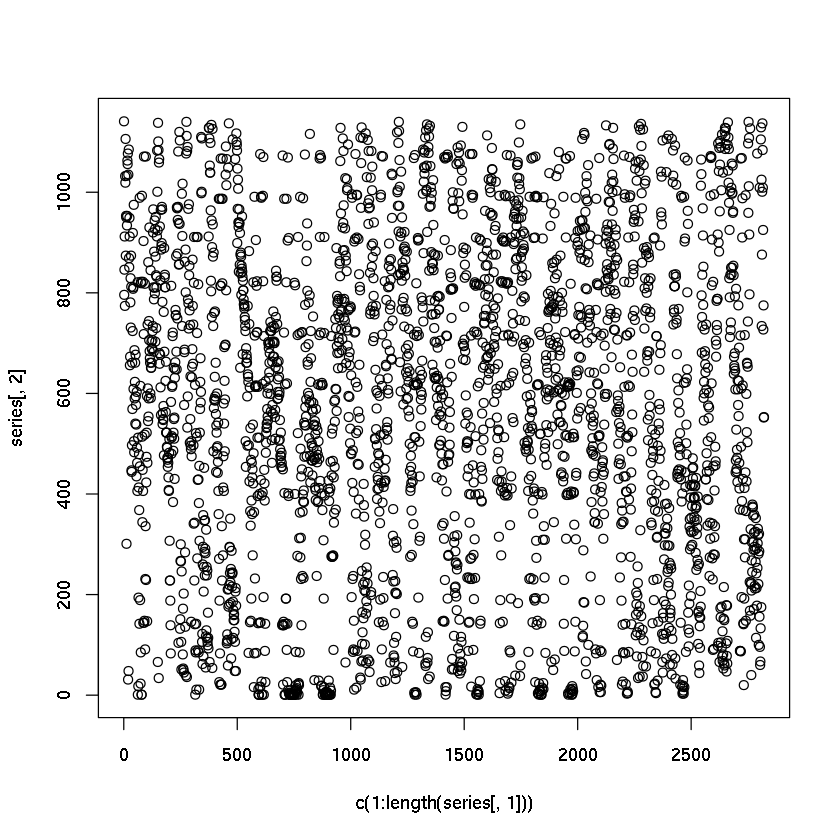

In [19]:
plot(c(1:length(series[,1])), series[,2])

Esse pacote permite a criação de um dataset que separa os dados em três colunas (d=3) relativas a um delay temporal de 5 unidades (m=5). Assim, podemos usar o dataset e a função dwnn para prever dados ao longo do tempo

In [32]:
dataset[1:10,]

V1/0 V2/0 V1/5 V2/5 V1/10 V2/10
 [1,] 2821 1141  5   1032 10     950 
 [2,]    1  796  6   1019 11     301 
 [3,]    2  846  7   1106 12    1033 
 [4,]    3  912  8    874 13     934 
 [5,]    4  774  9    953 14     953 
 [6,]    5 1032 10    950 15    1063 
 [7,]    6 1019 11    301 16    1056 
 [8,]    7 1106 12   1033 17    1077 
 [9,]    8  874 13    934 18      31 
[10,]    9  953 14    953 19    1035

In [33]:
dataset[2001,1:2]

V1/0 V2/0 
2000  901

In [34]:
dwnn(query=dataset[2001,1:2], X=dataset[1:2000, 1:2], Y=dataset[1:2000, 3], sigma=1)

[,1]
[1,] 2003

In [35]:
dwnn(query=dataset[2001,1:2], X=dataset[1:2000, 1:2], Y=dataset[1:2000, 3], sigma=5)

[,1]    
[1,] 2002,569

In [36]:
dwnn(query=dataset[2001,1:2], X=dataset[1:2000, 1:2], Y=dataset[1:2000, 3], sigma=50)

[,1]    
[1,] 1973,744

## Análise com KNN

Dividir o conjunto em treinamento e teste: 

1. Hold-out: separar o conjunto original em 2 subconjunto disjuntos: treinamento e teste (+grosseiro)
2. Leave-one-out: separar um único elemento do original como teste. O resto é treinamento (+preciso)
3. K-fold Cross Validation: dividir o conjunto original em $k$ subconjuntos. Treinamento com $k-1$. Teste com $k-ésimo$ (balanceado)

Visualizaros resultados de classificação

# Aula 05

In [3]:
dwnn <- function(query, X, Y, sigma) {
    
    E = apply(X, 1, function(row) { sqrt(sum((row - query)^2)) })
    
    # Construção de gaussiana centrada na query
    weight = exp(-E^2 / (2*sigma^2))
    
    # Multiplicando ponto a ponto os pesos pela saída de cada elemento
    return (weight %*% Y / sum(weight))
}

Mesmo que a função não seja definida para valores intermediários entre os pontos inteiros de [0,10], com o DWNN podemos tomar esses valores como pontos de consult, tanto para teste quanto para treinamento

In [2]:
test.linear.tempo <- function(sigma=0.5) {
    #                Tempo                Valor da observação
    dataset = cbind(seq(0,10,length=50), seq(20,25, length=50))
    plot(dataset, cex=1.6, pch=20, cex.axis=2, xlab='Tempo', ylab='Observável', xlim=c(-5,15))
    
    X = matrix(dataset[,1], ncol=1)
    Y = dataset[,2]
    
    N = NULL
    for (tempo in seq(-5, 20, length=150)) {
        valor = dwnn(query=tempo, X=X, Y=Y, sigma=sigma)
        N = rbind(N, c(tempo, valor))
    }
    
    points(N, col=2, pch=20, cex=.8)
}

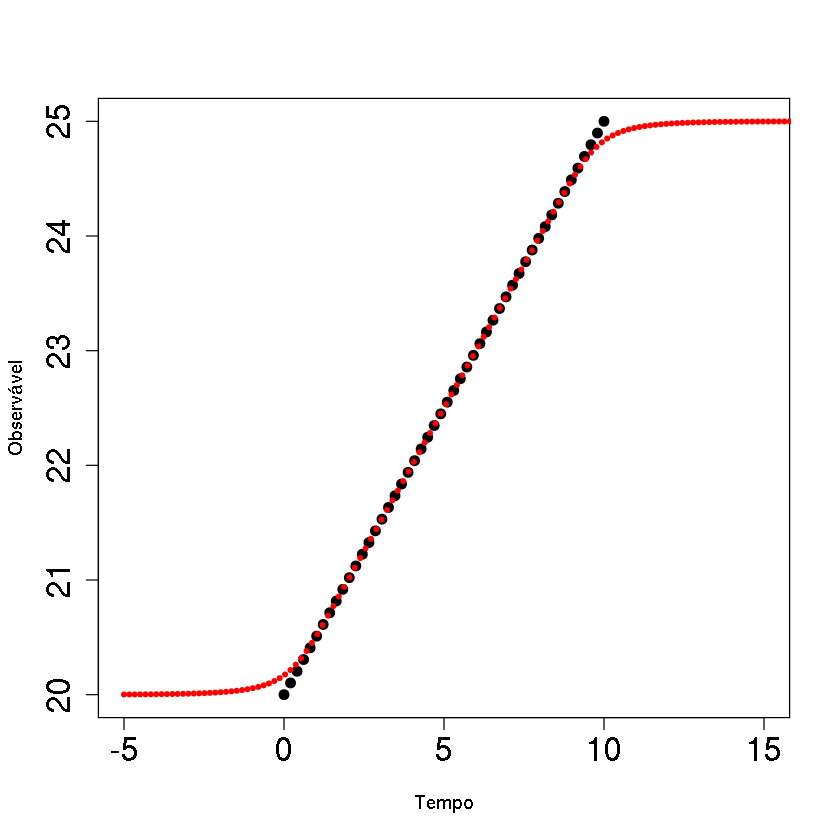

In [3]:
test.linear.tempo()

Nesse sentido, o espaço de valores possíveis é considerado como apenas aqueles pertencentes ao conjunto de pontos existentes na minha amostra (nesse caso, de 0 a 10). Logo a extrapolação de valores além desse limite gera predição igual ao valor extremo do intervalo

Sendo $P(X, Y)$ probabilidade conjunta entre as variáveis $X$ e $Y$

$P(X,Y)$ -> contém a probabilidade associada a cada evento discreto. Então qualquer ponto que vá além do espaço daamostra não consegue ser previsto

In [1]:
test.seno.tempo <- function(sigma=0.5) {
    
    tempo = seq(0, 3, length=250)
    dataset = cbind(tempo, sin(2*pi*tempo))
    plot(dataset, cex=1.6, pch=20, cex.axis=2, xlab='Tempo', ylab='Observável', xlim=c(0,4))
    
    X = matrix(dataset[,1], ncol=1)
    Y = dataset[,2]
    
    N = NULL
    for (tempo in seq(0, 4, length=350)) {
        valor = dwnn(query=tempo, X=X, Y=Y, sigma=sigma)
        N = rbind(N, c(tempo, valor))
    }
    
    points(N, col=2, pch=20, cex=.8)
}

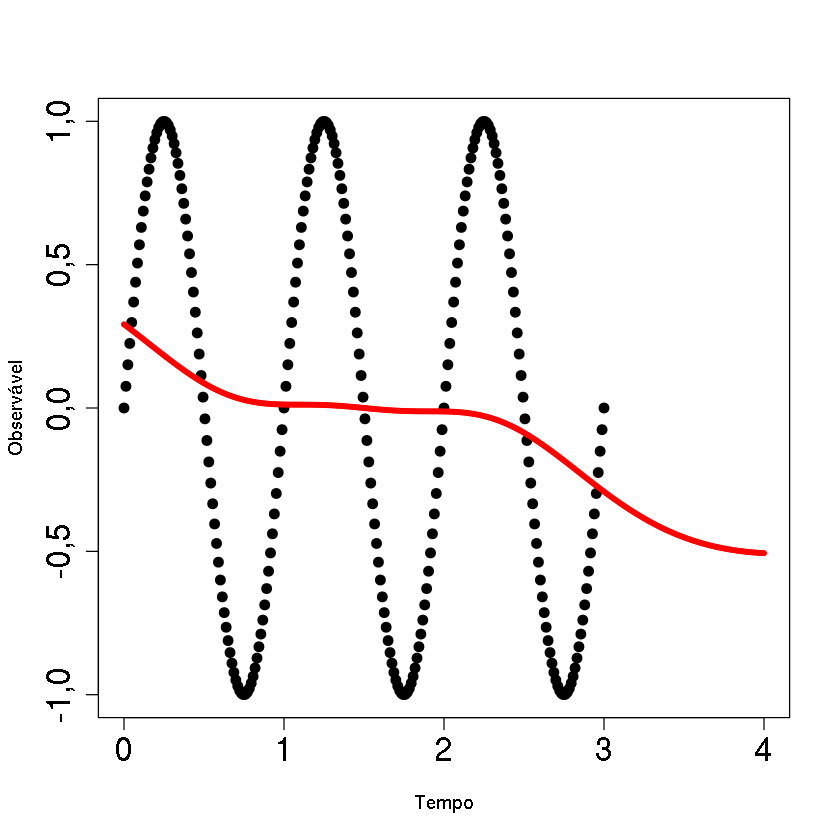

In [4]:
test.seno.tempo()

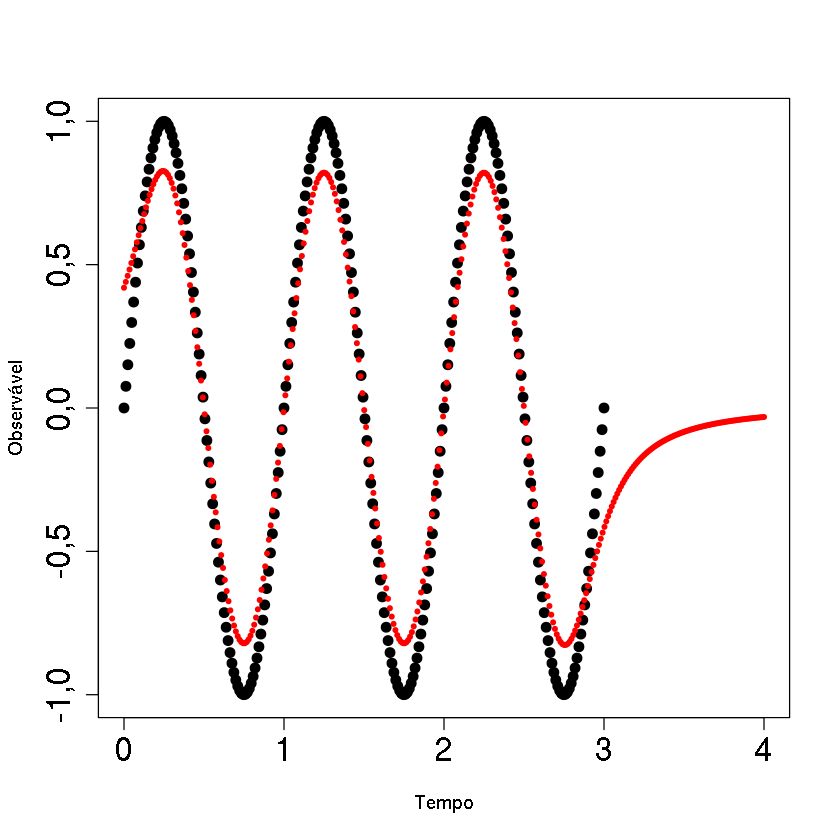

In [5]:
test.seno.tempo(0.1)

Reorganizando o conjunto de dados em uma outra forma de espaço

### Takens embedding theorem

Há um espaço que permite mapear uma observação x(t) em um determinado tempo a demais observações x(t-d), x(t-2d), ... supondo que o sistema seja determinístico

In [1]:
tempo = seq(0, 3, length=250)
valores = sin(2*pi*tempo)

In [2]:
train = valores[1:125]
test = valores[126:250]

espaco.train = cbind(train[1:124], train[2:125])
espaco.test = cbind(test[1:124], test[2:125])

In [3]:
espaco.train[1:5,]

[,1]       [,2]      
[1,] 0.00000000 0.07562875
[2,] 0.07562875 0.15082430
[3,] 0.15082430 0.22515594
[4,] 0.22515594 0.29819791
[5,] 0.29819791 0.36953183

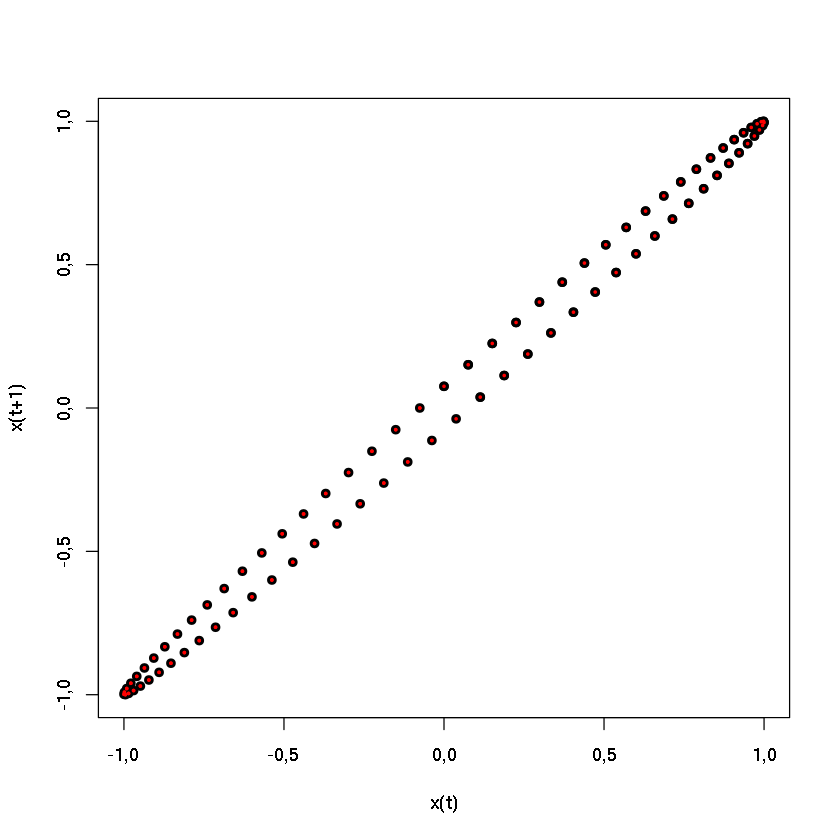

In [4]:
plot(espaco.train, xlab='x(t)', ylab='x(t+1)', cex=1.4, pch=20)
points(espaco.test, c=2 , cex=.4, pch=20)

Agora a distribuição de probabilidade conjunta $P(X,Y)$, no espaço reconstruído considera as relações que ocorrem em instantes de tempos distintos

Caso seja determinístico, os dados para prever o futuro são condizentes com os dados do passado, e dado um valor de teste x(t), a predição para x(t+1) é coerente

In [11]:
require(tseriesChaos)

Loading required package: tseriesChaos


In [9]:
test.seno.espaco_fase <- function(sigma=0.5) {
    
    tempo = seq(0, 3, length=250)
    calores = sin(2*pi*tempo)
    
    dataset = tseriesChaos::embedd(valores, m=2, d=1)
    
    X = matrix(dataset[,1], ncol=1)
    Y = dataset[,2]
    
    x.last = as.numeric(Y[length(Y)])
    
    N = NULL
    for (i in 1:50) {
        x.last.plus.1 = dwnn(query=x.last, X=X, Y=Y, sigma=sigma)
        N = rbind(N, c(x.last, x.last.plus.1))
        x.last = x.last.plus.1
    }
    
    plot(dataset, cex=1.4, pch=20, cex.lab=2, cex.axis=1.5, xlab='x(t)', ylab='x(t+1)')
    points(N, col=2, pch=20, cex=.8)
}

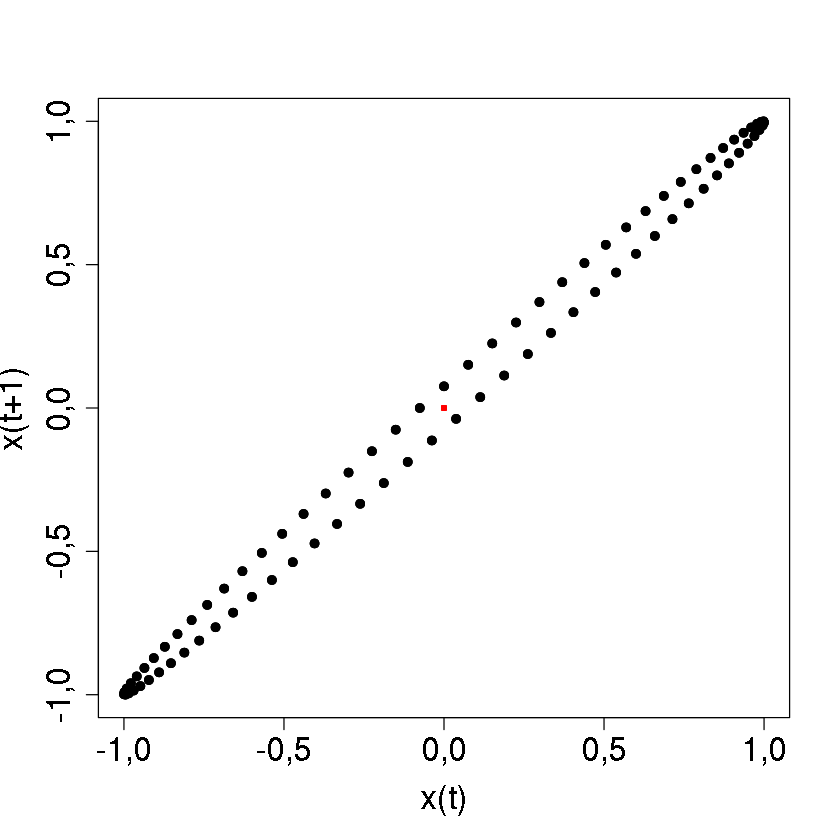

In [10]:
test.seno.espaco_fase()

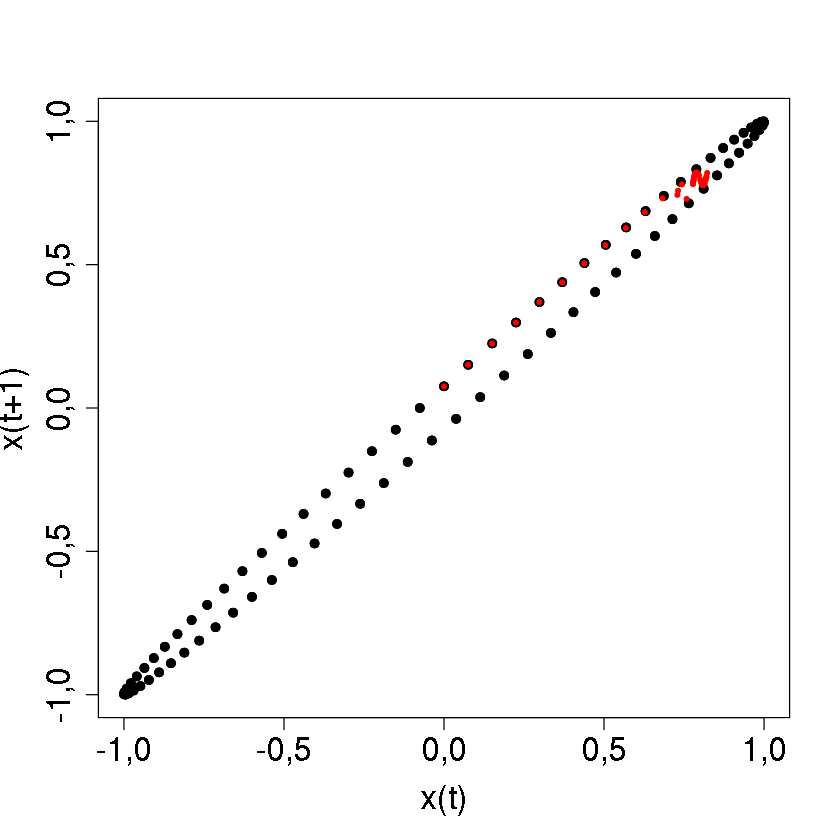

In [53]:
test.seno.espaco_fase(.01)

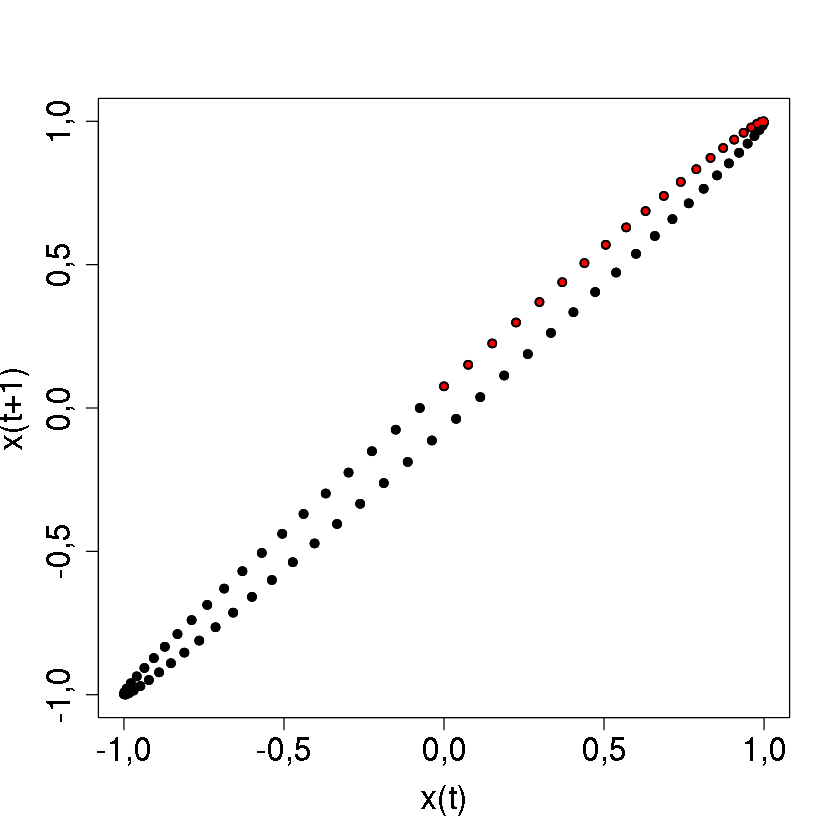

In [54]:
test.seno.espaco_fase(.001)

Série temporal: sequência de valores obtidos ao longo do tempo (uniformemente distribuídos ou não)

* Puramente estocástica (sem dependência temporal)


$$
x(t) = N(u, \sigma) 
\\
x(t) = U(min, max)
$$


* Puramente determinística (todo valor pode ser representado por uma combinação de valores históricos)


$$
x(t) = \phi_1 * x(t-5) + \phi_2 * x(t-10)
$$


* Misturas

$$
x(t) = \phi_1 * x(t-5) + \phi_2 * x(t-10) + N(u, \sigma)
$$

Analisando a correlação da função sobre si mesma

In [6]:
series = sin(2*pi*seq(0,9,len=1000))
series[1:1000] %*% series[1:1000]

[,1] 
[1,] 499,5

In [7]:
series[1:999] %*% series[2:1000]

[,1] 
[1,] 498,7

In [8]:
series[1:998] %*% series[3:1000]

[,1]    
[1,] 496,3057

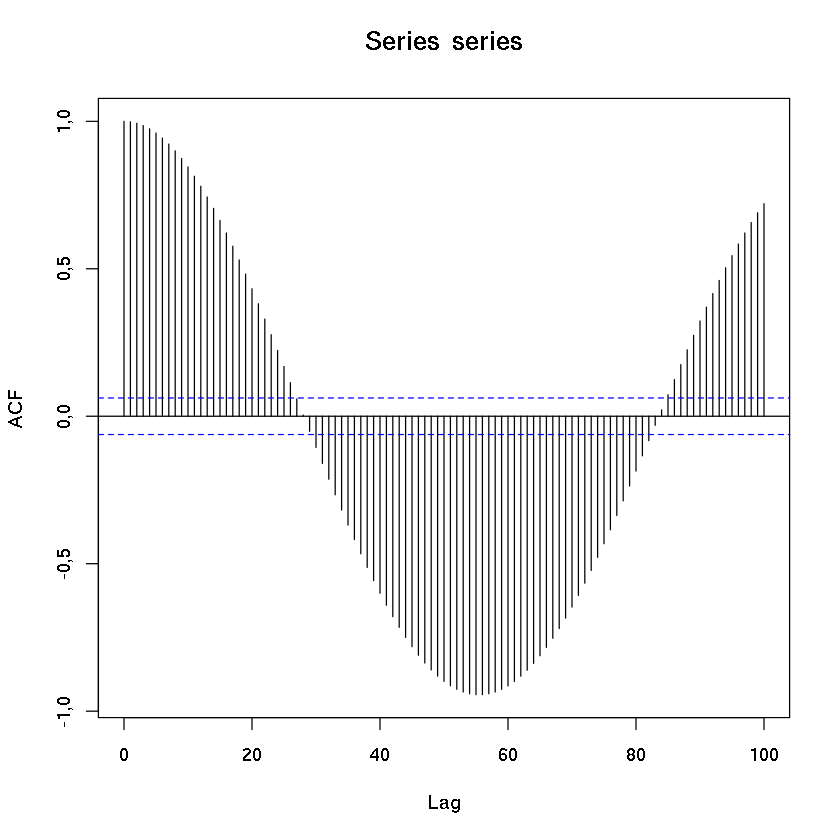

In [9]:
acf(series, lag.max=100)

Para cada valor ao longo do eixo "Lag", "ACF" (Auto-Correlation Function) representa a correlação da função sobre si mesma

1. Para valores fora do intervalo de confiança, existe dependência temporal significativa

2. Caso haja dependência, oTeorema de Takens pode ser aplicado para modelar o relação temporal

3. Utilizar um algoritmo de regressão (DWNN, e.g.)

4. Caso resultados ruins, decompor em componentes estocástica e determinística

Artigo recomendado: https://journals.aps.org/pra/abstract/10.1103/PhysRevA.33.1134

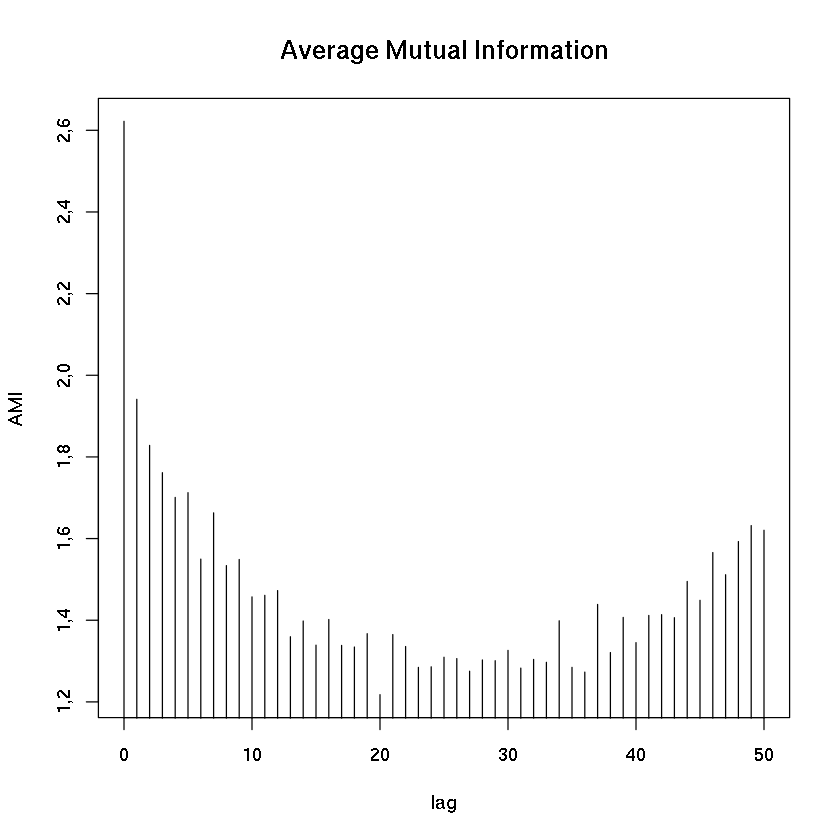

In [12]:
mutual(series, lag.max = 50)

Os mínimos da informação mútua são importantes candidatos a o número de lag temporal que otimiza a predição via Takens embedding

Artigo recomendado: https://journals.aps.org/pra/abstract/10.1103/PhysRevA.45.3403

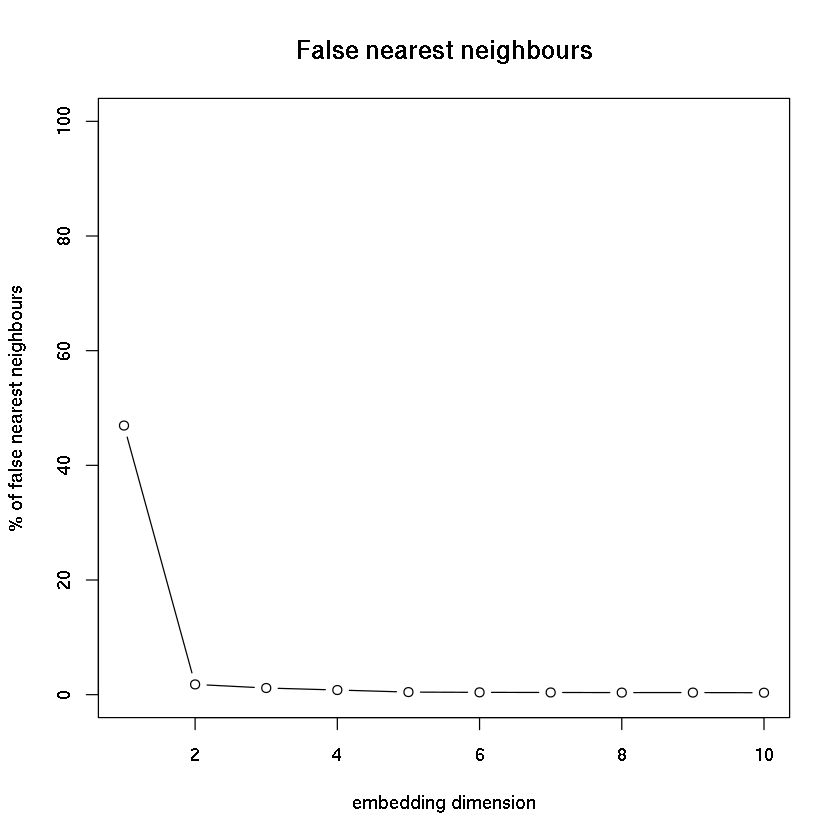

In [67]:
plot(false.nearest(series, d=5, m=10, t=10))

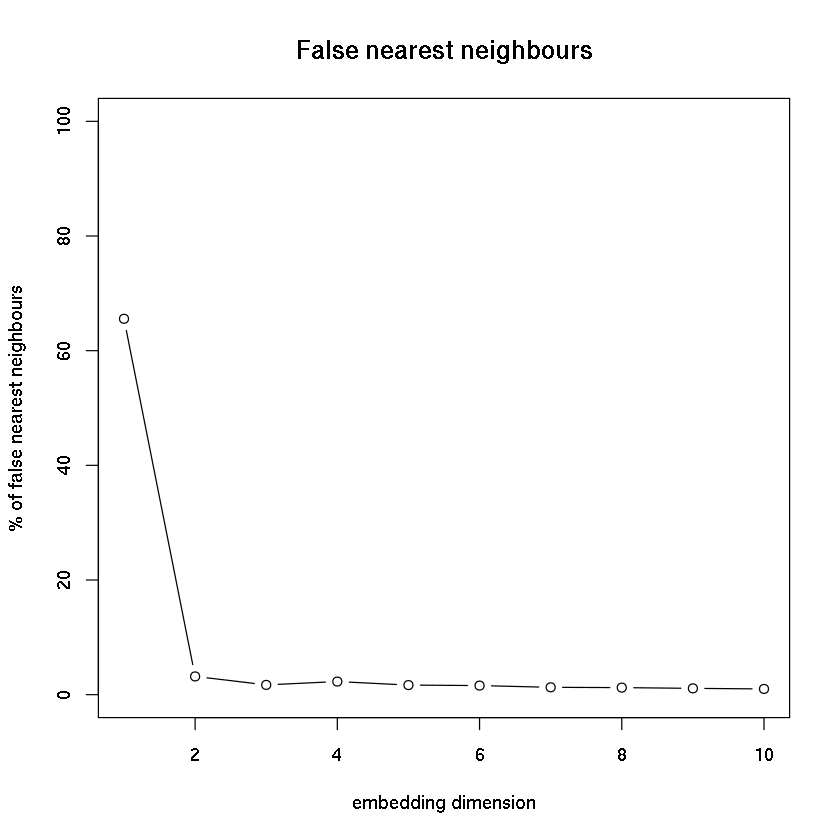

In [69]:
plot(false.nearest(series, d=16, m=10, t=10))

In [74]:
test.seno_com_ruido.espaco_fase <- function(sigma=0.5) {
    tempo = seq(0, 5, length=1000)
    valores = sin(2*pi*tempo) + rnorm(mean=0, sd=0.15, n=1000)
    
    par(mfrow=c(2,1))
    plot(valores)
    acf(valores)
    
}

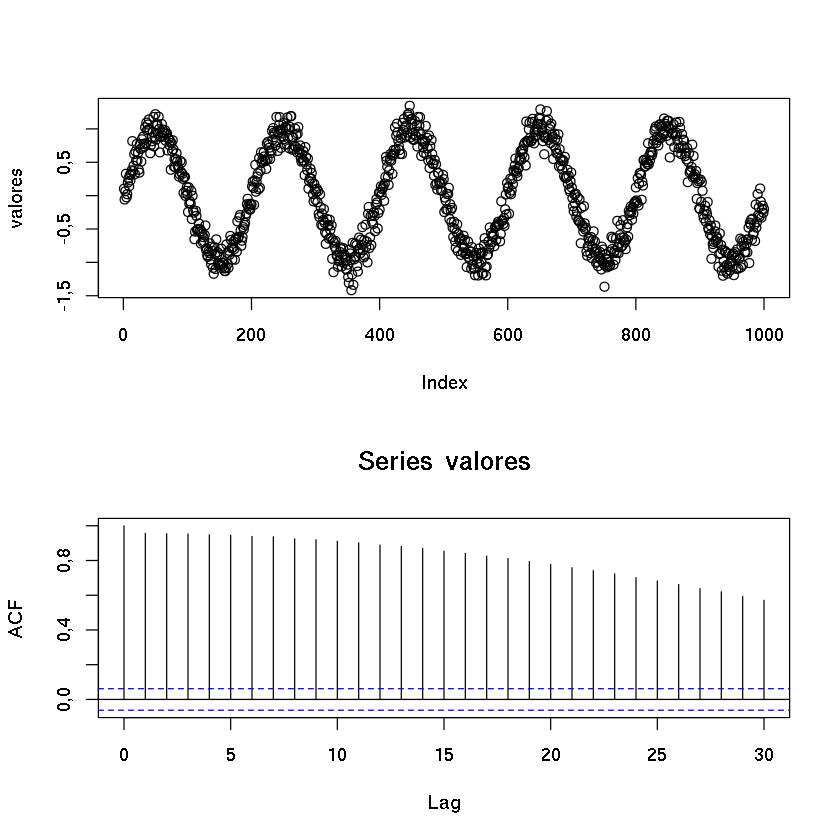

In [75]:
test.seno_com_ruido.espaco_fase()

Pelo resultado do ACF: Tem dependência temporal expressiva

In [77]:
valores[0:10]

[1] 0,00000000 0,07562875 0,15082430 0,22515594 0,29819791 0,36953183
 [7] 0,43874911 0,50545327 0,56926224 0,62981052

        0         1         2         3         4         5         6         7 
2,3025851 2,1972246 2,0794415 1,9459101 1,7917595 1,6094379 1,3862944 1,0986123 
        8         9        10        11        12        13        14        15 
0,6931472 0,0000000        NA        NA        NA        NA        NA        NA 
       16        17        18        19        20 
       NA        NA        NA        NA        NA 
attr(,"class")
[1] "ami"
         1          2          3          4          5          6          7 
-0,1053605 -0,1177830 -0,1335314 -0,1541507 -0,1823216 -0,2231436 -0,2876821 
         8          9         10         11         12         13         14 
-0,4054651 -0,6931472         NA         NA         NA         NA         NA 
        15         16         17         18         19         20 
        NA         NA         NA         NA         NA         NA 
attr(,"class")
[1] "ami"


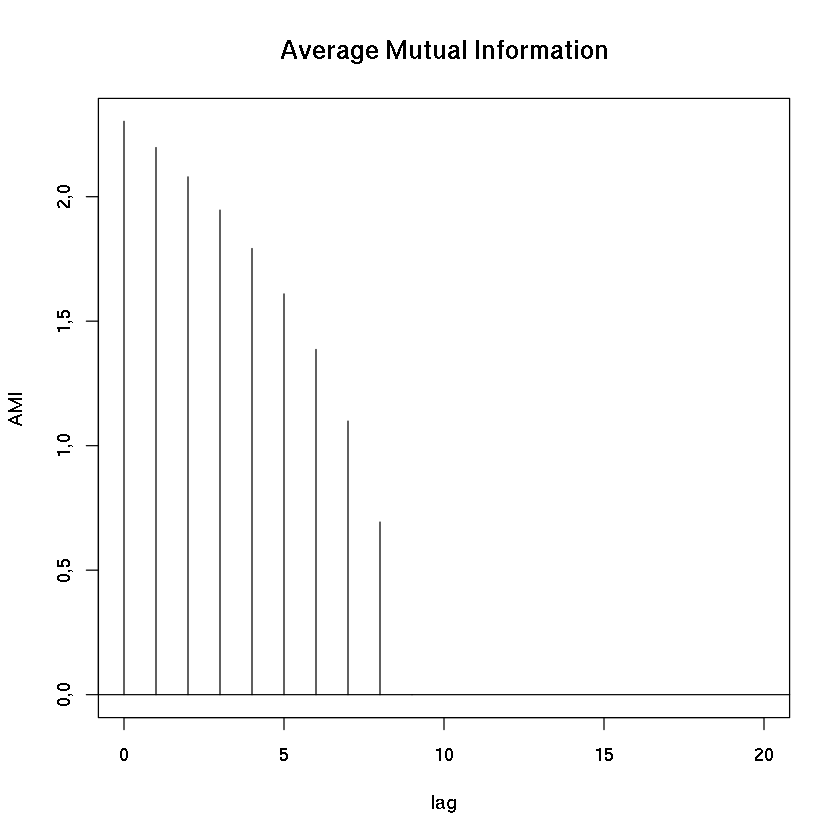

In [82]:
z = mutual(valores[0:10])
print(z)
print(diff(z))

In [83]:
false.nearest(valores, m=10, d=5, t=10)

                   m1           m2           m3           m4           m5
fraction 5,840046e-01 3,473492e-02 2,593660e-02 2,264151e-02 1,104972e-02
total    3,476000e+03 1,094000e+03 6,940000e+02 5,300000e+02 3,620000e+02
                   m6           m7           m8           m9          m10
fraction 0,000000e+00 0,000000e+00 0,000000e+00 0,000000e+00 0,000000e+00
total    3,420000e+02 3,220000e+02 3,020000e+02 2,820000e+02 2,620000e+02

In [85]:
print(false.nearest(valores, m=10, d=5, t=10)[1,])

        m1         m2         m3         m4         m5         m6         m7 
0,58400460 0,03473492 0,02593660 0,02264151 0,01104972 0,00000000 0,00000000 
        m8         m9        m10 
0,00000000 0,00000000 0,00000000 


In [156]:
test.seno_com_ruido.espaco_fase <- function(sigma=0.5, sd=0.1) {
    tempo = seq(0, 5, length=1000)
    valores = sin(2*pi*tempo) + rnorm(mean=0, sd=sd, n=1000)
    
    # Tentativa de modelagem determinística
    ami = tseriesChaos::mutual(valores, lag.max=100)
    # ami <--- 1 0.8 0.7 0.6 0.7
    v = diff(ami)
    # v <----- -0.2 -0.1 -0.1 +0.1
    
    d = as.numeric(which(v > 0)[1]) # Primeiro elemento cujo valor ami é positivo
    
    fnn = tseriesChaos::false.nearest(valores, m=10, d=d, t=10)
    print(fnn)
    m = as.numeric(which.min(fnn[1,])[1])
    
    cat("Embedding dimension = ", m, "\n")
    cat("Time lag = ", d, "\n")
    
    dataset = tseriesChaos::embedd(valores, m=m, d=d)
    
    labelId = ncol(dataset)
    print(labelId)
    
    X = matrix(dataset[,1:(labelId-1)], ncol=labelId-1)
    Y = dataset[,labelId]
    
    x.last = as.numeric(Y[length(Y)])
    N = NULL
    
    buffer = dataset
    for (new.row in (nrow(buffer)+1):(nrow(buffer)+300)){
        
        x = as.numeric(buffer[new.row - d, 2:ncol(buffer)])
        y = dwnn(query=x, X=X, Y=Y, sigma=sigma)
        buffer = rbind(buffer, c(x,y))
    }
    
    plot(Y, t='l', cex=1.5, pch=20, xlab='Tempo', ylab='Valores', xlim=c(1,nrow(buffer)))
    points(buffer[,labelId], col=2, pch=20, cex=.5)

}

                   m1           m2           m3           m4           m5
fraction 7,910236e-01 5,221059e-01 3,683333e-01 3,114754e-01 3,157895e-01
total    5,766200e+04 6,876000e+03 1,200000e+03 2,440000e+02 3,800000e+01
                   m6           m7           m8           m9          m10
fraction 4,000000e-01 0,000000e+00                                       
total    1,000000e+01 2,000000e+00 0,000000e+00 0,000000e+00 0,000000e+00
Embedding dimension =  7 
Time lag =  18 
[1] 7


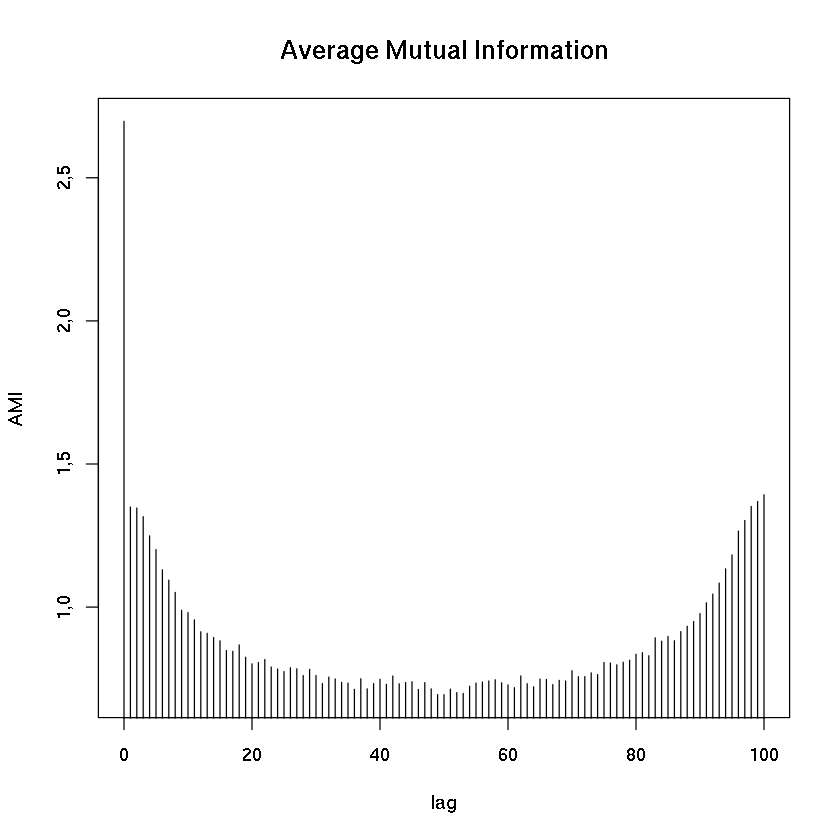

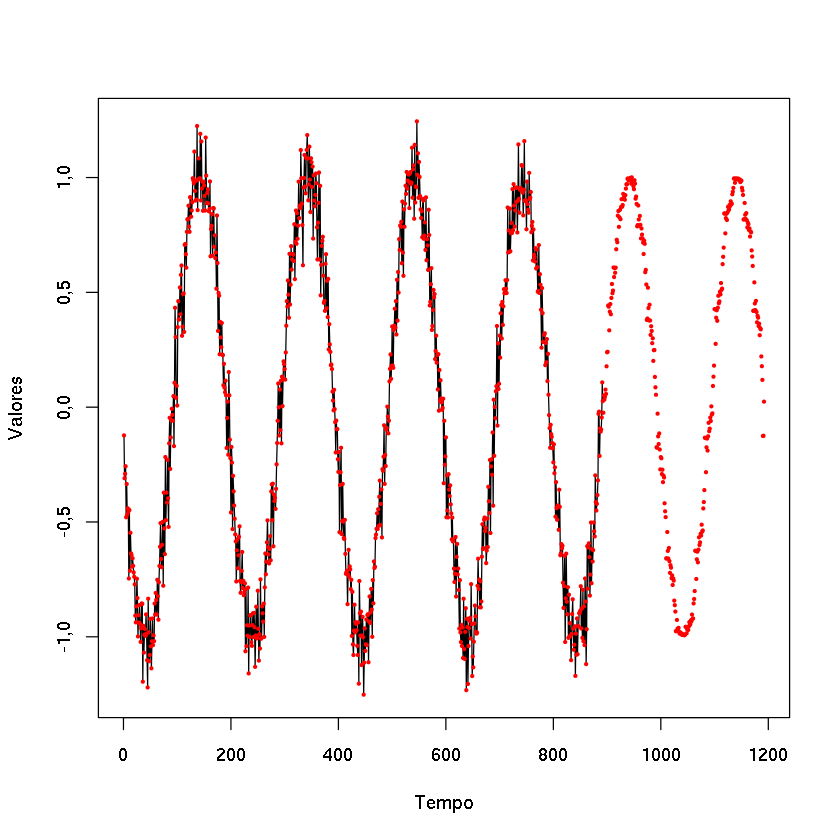

In [157]:
test.seno_com_ruido.espaco_fase(0.2)

                   m1           m2           m3           m4           m5
fraction 7,758727e-01 6,931991e-01 6,451613e-01 4,054054e-01 3,333333e-01
total    5,494200e+04 6,558000e+03 7,440000e+02 7,400000e+01 6,000000e+00
                   m6           m7           m8           m9          m10
fraction                                                                 
total    0,000000e+00 0,000000e+00 0,000000e+00 0,000000e+00 0,000000e+00
Embedding dimension =  5 
Time lag =  3 
[1] 5


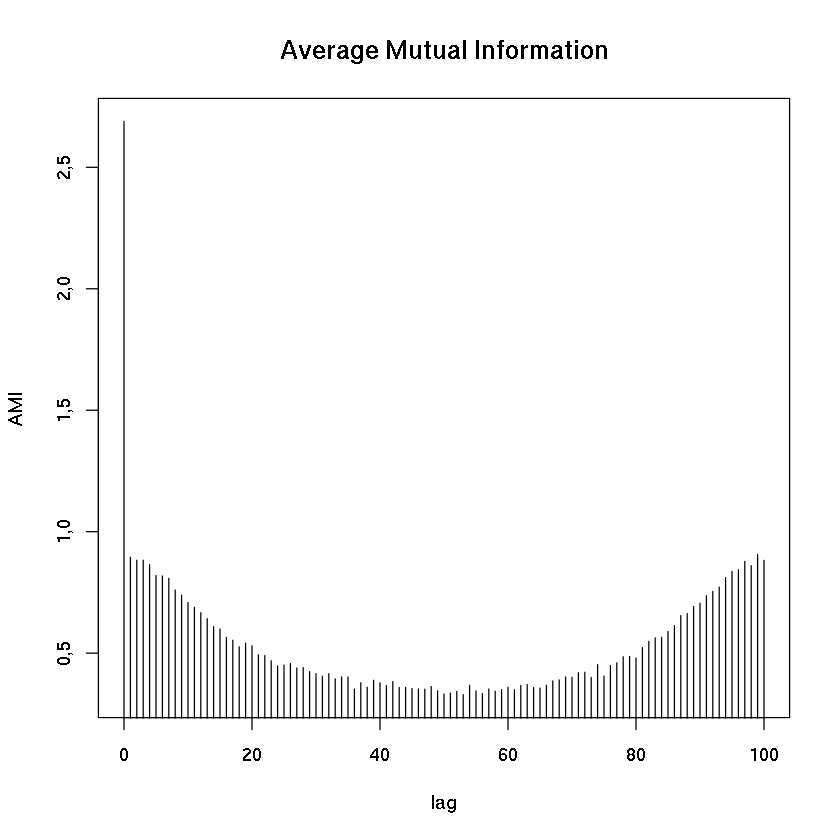

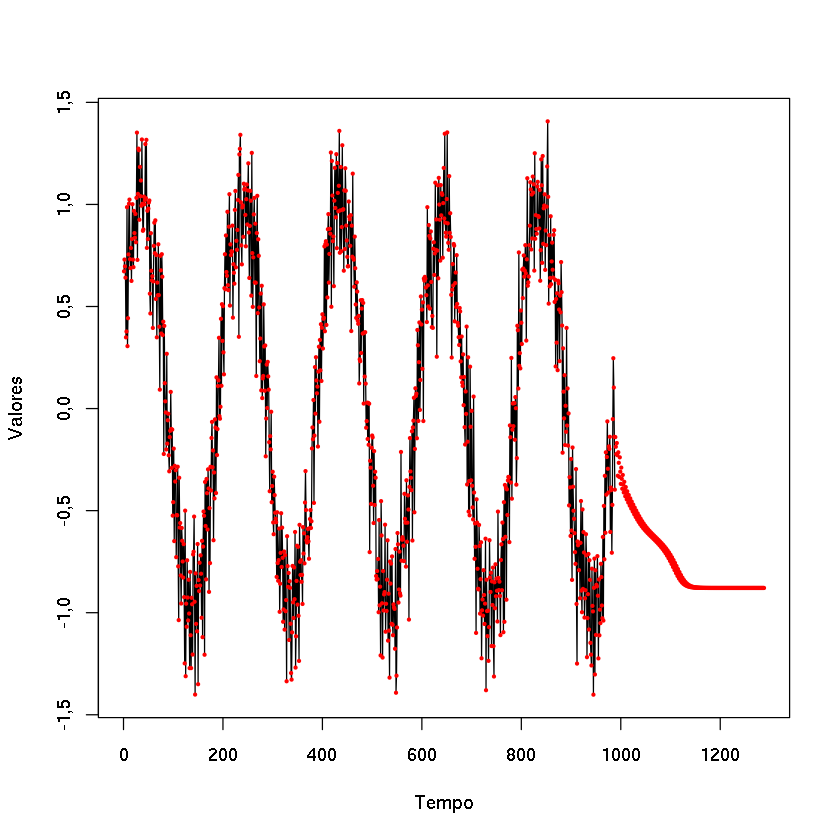

In [161]:
test.seno_com_ruido.espaco_fase(0.2, 0.2)

                   m1           m2           m3           m4           m5
fraction 7,895877e-01 7,165541e-01 7,128028e-01 7,826087e-01 1,000000e+00
total    5,263000e+04 5,920000e+03 5,780000e+02 4,600000e+01 2,000000e+00
                   m6           m7           m8           m9          m10
fraction                                                                 
total    0,000000e+00 0,000000e+00 0,000000e+00 0,000000e+00 0,000000e+00
Embedding dimension =  3 
Time lag =  4 
[1] 3


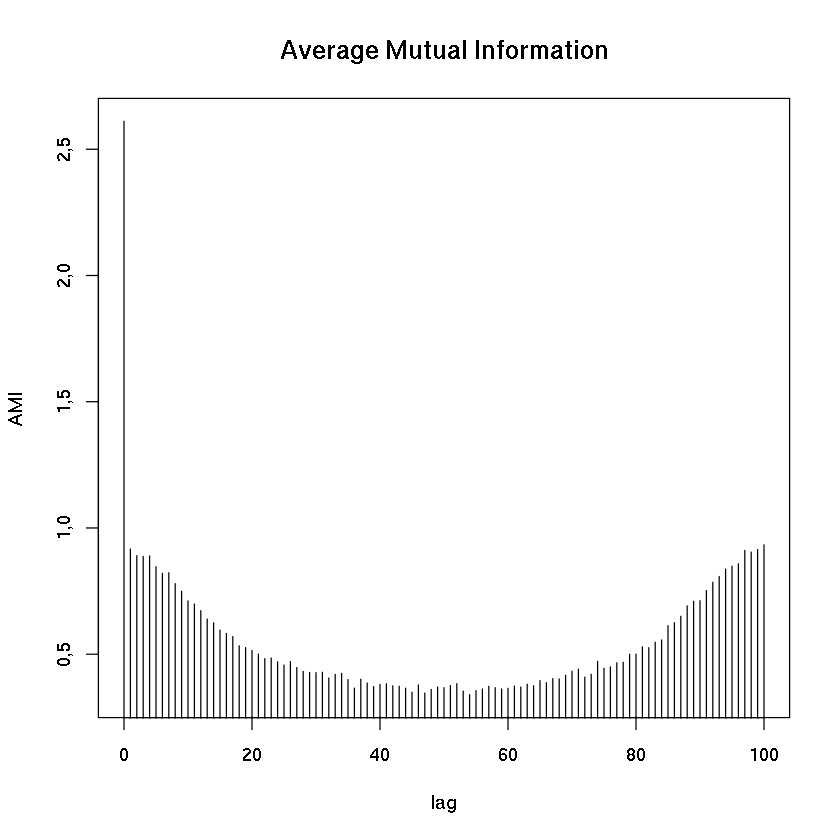

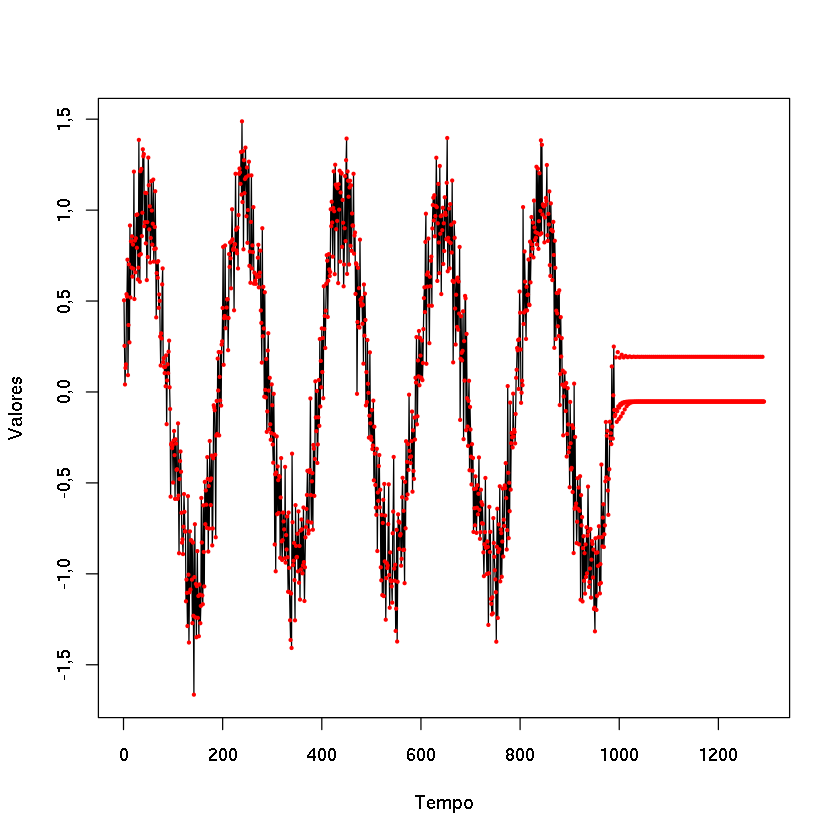

In [160]:
test.seno_com_ruido.espaco_fase(0.08, 0.2)

Recomendação de artigo: https://www.sciencedirect.com/science/article/abs/pii/S0165168415002297?via%3Dihub

## Aula 06

In [1]:
dwnn <- function(query, X, Y, sigma) {
    
    E = apply(X, 1, function(row) { sqrt(sum((row - query)^2)) })
    
    # Construção de gaussiana centrada na query
    weight = exp(-E^2 / (2*sigma^2))
    
    # Multiplicando ponto a ponto os pesos pela saída de cada elemento
    return (weight %*% Y / sum(weight))
}

In [17]:
test.seno_com_muito_ruido.espaco_fase <- function(sigma=0.5, sd=0.5) {
    tempo = seq(0,5, length=1000)
    valores = sin(2*pi*tempo) + rnorm(mean=0, sd=sd, n=1000)
    
    par(mfrow=c(3,1))
    ami = tseriesChaos::mutual(valores, lag.max=100)
    v = diff(ami)
    d = as.numeric(which(v > 0)[1])
    cat("Time lag = ", d, "\n")
    
    # Estimando Takens embedding dimension
    fnn = tseriesChaos::false.nearest(valores, m=10, d=d, t=10)
    plot(fnn)
    print(fnn)
    
    m = as.numeric(which.min(fnn[1,]))
    
    # Aplicação do Takens embedding theorem
    dataset = tseriesChaos::embedd(valores, m=m, d=d)
    
    labelId = ncol(dataset)
    
    X = matrix(dataset[,1:(labelId-1)], ncol=labelId-1)
    Y = dataset[,labelId]
    buffer = dataset

    
    for (new.row in (nrow(buffer) + 1) :(nrow(buffer) + 300)) {
        x = as.numeric(buffer[new.row - d, 2:ncol(buffer)])
        y = dwnn(query=x, X=X, Y=Y, sigma=sigma)
        buffer = rbind(buffer, c(x,y))
    }
    
    plot(Y, t='l', cex.lab=2, cex=2, cex.axis=2,
        xlab="Tempo", ylab='Valores', xlim=c(1, nrow(buffer)))
    points(buffer[, labelId], col=2, pch=20, cex=.2)
}

Time lag =  13 
                   m1           m2           m3           m4           m5
fraction 6,714212e-01 2,841007e-01 1,461378e-01 7,305389e-02 3,914591e-02
total    6,590200e+04 1,398800e+04 4,790000e+03 1,670000e+03 5,620000e+02
                   m6           m7           m8           m9          m10
fraction 3,157895e-02 3,225806e-02 0,000000e+00                          
total    1,900000e+02 6,200000e+01 1,800000e+01 0,000000e+00 0,000000e+00


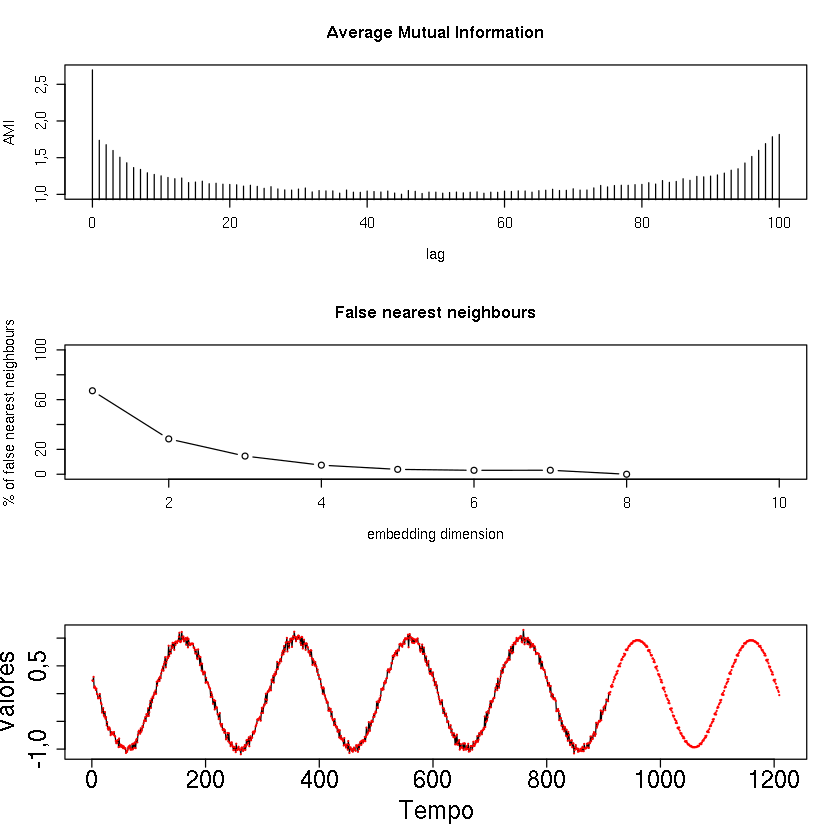

In [18]:
test.seno_com_muito_ruido.espaco_fase(sigma=0.5, sd=0.05)

O resultado precisa ter no mínimo percentual abaixo de 20% (como mencionado no artigo que deu origem ao método de False Nearest Neighbors)

Time lag =  3 
                   m1           m2           m3           m4           m5
fraction 8,841883e-01 8,364261e-01 7,894737e-01 8,000000e-01             
total    5,115200e+04 2,910000e+03 1,520000e+02 1,000000e+01 0,000000e+00
                   m6           m7           m8           m9          m10
fraction                                                                 
total    0,000000e+00 0,000000e+00 0,000000e+00 0,000000e+00 0,000000e+00


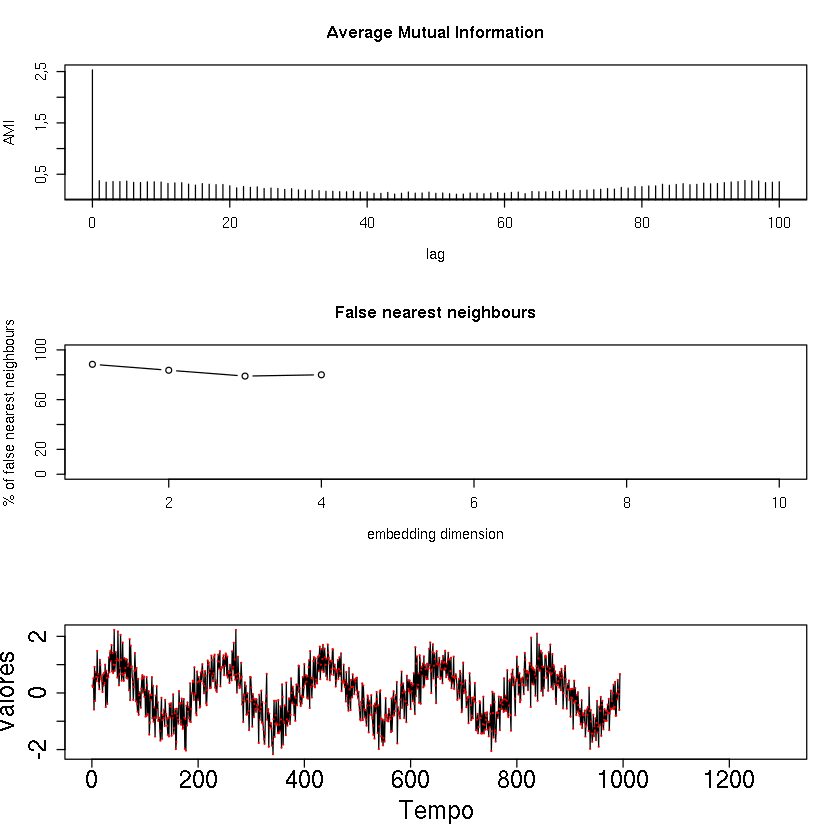

In [19]:
test.seno_com_muito_ruido.espaco_fase(sigma=0.0005, sd=0.5)

Neste cenário com muito ruído, existe um percentual alto suficiente de falsos vizinhos (acima de 70%) que o modelo nem ao menos consegue prever e não encontra vizinho algum. Neste sentido, a solução que temos é através da decomposição da senóide em componentes determinístico e estocástico

Consideramos a adição entre componente determinístico e estocástico

Estocástico: $e(t) = N(\mu = 0, \sigma = 0.5)$

Determinístico: $d(t) = sin(2\pi t)$

Componente final: $x(t) = d(t) + e(t)$

In [22]:
install.packages("EMD")
require(EMD)

also installing the dependencies ‘dotCall64’, ‘spam’, ‘maps’, ‘lattice’, ‘fields’, ‘locfit’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: EMD
Loading required package: fields
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.5-1 (2019-12-12) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 
Loading required package: locfit
locfit 1.5-9.4 	 2020-03-24


EMD: Empirical Mode Decomposition -> Criação de um envelope tomando os máximos e mínimos de uma dada série temporal. Em seguida, subtrai a função superior e inferior e toma, assim, uma função média para os dados. Essa função média pode ser então comparada com o valor real do dado naquele ponto

In [24]:
test.seno_com_muito_ruido.decomposicao.espaco_fase <- function(sigma=0.5, sd=0.5) {
    tempo = seq(0,5, length=1000)
    valores = sin(2*pi*tempo) + rnorm(mean=0, sd=sd, n=1000)
    
    # Componente estocástico
    
    # Componente determinístico
    
    return (valores)
}

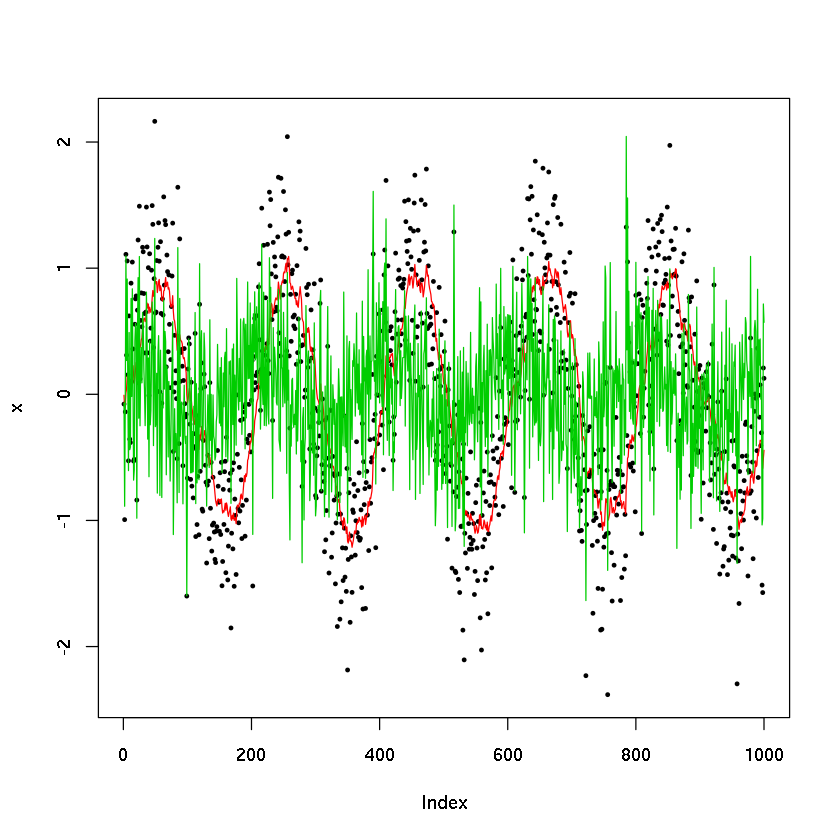

In [30]:
x = test.seno_com_muito_ruido.decomposicao.espaco_fase()
plot(x, pch=20, cex=.6)
media = 0
m_t = c()
# Usando média móvel ponderada por função exponencial
for (i in 1:length(x)) { media = media * 0.9 + x[i]*0.1; m_t=c(m_t, media); }
lines(m_t, col=2)
new_x = x - m_t
lines(new_x, col=3)

A nova função (subtração do dado real com a média móvel ponderada), em verde, permite analisar:

Zero-crossing: Se o número de vezes que a função atravessou a linha de zero é pequeno, significa que não existe uma tendência de senóide 

Isso permite decompora função original em senóides

In [31]:
decomposicao = emd(x)
decomposicao$nimf # Number Intrisic Mode Function (Número de senóides que é encontrada na série original)

[1] 8

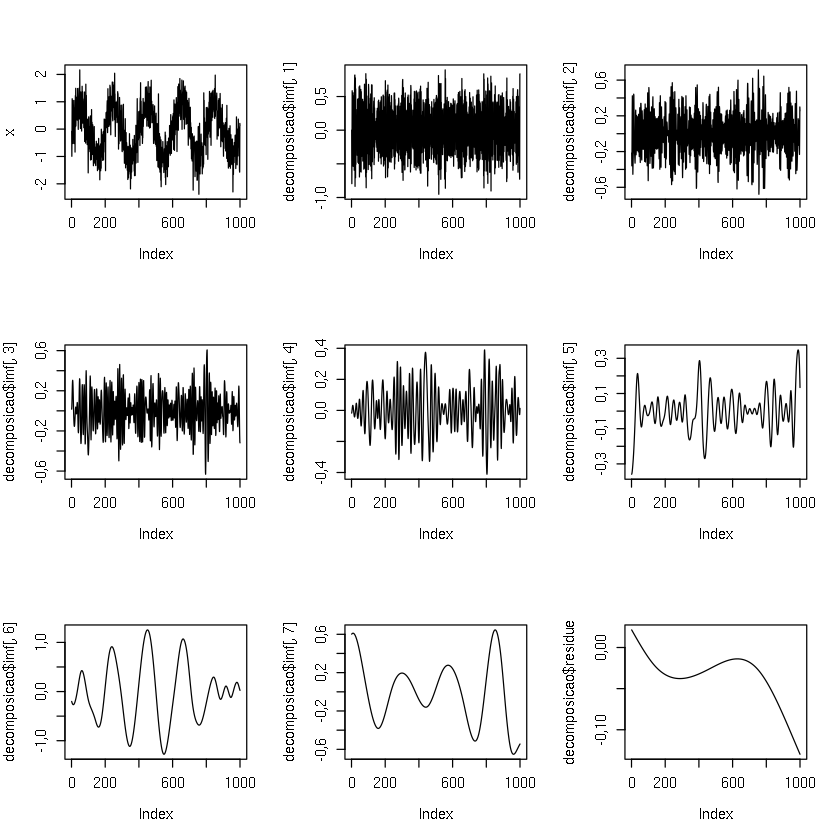

In [38]:
par(mfrow=c(3,3))
plot(x, cex.axis=1, t='l')
plot(decomposicao$imf[,1], cex.axis=1, t='l') # Primeira sinusoidal encontrada
plot(decomposicao$imf[,2], cex.axis=1, t='l') # Segunda sinusoidal encontrada
plot(decomposicao$imf[,3], cex.axis=1, t='l')
plot(decomposicao$imf[,4], cex.axis=1, t='l')
plot(decomposicao$imf[,5], cex.axis=1, t='l')
plot(decomposicao$imf[,6], cex.axis=1, t='l')
plot(decomposicao$imf[,7], cex.axis=1, t='l')
plot(decomposicao$residue, cex.axis=1, t='l')

O resíduo é o conjunto decomposto que não conseguiu completar um período de senóide

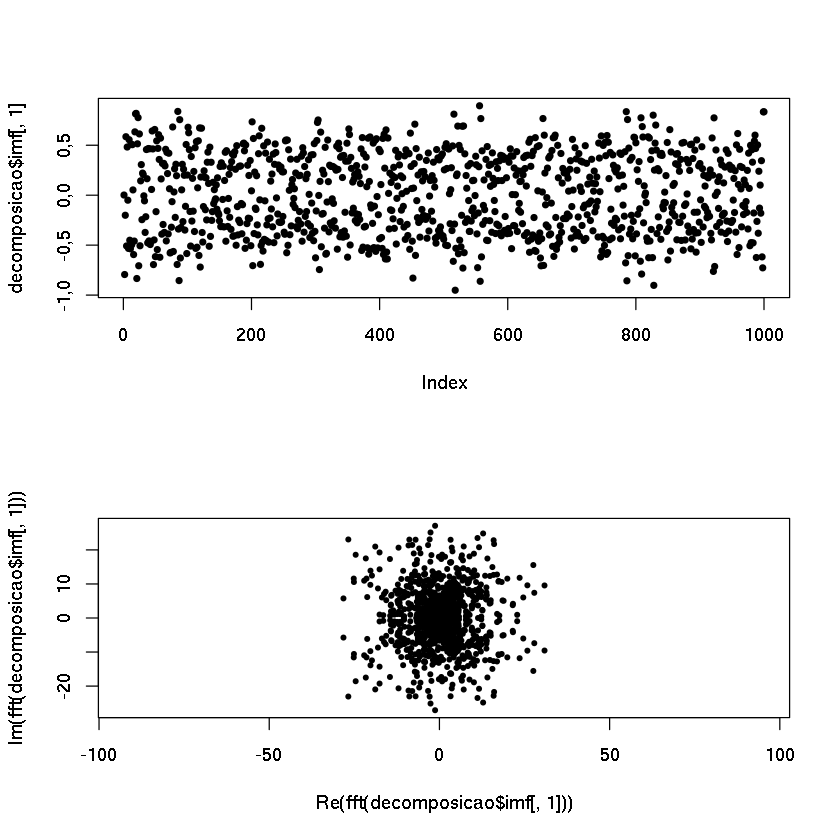

In [45]:
par(mfrow=c(2,1)); plot(decomposicao$imf[,1], cex.axis=1, pch=20)
plot(fft(decomposicao$imf[,1]), asp=1, cex=.8, pch=20) # Transformada de Fourier para a primeira decomposição

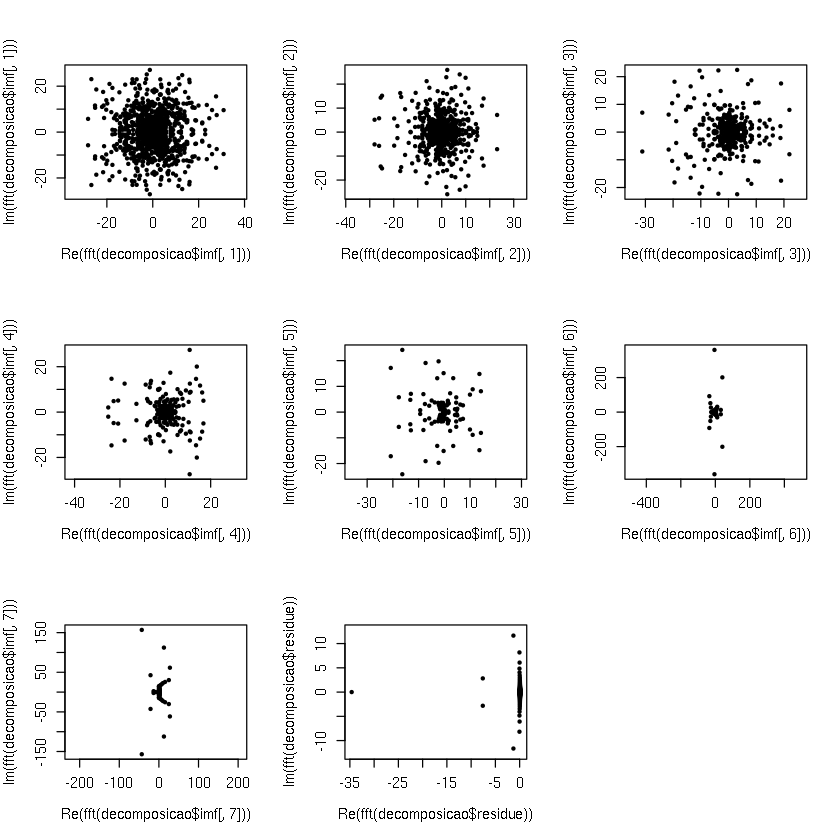

In [46]:
par(mfrow=c(3,3))

plot(fft(decomposicao$imf[,1]), asp=1, cex=.8, pch=20) # Transformada de Fourier para a primeira decomposição
plot(fft(decomposicao$imf[,2]), asp=1, cex=.8, pch=20) # Transformada de Fourier para a segunda decomposição
plot(fft(decomposicao$imf[,3]), asp=1, cex=.8, pch=20)
plot(fft(decomposicao$imf[,4]), asp=1, cex=.8, pch=20)
plot(fft(decomposicao$imf[,5]), asp=1, cex=.8, pch=20)
plot(fft(decomposicao$imf[,6]), asp=1, cex=.8, pch=20)
plot(fft(decomposicao$imf[,7]), asp=1, cex=.8, pch=20)
plot(fft(decomposicao$residue), asp=1, cex=.8, pch=20)

Quando tivermos vetores da decomposição de Fourier que apresentem norma muito grande (Caso da sexta componente EMD), é um bom sinal de que começamos a decomposição determinística.

Além disso: Congruência de Fase: Quando um vetor apresenta vizinhos próximos a ele que apresentam período ao redor do plano complexo onde apenas o angulo desse vetor altera de forma mais suave.

Sendo coeff = atan(Im(coeff) / Re(coeff)

o ângulo entre as componentes Real e Imaginária do plano complexo, podemos:

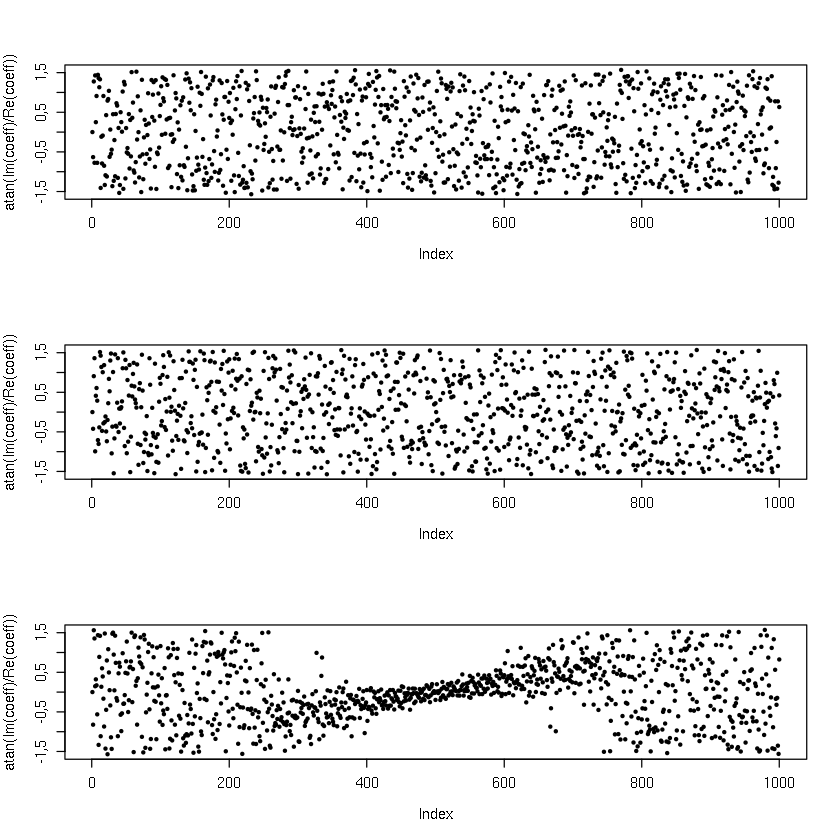

In [56]:
coeff = fft(decomposicao$imf[,1])

par(mfrow=c(3,1))

plot(atan(Im(coeff) / Re(coeff)), cex=.8, pch=20) # Mapa dos ângulos da primeira decomposição em senóide

coeff = fft(decomposicao$imf[,2])
plot(atan(Im(coeff) / Re(coeff)), cex=.8, pch=20)

coeff = fft(decomposicao$imf[,3])
plot(atan(Im(coeff) / Re(coeff)), cex=.8, pch=20) 

Começa a aparecer uma congruência de fase ao centro. São angulos existentes entre os vetores do espaço de Fourier que começama transicionar de maneira mais suave

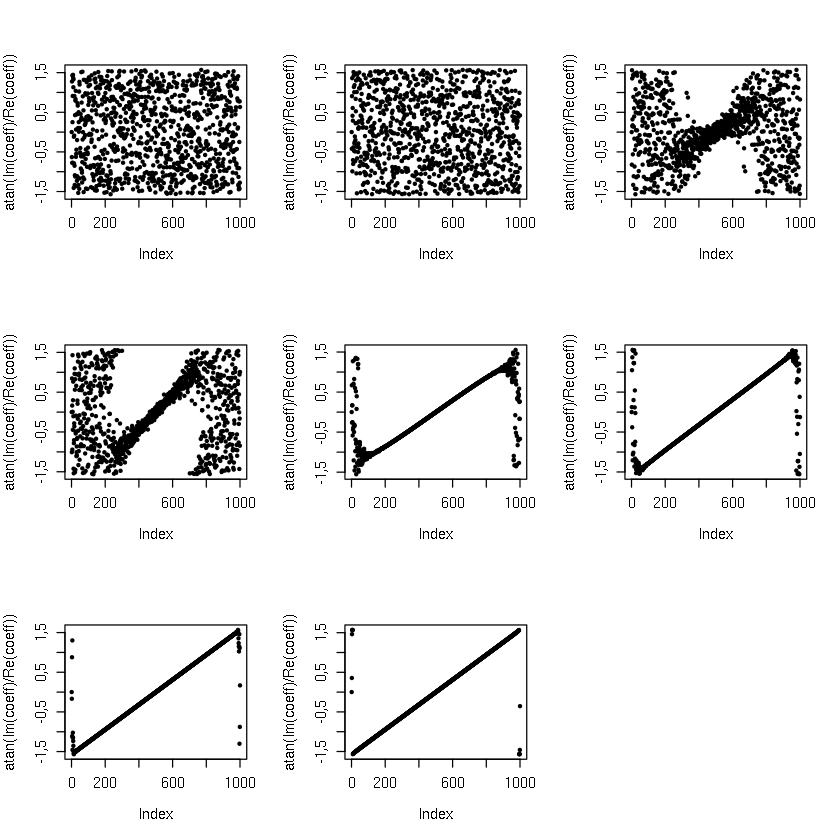

In [57]:
coeff = fft(decomposicao$imf[,1])

par(mfrow=c(3,3))

plot(atan(Im(coeff) / Re(coeff)), cex=.8, pch=20) # Mapa dos ângulos da primeira decomposição em senóide

coeff = fft(decomposicao$imf[,2])
plot(atan(Im(coeff) / Re(coeff)), cex=.8, pch=20)

coeff = fft(decomposicao$imf[,3])
plot(atan(Im(coeff) / Re(coeff)), cex=.8, pch=20) 

coeff = fft(decomposicao$imf[,4])
plot(atan(Im(coeff) / Re(coeff)), cex=.8, pch=20) 

coeff = fft(decomposicao$imf[,5])
plot(atan(Im(coeff) / Re(coeff)), cex=.8, pch=20) 

coeff = fft(decomposicao$imf[,6])
plot(atan(Im(coeff) / Re(coeff)), cex=.8, pch=20) 

coeff = fft(decomposicao$imf[,7])
plot(atan(Im(coeff) / Re(coeff)), cex=.8, pch=20) 

coeff = fft(decomposicao$residue)
plot(atan(Im(coeff) / Re(coeff)), cex=.8, pch=20) 

Uma das conclusões: A primeira decomposição apresenta baixa congruência de fase, que vai aumentando conforme as decomposições avançam

In [58]:
estocastico = rowSums(decomposicao$imf[, 1:4])
deterministico = rowSums(decomposicao$imf[, 5:7]) + decomposicao$residue

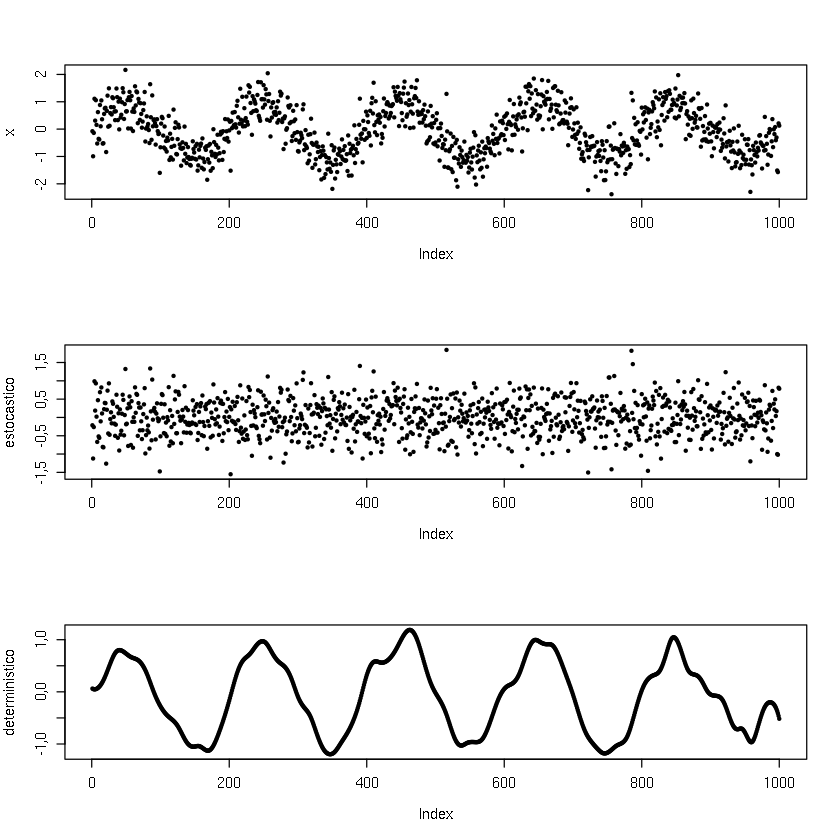

In [60]:
par(mfrow=c(3,1))

plot(x, pch=20, cex=.8)
plot(estocastico, pch=20, cex=.8)
plot(deterministico, pch=20, cex=.8)

Com essa decomposição, podemos modelar de forma mais assertiva o a série temporal dada. A componente estocástica pode ser modelada por ferramental estocástico e determinístico, com ferramental de processos dinâmicos

In [61]:
t.test(estocastico, rnorm(mean=0, sd=0.5, n=1000)) # Usando de teste de hipótese para 
                                                   # comparar a nossa função original


	Welch Two Sample t-test

data:  estocastico and rnorm(mean = 0, sd = 0,5, n = 1000)
t = 0,30753, df = 1997,5, p-value = 0,7585
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0,03684436  0,05054876
sample estimates:
    mean of x     mean of y 
 0,0065307739 -0,0003214229 


O p-value pode ser também compreendido como a área de interseção entre dois histogramas representados pelas funções que queremos comparar pelo test t

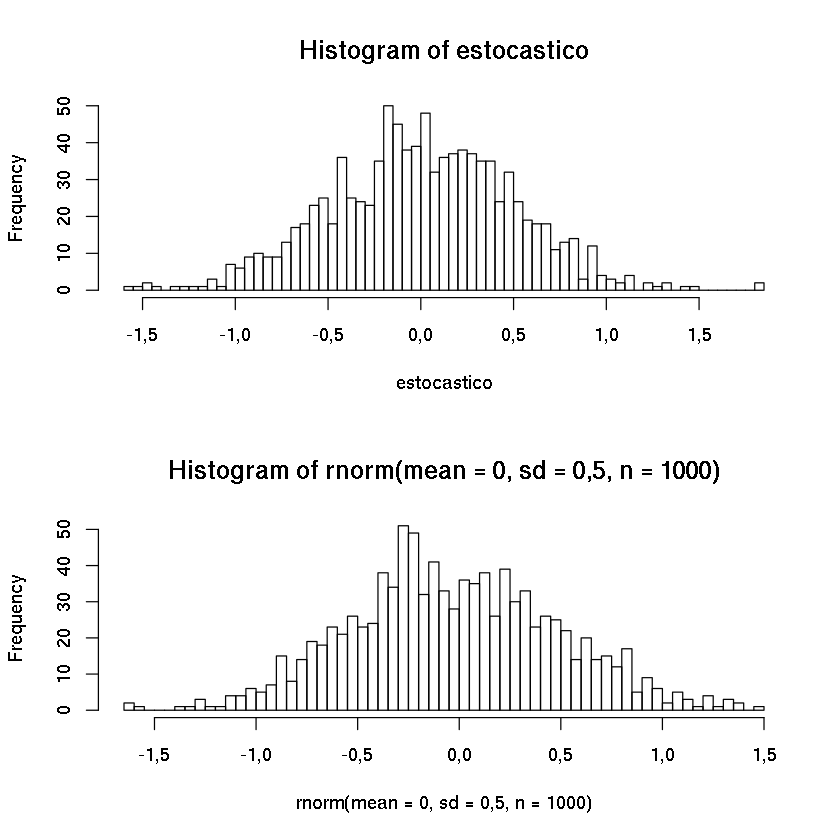

In [64]:
par(mfrow=c(2,1))
hist(estocastico, breaks=50)
hist(rnorm(mean=0, sd=0.5, n=1000), breaks=50)

Assim, um valor de p-value = 0.758 representa que 75.8% das áreas dos histogramas se interceptam

Agora precisamos comparar uma congruência de fase com as anteriores e saber o quanto de ganho tivemos. Podemos fazer isso através da Mutual Information (Diferente do que já vimos, que se refere a AUTO Mutual Information)

In [65]:
install.packages('c3net')

also installing the dependencies ‘Matrix’, ‘pkgconfig’, ‘igraph’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [66]:
require(c3net)

Loading required package: c3net
Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [67]:
makemim(rbind(rnorm(mean=0, sd=1, n=1000), rnorm(mean=0, sd=1, n=1000)))

[,1]         [,2]        
[1,] 0,000000e+00 8,506756e-05
[2,] 8,506756e-05 0,000000e+00

In [68]:
makemim(rbind(sin(2*pi*seq(0,9,len=1000)), sin(2*pi*seq(0,9,len=1000))))

[,1]     [,2]    
[1,]  0,00000 17,67525
[2,] 17,67525  0,00000

A informação mútua entre duas senóides é alta. 

A mutual information considera a entropia de duas variáveis aleatórias, sendo assim a entropia conjunta de $X$ e $Y$, mostrando qual a dependência (não necessariamente linear, que é o caso auto-mutual information) entre duas variáveis

In [110]:
test.seno_com_muito_ruido.decomposicao.espaco_fase <- function(sigma=0.5, sd=0.5, mi.epsilon=0.5) {
    tempo = seq(0,5, length=1000)
    valores = sin(2*pi*tempo) + rnorm(mean=0, sd=sd, n=1000)
    
    # Componente estocástico
    require(EMD)
    decomposicao = emd(valores)
    
    phases.vector = list()
    for (i in 1:decomposicao$nimf) {
        coeff = fft(decomposicao$imf[,i])
        phases = atan(Im(coeff) / Re(coeff))
        phases.vector[[i]] = phases
    }
    
    coeff = fft(decomposicao$residue)
    phases = atan(Im(coeff) / Re(coeff))
    phases.vector[[i+1]] = phases
    
    require(c3net)
    
    mutual.information = rep(0, length(phases.vector)-1)
    for (i in 1:(length(phases.vector) - 1)) {
        mutual.information[i] = makemim(rbind(phases.vector[[i]], phases.vector[[i+1]]))[1,2]
    }
    plot(mutual.information, pch=20, cex=.8)
    
    det.start = which(mutual.information > mi.epsilon)[1]
    stochastic = rowSums(decomposicao$imf[,1:(det.start-1)])
    
    # Componente determinístico
    deterministic = rowSums(decomposicao$imf[,det.start:decomposicao$nimf]) + decomposicao$residue
    
    par(mfrow=c(3,1))
    plot(valores, pch=20, cex=.8, cex.axis=2, main='Serie temporal original')
    plot(stochastic, pch=20, cex=.8, cex.axis=2, main='Stochastic')
    plot(deterministic, pch=20, cex=.8, cex.axis=2, main='Deterministic')
    
    #############################################
    # Modelagem baseada em Processos Estocásticos
    #############################################

    
    #############################################
    # Modelagem baseada em Sistemas Dinâmicas
    #############################################
    # Deterministic
    
    par(mfrow=c(3,1))
    
    # Estimar o time lag APENAS SOBRE A PARTE DETERMINISTIAS
    ami = tseriesChaos::mutual(deterministic, lag.max=100)
    v = diff(ami)
    d = as.numeric(which(v > 0)[1])
    cat("Time lag = ", d, "\n")
    
    # Estimando Takens embedding dimension
    fnn = tseriesChaos::false.nearest(deterministic, m=10, d=d, t=10)
    plot(fnn)
    print(fnn)
    
    m = as.numeric(which.min(fnn[1,]))
    
    # Aplicação do Takens embedding theorem
    dataset = tseriesChaos::embedd(deterministic, m=m, d=d)
    
    # Modelagem e Predição
    labelId = ncol(dataset)
    X = matrix(dataset[,1:(labelId-1)], ncol=labelId-1)
    Y = dataset[,labelId]
    buffer = dataset
    
    for (new.row in (nrow(buffer) + 1) :(nrow(buffer) + 300)) {
        x = as.numeric(buffer[new.row - d, 2:ncol(buffer)])
        y = dwnn(query=x, X=X, Y=Y, sigma=sigma)
        buffer = rbind(buffer, c(x,y))
    }
    
    plot(Y, t='l', cex.lab=2, cex=2, cex.axis=2,
        xlab="Tempo", ylab='Valores', xlim=c(1, nrow(buffer)))
    points(buffer[, labelId], col=2, pch=20, cex=.2)
    
    return (valores)
}

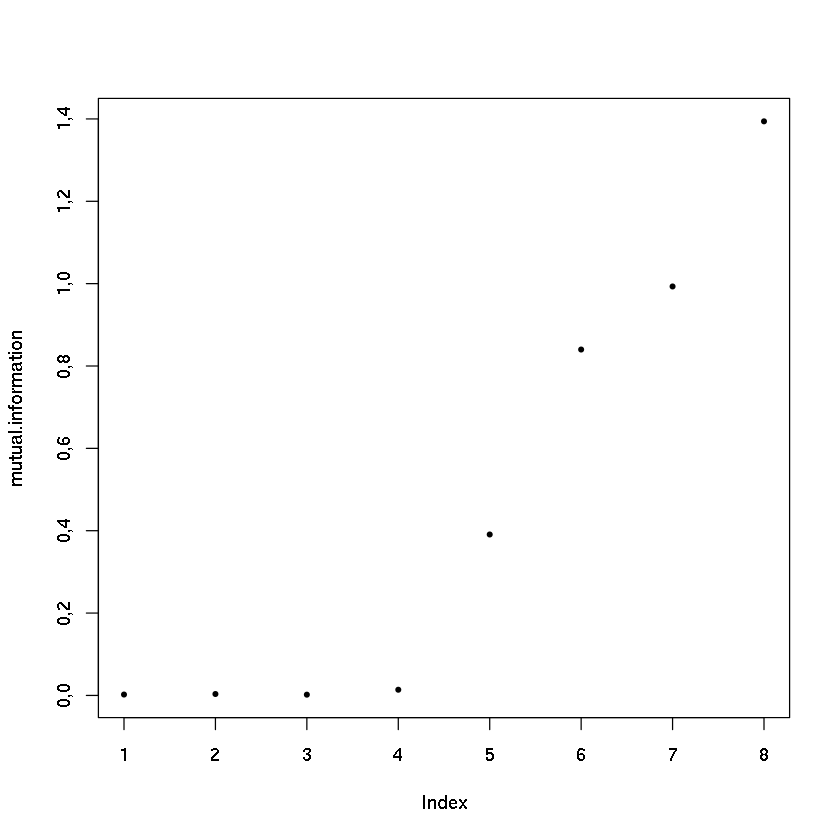

Time lag =  31 
                   m1           m2           m3           m4           m5
fraction 8,403691e-01 5,361969e-01 5,143770e-01 0,000000e+00             
total    5,353600e+04 4,144000e+03 6,260000e+02 1,600000e+01 0,000000e+00
                   m6           m7           m8           m9          m10
fraction                                                                 
total    0,000000e+00 0,000000e+00 0,000000e+00 0,000000e+00 0,000000e+00


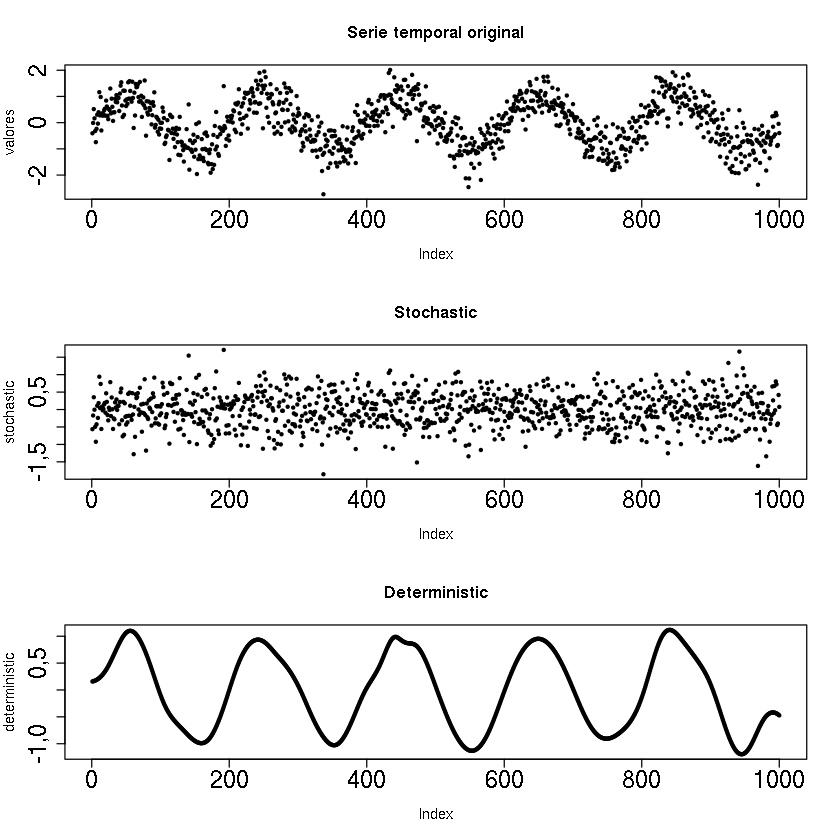

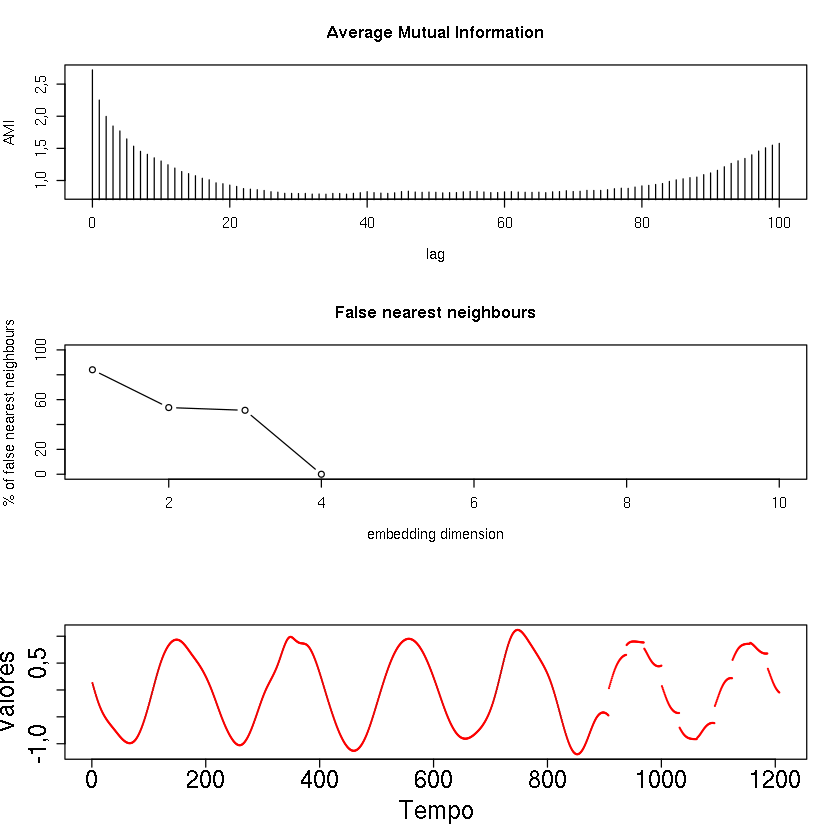

In [111]:
x = test.seno_com_muito_ruido.decomposicao.espaco_fase()

No ponto em que há uma transição (comparação entre a 4 e 5 decomposição). Neste ponto, é onde começa a parte determinística

Como modelar o componente estocástico??

In [52]:
test.seno_com_muito_ruido.decomposicao.espaco_fase <- function(sigma=0.5, sd=0.5, mi.epsilon=0.05) {
    tempo = seq(0,5, length=1000)
    valores = sin(2*pi*tempo) + rnorm(mean=0, sd=sd, n=1000)
    
    # Componente estocástico
    require(EMD)
    decomposicao = emd(valores)
    
    phases.vector = list()
    for (i in 1:decomposicao$nimf) {
        coeff = fft(decomposicao$imf[,i])
        phases = atan(Im(coeff) / Re(coeff))
        phases.vector[[i]] = phases
    }
    
    coeff = fft(decomposicao$residue)
    phases = atan(Im(coeff) / Re(coeff))
    phases.vector[[i+1]] = phases
    
    require(c3net)
    
    mutual.information = rep(0, length(phases.vector)-1)
    for (i in 1:(length(phases.vector) - 1)) {
        mutual.information[i] = makemim(rbind(phases.vector[[i]], phases.vector[[i+1]]))[1,2]
    }
    plot(mutual.information, pch=20, cex=.8)
    
    det.start = which(mutual.information > mi.epsilon)[1]
    stochastic = rowSums(decomposicao$imf[,1:(det.start-1)])
    
    # Componente determinístico
    deterministic = rowSums(decomposicao$imf[,det.start:decomposicao$nimf]) + decomposicao$residue
    
    par(mfrow=c(3,1))
    plot(valores, pch=20, cex=.8, cex.axis=2, main='Serie temporal original')
    plot(stochastic, pch=20, cex=.8, cex.axis=2, main='Stochastic')
    plot(deterministic, pch=20, cex=.8, cex.axis=2, main='Deterministic')
    
    #############################################
    # Modelagem baseada em Processos Estocásticos
    #############################################
    # Stochastic
    require(forecast)
    model = forecast::auto.arima(stochastic)
    stochastic.pred = as.numeric(predict(model, n.head=300)$pred)
    
    #############################################
    # Modelagem baseada em Sistemas Dinâmicas
    #############################################
    # Deterministic
    
    par(mfrow=c(3,1))
    
    # Estimar o time lag APENAS SOBRE A PARTE DETERMINISTIAS
    ami = tseriesChaos::mutual(deterministic, lag.max=100)
    v = diff(ami)
    d = as.numeric(which(v > 0)[1])
    cat("Time lag = ", d, "\n")
    
    # Estimando Takens embedding dimension
    fnn = tseriesChaos::false.nearest(deterministic, m=10, d=d, t=10)
    plot(fnn)
    print(fnn)
    
    m = as.numeric(which.min(fnn[1,]))
    
    # Aplicação do Takens embedding theorem
    dataset = tseriesChaos::embedd(deterministic, m=m, d=d)
    
    # Modelagem e Predição
    labelId = ncol(dataset)
    X = matrix(dataset[,1:(labelId-1)], ncol=labelId-1)
    Y = dataset[,labelId]
    buffer = dataset
    
    for (new.row in (nrow(buffer) + 1) :(nrow(buffer) + 300)) {
        x = as.numeric(buffer[new.row - d, 2:ncol(buffer)])
        y = dwnn(query=x, X=X, Y=Y, sigma=sigma)
        buffer = rbind(buffer, c(x,y))
    }
    
    deterministic.pred = buffer[(nrow(X)+1):nrow(buffer), labelId]
    
    
    plot(Y, t='l', cex.lab=2, cex=2, cex.axis=2,
        xlab="Tempo", ylab='Valores', xlim=c(1, nrow(buffer)))
    
    stochastic.pred = c(rep(NA, nrow(X)), stochastic.pred)
    points(stochastic.pred, col=2, pch=20, cex=.8)
        
    plot(Y, t='l', cex.lab=2, cex=2, cex.axis=2,
        xlab="Tempo", ylab='Valores', xlim=c(1, nrow(buffer)))
    
    deterministic.pred = c(rep(NA, nrow(X)), deterministic.pred)
    points(deterministic.pred, col=2, pch=20, cex=.8)


    return (valores)
}

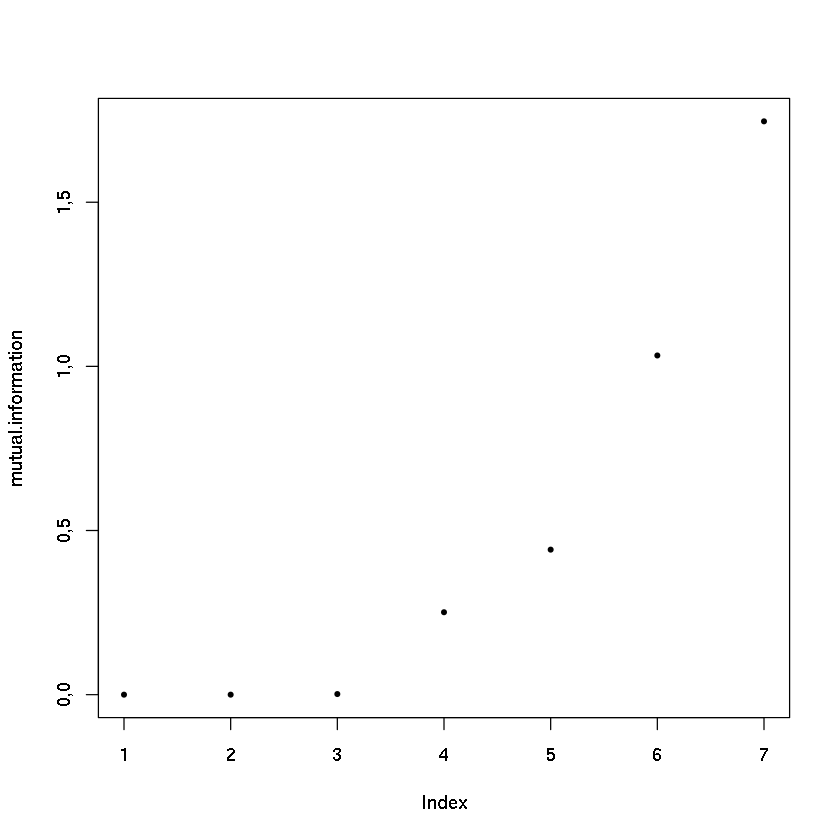

Time lag =  17 
                   m1           m2           m3           m4           m5
fraction 8,493727e-01 7,208556e-01 5,662651e-01 6,923077e-01             
total    4,989800e+04 3,740000e+03 3,320000e+02 2,600000e+01 0,000000e+00
                   m6           m7           m8           m9          m10
fraction                                                                 
total    0,000000e+00 0,000000e+00 0,000000e+00 0,000000e+00 0,000000e+00


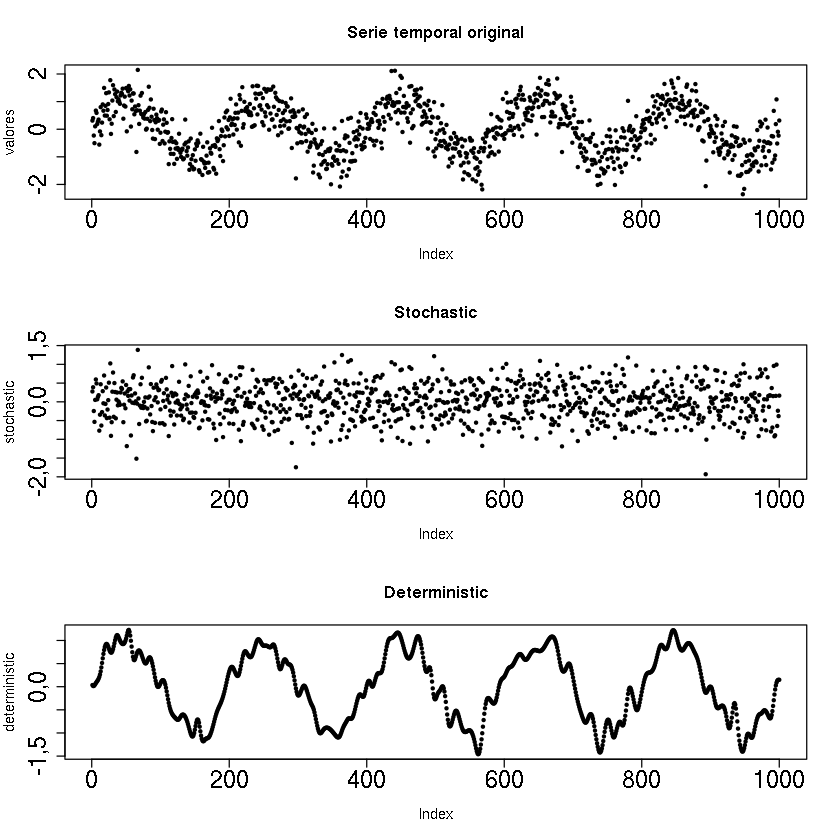

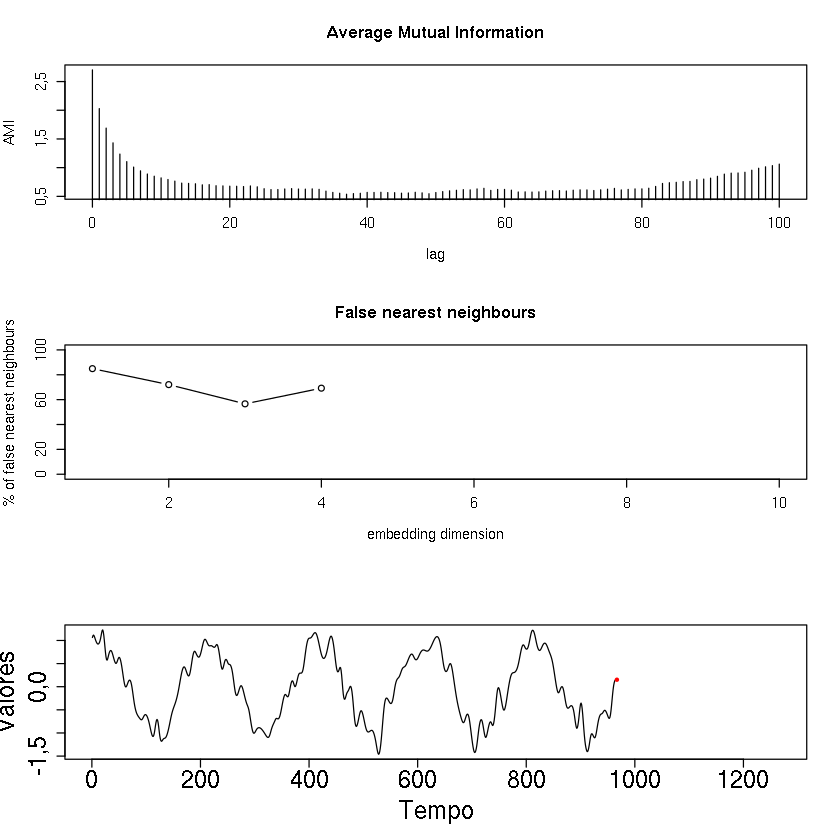

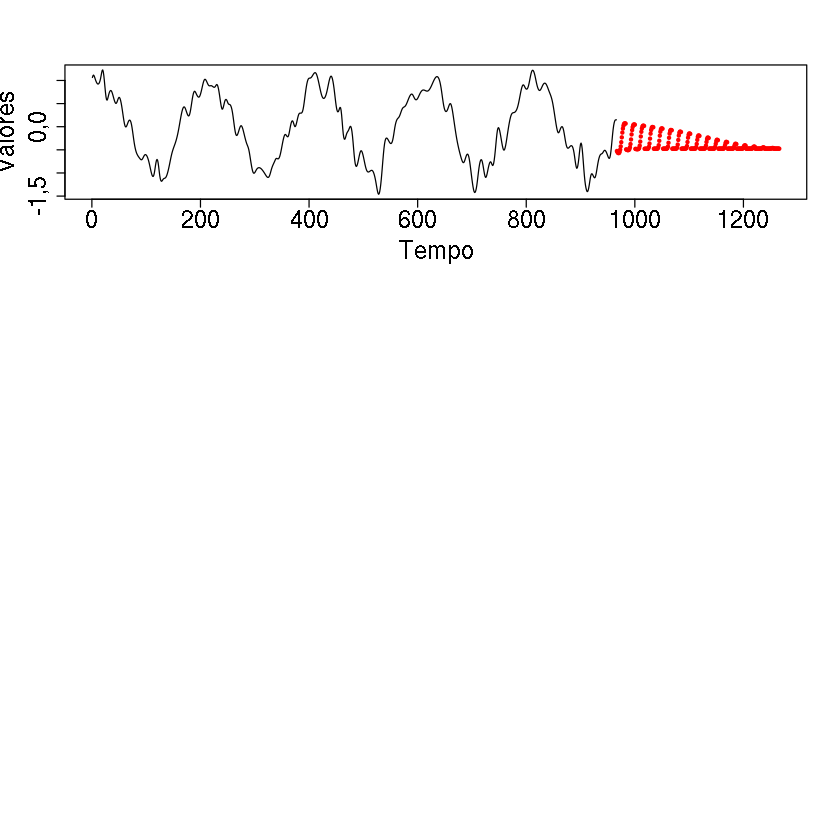

In [53]:
stochastic = test.seno_com_muito_ruido.decomposicao.espaco_fase()

Assim como FNN/AMI ajuda a encontrar Takens embedding theorem...

Para processos estocásticos: ACF/PACF, com o modelo ARIMA proposto por Box eJenkins

Ainda considera que existam um número de componentes determinísticas (com a letra $a$, AUTO REGRESSIVE AR - dependência com o passado), e um número de componentes estocásticas (com a letra $b$, MOVEL AVERAGE - processos estocásticos). Tomando a definição do manual da função 'arima' (I - INTEGRATES, um nível de dependência temporal entre as duas variáveis) inata de R:

$$
X[t] = a[1]X[t-1] + \ldots + a[p]X[t-p] + e[t] + b[1]e[t-1] + \ldots + b[q]e[t-q]
$$


In [115]:
install.packages('forecast')
require(forecast)

also installing the dependencies ‘backports’, ‘prettyunits’, ‘rprojroot’, ‘pkgbuild’, ‘rstudioapi’, ‘diffobj’, ‘rematch2’, ‘brio’, ‘callr’, ‘desc’, ‘pkgload’, ‘praise’, ‘waldo’, ‘assertthat’, ‘utf8’, ‘testthat’, ‘farver’, ‘labeling’, ‘lifecycle’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘cli’, ‘ellipsis’, ‘fansi’, ‘pillar’, ‘vctrs’, ‘xts’, ‘TTR’, ‘curl’, ‘gtable’, ‘isoband’, ‘MASS’, ‘mgcv’, ‘scales’, ‘tibble’, ‘quadprog’, ‘quantmod’, ‘nlme’, ‘colorspace’, ‘fracdiff’, ‘ggplot2’, ‘lmtest’, ‘nnet’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: forecast


In [116]:
forecast::auto.arima(stochastic)

Series: stochastic 
ARIMA(1,0,3) with zero mean 

Coefficients:
         ar1      ma1      ma2      ma3
      0,5953  -0,7021  -0,0251  -0,0911
s.e.  0,1021   0,1082   0,0396   0,0441

sigma^2 estimated as 0,218:  log likelihood=-655,43
AIC=1320,85   AICc=1320,91   BIC=1345,39

Com uma AR não nulo, existe uma relação determinística. Já com MA, existem três componentes com influencia, sendo a imediatamente anterior da medida (ma1), a mais relevante

## Aplicação NOAA

In [6]:
paris = read.csv("Estudos/NOAAparisData/NOAAparis.csv")

In [8]:
row.ids = which(paris$STATION == "FRM00007149")

In [9]:
orly = paris[row.ids,]
colnames(orly)

[1] "STATION" "DATE"    "PRCP"    "SNWD"    "TAVG"    "TMAX"    "TMIN"

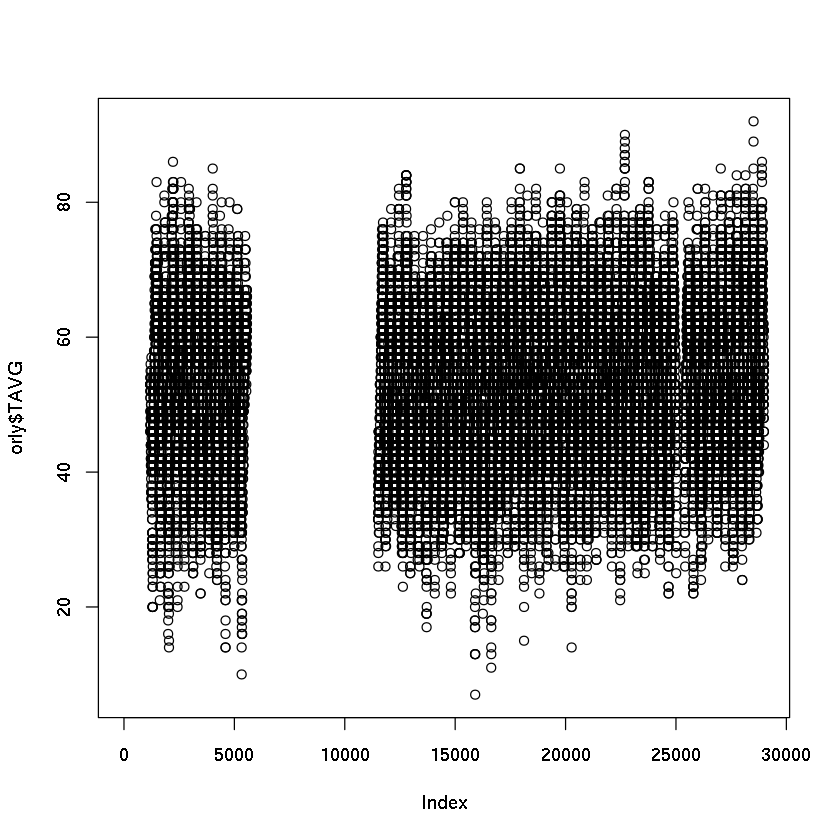

In [10]:
plot(orly$TAVG)

In [14]:
sum(is.na(orly$TAVG[12000:25000]))

[1] 46

Significa que 46 valores neste intervalo não estão preenchidos

In [15]:
which(is.na(orly$TAVG[12000:25000]))

[1]  250  251  252  253  389  432 2970 4909 5280 5396 5397 5398 5399 5400 5401
[16] 5402 5403 5513 5514 5515 5516 5517 5518 5519 5520 5521 5522 5523 5524 5525
[31] 5526 5527 5528 5529 5530 5531 5532 5533 5534 5535 5536 5537 6217 6454 6987
[46] 9014

In [54]:
dwnn <- function(query, X, Y, sigma) {
    
    E = apply(X, 1, function(row) { sqrt(sum((row - query)^2)) })
    
    # Construção de gaussiana centrada na query
    weight = exp(-E^2 / (2*sigma^2))
    
    # Multiplicando ponto a ponto os pesos pela saída de cada elemento
    return (weight %*% Y / sum(weight))
}

In [62]:
noaa <- function(filename='Estudos/NOAAparisData/NOAAparis.csv', station='FRM00007149', field='TAVG', 
                 data.gap=0.01, k=25, sigma=2, mi.epsilon=0.001) {
    
    dataset = read.csv(filename)
    row.ids = which(dataset$STATION == station)
    values = dataset[row.ids, field]
    
    filled.ids = which(!is.na(values))
    region = which(diff(filled.ids) > data.gap*length(values))
    
    series = values[filled.ids[region[1]:region[2]]]
    #plot(series)
    
    # Preencimento devalores faltantes
    # ---- séries temporais: interpolação da vizinhança
    
    for (i in which(is.na(series))) {
        neighbors = seq(i-k, i+k)
        neighbors = neighbors[neighbors >= 1 & neighbors <= length(series)]
        neighbors = neighbors[which(!is.naseries[neighbors])]
        series[i] == mean(series[neighbors])
    }
    
    # points(series, col=2)
    
     # Componente estocástico
    require(EMD)
    decomposicao = emd(series)
    
    phases.vector = list()
    for (i in 1:decomposicao$nimf) {
        coeff = fft(decomposicao$imf[,i])
        phases = atan(Im(coeff) / Re(coeff))
        phases.vector[[i]] = phases
    }
    
    coeff = fft(decomposicao$residue)
    phases = atan(Im(coeff) / Re(coeff))
    phases.vector[[i+1]] = phases
    
    require(c3net)
    
    mutual.information = rep(0, length(phases.vector)-1)
    for (i in 1:(length(phases.vector) - 1)) {
        mutual.information[i] = makemim(rbind(phases.vector[[i]], phases.vector[[i+1]]))[1,2]
    }
    plot(mutual.information, pch=20, cex=.8)
    

    det.start = which(mutual.information > mi.epsilon)[1]
    stochastic = rowSums(decomposicao$imf[,1:(det.start-1)])
    
    # Componente determinístico
    deterministic = rowSums(decomposicao$imf[,det.start:decomposicao$nimf]) + decomposicao$residue
    
    par(mfrow=c(3,1))
    plot(series, pch=20, cex=.8, cex.axis=2, main='Serie temporal original')
    plot(stochastic, pch=20, cex=.8, cex.axis=2, main='Stochastic')
    plot(deterministic, pch=20, cex=.8, cex.axis=2, main='Deterministic')
    
    #############################################
    # Modelagem baseada em Processos Estocásticos
    #############################################
    # Stochastic
    require(forecast)
    model = forecast::auto.arima(stochastic)
    stochastic.pred = as.numeric(predict(model, n.head=300)$pred)
    
    #############################################
    # Modelagem baseada em Sistemas Dinâmicas
    #############################################
    # Deterministic
    
    par(mfrow=c(3,1))
    
    # Estimar o time lag APENAS SOBRE A PARTE DETERMINISTIAS
    ami = tseriesChaos::mutual(deterministic, lag.max=100)
    v = diff(ami)
    d = as.numeric(which(v > 0)[1])
    cat("Time lag = ", d, "\n")
    
    # Estimando Takens embedding dimension
    fnn = tseriesChaos::false.nearest(deterministic, m=10, d=d, t=10)
    plot(fnn)
    print(fnn)
    
    m = as.numeric(which.min(fnn[1,]))
    
    # Aplicação do Takens embedding theorem
    dataset = tseriesChaos::embedd(deterministic, m=m, d=d)
    
    # Modelagem e Predição
    labelId = ncol(dataset)
    X = matrix(dataset[,1:(labelId-1)], ncol=labelId-1)
    Y = dataset[,labelId]
    buffer = dataset
    
    for (new.row in (nrow(buffer) + 1) :(nrow(buffer) + 300)) {
        x = as.numeric(buffer[new.row - d, 2:ncol(buffer)])
        y = dwnn(query=x, X=X, Y=Y, sigma=sigma)
        buffer = rbind(buffer, c(x,y))
    }
    
    deterministic.pred = buffer[(nrow(X)+1):nrow(buffer), labelId]
    
    
    plot(stochastic, t='l', cex.lab=2, cex=2, cex.axis=2,
        xlab="Tempo", ylab='Series', xlim=c(1, nrow(buffer)))
    
    stochastic.pred = c(rep(NA, length(stochastic)), stochastic.pred)
    points(stochastic.pred, col=2, pch=20, cex=.8)
        
    plot(deterministic, t='l', cex.lab=2, cex=2, cex.axis=2,
        xlab="Tempo", ylab='Series', xlim=c(1, nrow(buffer)))
    
    deterministic.pred = c(rep(NA, length(deterministic)), deterministic.pred)
    points(deterministic.pred, col=2, pch=20, cex=.8)
    
    ret = list()
    ret$series = series
    ret$stochastic = stochastic
    ret$deterministic = deterministic
    ret$stochastic.pred = stochastic.pred
    ret$deterministic.pred = deterministic.pred
    ret$prediction = stochastic.pred + deterministic.pred
    return (ret)
}

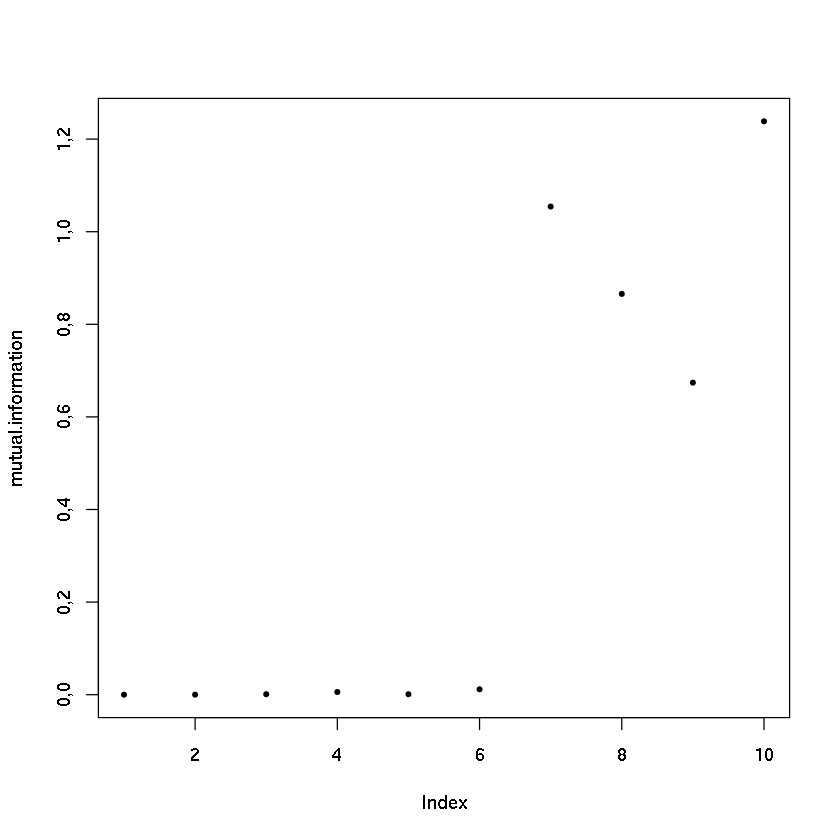

Time lag =  78 
                   m1           m2           m3           m4           m5
fraction 9,095621e-01 8,039649e-01 7,577258e-01 7,555110e-01 7,407407e-01
total    9,843576e+06 4,655800e+05 3,028800e+04 1,996000e+03 1,080000e+02
                   m6           m7           m8           m9          m10
fraction 1,000000e+00                                                    
total    8,000000e+00 0,000000e+00 0,000000e+00 0,000000e+00 0,000000e+00


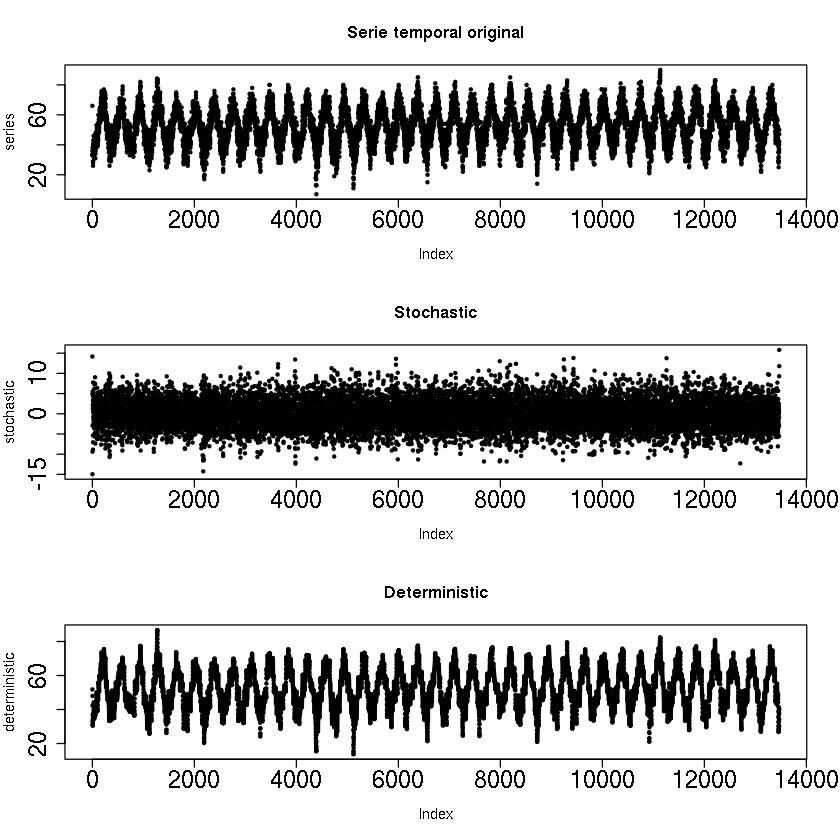

Warning message in stochastic.pred + deterministic.pred:
“comprimento do objeto maior não é múltiplo do comprimento do objeto menor”

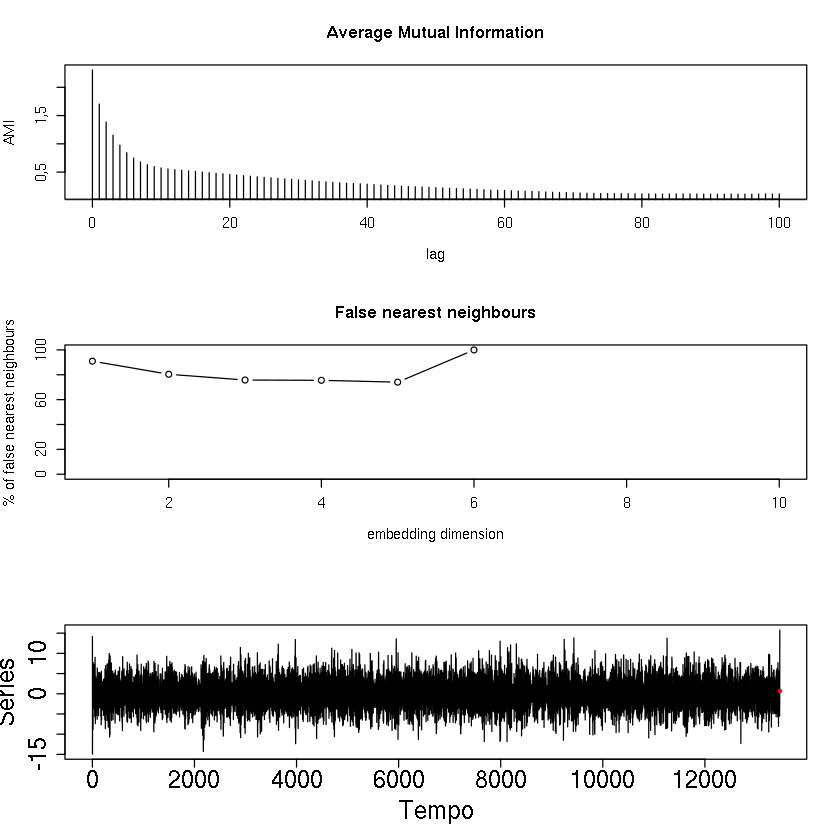

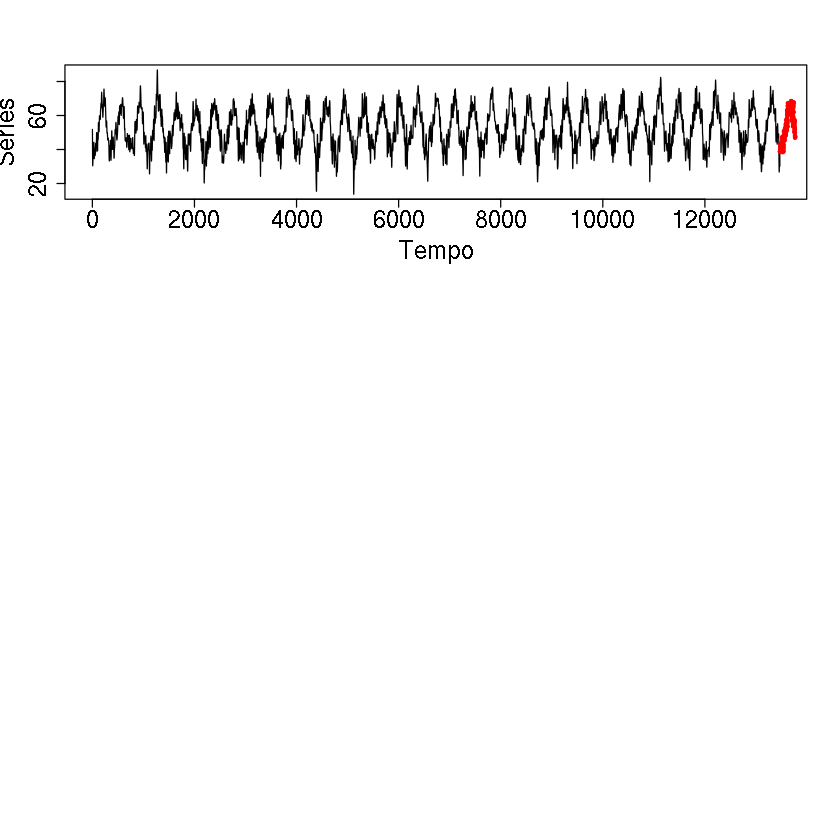

In [63]:
x = noaa()


# Aula 07

Retomada dos algoritmos de IBL

In [1]:
knn <- function(query, k, X, Y) {
    E = apply(X, 1, function(row) { sqrt(sum((row - query)^2)) })
    row.ids = sort.list(E, dec=F)[1:k]
    classes = unique(Y)
    count = rep(0, length(classes))
    
    i = 1
    for (class in classes) {
        count[i] = sum(class == Y[row.ids])
        i = i+1
    }
    
    ret = list()
    ret$classes = classes
    ret$count = count
    ret$max.prob.class = classes[which.max(count)]
    return (ret)
}

In [2]:
dwnn <- function(query, X, Y, sigma) {
    E = apply(X, 1, function(row) { sqrt(sum((row - query)^2)) })
    weight = exp(-E^2 / (2*sigma^2))
    return (weight %*% Y / sum(weight))
}

In [3]:
seno <- function(sigma=0.5, mi.epsilon=0.05) {
    tempo = seq(0, 5, length=1000)
    valores = sin(2*pi*tempo) + rnorm(mean=0, sd=0.15, n=1000)
    
    # Decomposição: Applyind Empirical Mode Decomposition and mutual information
    # to separate stochastic and deterministic influences embedded in signals
    require(EMD)
    decomposicao = emd(valores) 
    
    # decomposicao agora passa a carregar outras senóides que compõe a senóide principal
    par(mfrow=c(3, ceiling((decomposicao$nimf + 2) / 3)))
    plot(valores, pch=20, cex=.8, main='Série original', cex.axis=2, cex.main=2)
    for (i in 1:decomposicao$nimf) {
        plot(decomposicao$imf[,i], pch=20, cex=.8, main=paste("IMF", i), cex.axis=2, cex.main=2)
    }
    plot(decomposicao$residue, pch=20, cex=.8, main='Residuo', cex.axis=2, cex.main=2)
    
    par(mfrow=c(3, ceiling((decomposicao$nimf + 2) / 3)))
    plot(valores, pch=20, cex=.8, main='Série original', cex.axis=2, cex.main=2)
    for (i in 1:decomposicao$nimf) {
        coeff = fft(decomposicao$imf[,i])
        plot(coeff, asp=1, pch=20, cex=.8, main=paste("IMF", i), cex.axis=2, cex.main=2)
    }
    coeff = fft(decomposicao$residue)
    plot(coeff, asp=1, pch=20, cex=.8, main='Residuo', cex.axis=2, cex.main=2)
    
    
    phases.vector = list()
    par(mfrow=c(3, ceiling((decomposicao$nimf + 2) / 3)))
    plot(valores, pch=20, cex=.8, main='Série original', cex.axis=2, cex.main=2)
    for (i in 1:decomposicao$nimf) {
        coeff = fft(decomposicao$imf[,i])
        phases = atan(Im(coeff) / Re(coeff))
        plot(phases, pch=20, cex=.8, main=paste("IMF", i), cex.axis=2, cex.main=2)
        phases.vector[[i]] = phases
    }
    coeff = fft(decomposicao$residue)
    phases = atan(Im(coeff) / Re(coeff))
    plot(phases, pch=20, cex=.8, main='Residuo', cex.axis=2, cex.main=2)
    phases.vector[[i+1]] = phases
    
    # A congruência está relacionada com o casamento dos angulos dos vetores que compoe o espaço 
    # complexo de fourier, o que mostra que as senóides começam a ter comportamento mais suave de transição
    
    require(c3net)
    mutual.information = rep(0, length(phases.vector)-1)
    for (i in 1:(length(phases.vector)-1)) {
        mutual.information[i] = makemim(rbind(phases.vector[[i]], phases.vector[[i+1]]))[1,2]
    }
    
    # Makemim Compara as fases de cada decomposicao das imf. Se as fases contiverem grande quantidade 
    # de informação mútua, significa que começamos a ter congruência de fase, e começam a ter comportamento
    # mais determinístico
    # Ou também, qual o momento que as Intrinsic Mode Functions começam a ter similaridades relevantes entre si
    
    par(mfrow=c(1,1))
    plot(mutual.information, cex=.8, cex.axis=2, cex.main=1, main='Mutual Information', pch=20)
    det.start = which(mutual.information > mi.epsilon)[1]
    
    # Componente estocástico
    stochastic = rowSums(decomposicao$imf[,1:(det.start-1)]) # Soma apenas das IMF mais estocásticas
    
    #Componente determinístico
    deterministic = rowSums(decomposicao$imf[,det.start:decomposicao$nimf]) + decomposicao$residue
    
    par(mfrow=c(3,1))
    plot(valores, pch=20, cex=.8, cex.axis=3, main='Serie temporal original')
    plot(stochastic, pch=20, cex=.8, cex.axis=3, main='Stochastic')
    plot(deterministic, pch=20, cex=.8, cex.axis=3, main='Deterministic')
    
    ret = list()
    ret$series = valores
    ret$stochastic = stochastic
    ret$deterministic = deterministic
    
    return(ret)
}

Loading required package: EMD
Loading required package: fields
Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.5-1 (2019-12-12) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 
Loading required package: locfit
locfit 1.5-9.4 	 2020-03-24


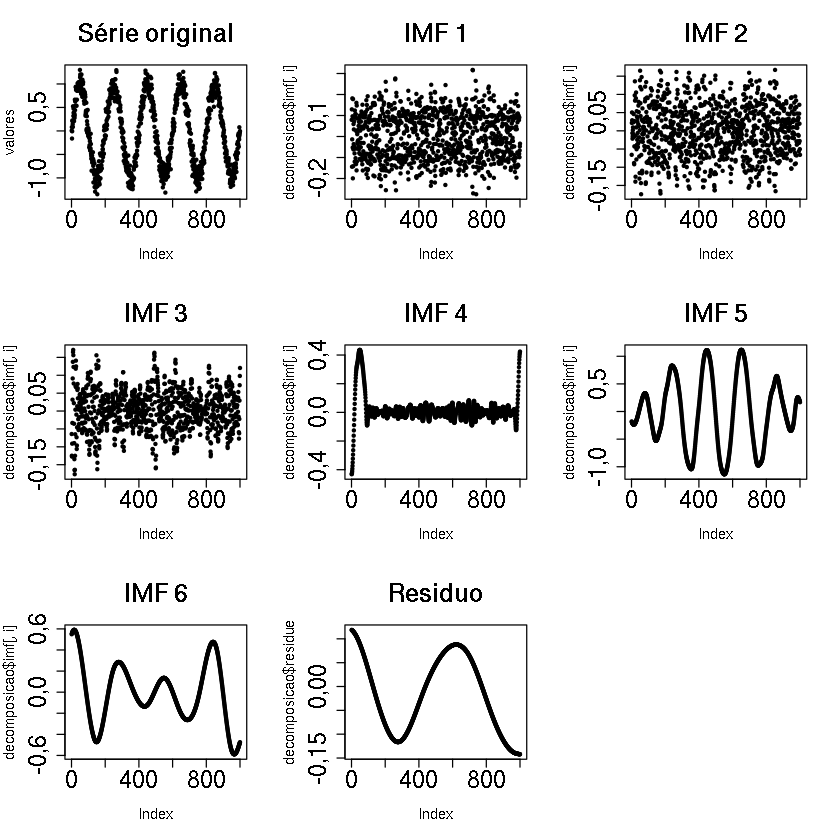

Loading required package: c3net
Loading required package: igraph

Attaching package: ‘igraph’

The following object is masked _by_ ‘.GlobalEnv’:

    knn

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



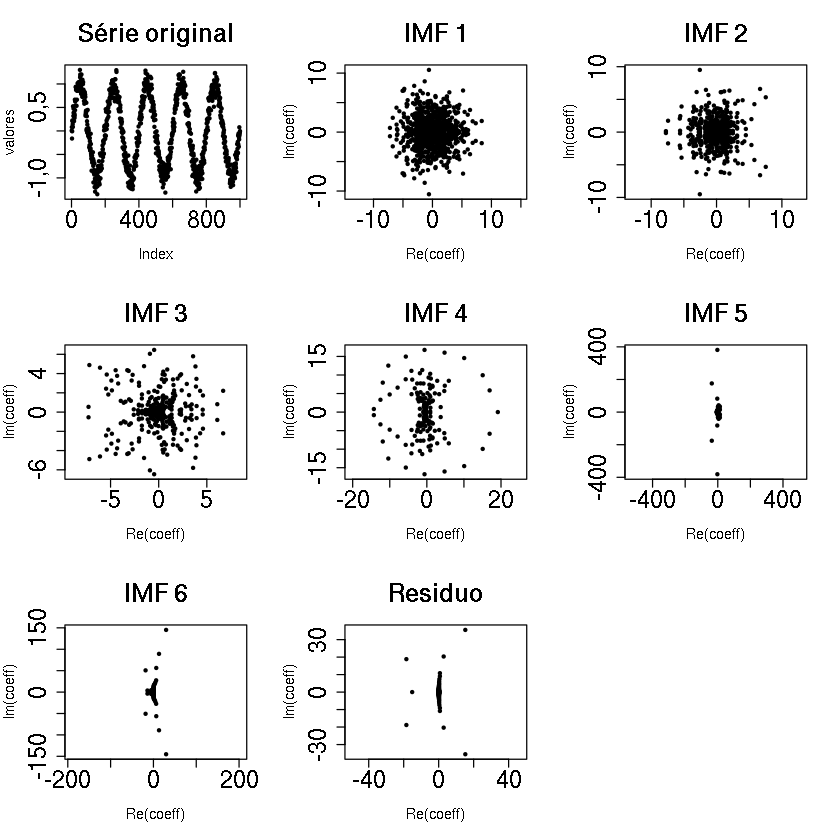

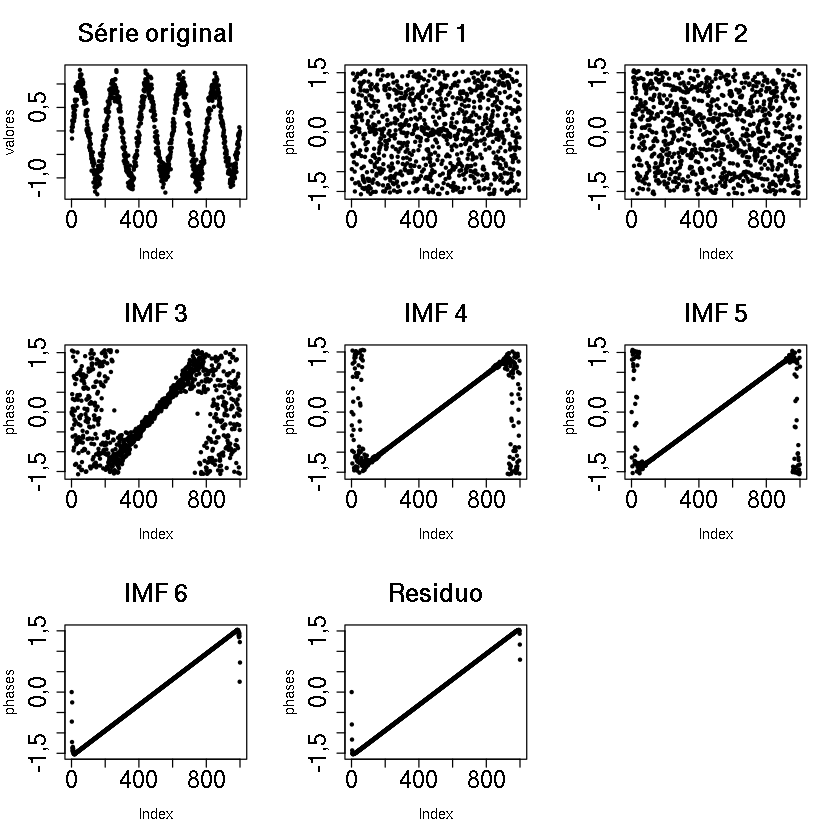

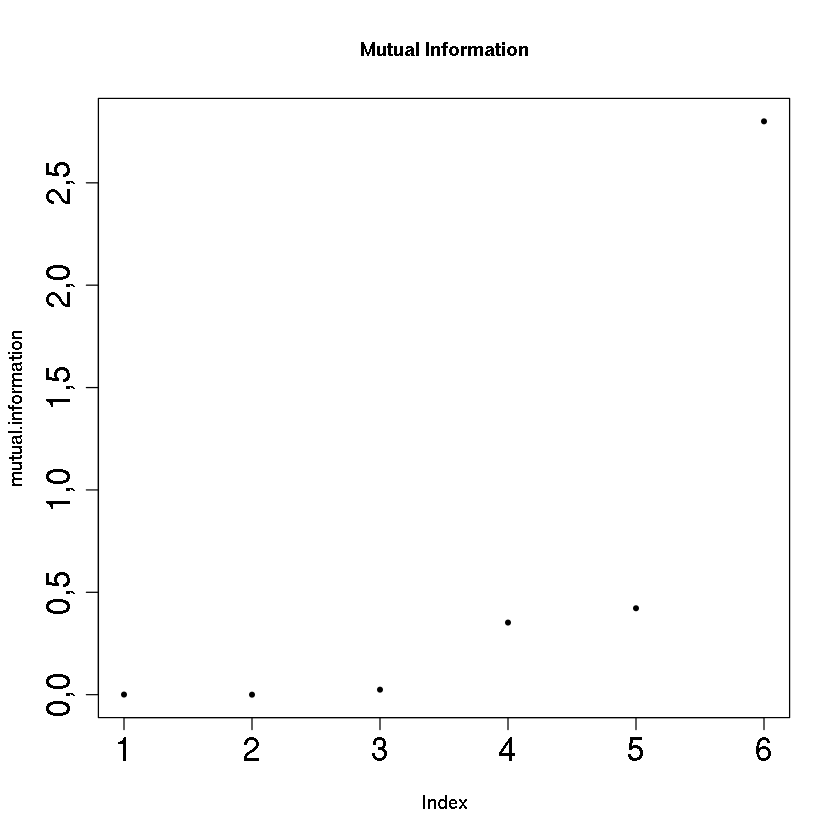

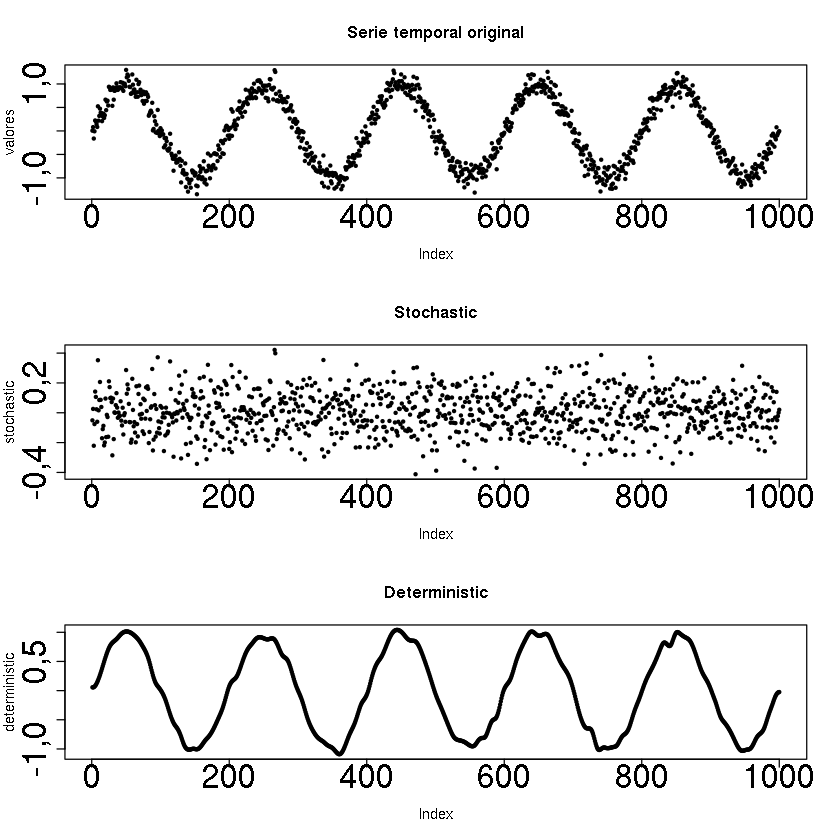

In [4]:
result = seno()

Problema: Como modelar o cenário estocástico

Ferramentas: ACF (Auto-correlation Function), PACF(Partial Auto-Correlation Function)

(com a letra $a$, AUTO REGRESSIVE AR - dependência com o passado), e um número de componentes estocásticas (com a letra $b$, MOVEL AVERAGE - processos estocásticos). Tomando a definição do manual da função 'arima' (I - INTEGRATES, um nível de dependência temporal entre as duas variáveis) inata de R:

$$
X[t] = a[1]X[t-1] + \ldots + a[p]X[t-p] + e[t] + b[1]e[t-1] + \ldots + b[q]e[t-q]
$$


$p$: ordem do modelo auto-regressivo (AR)

$e$: erros associados a cada instante de tempo no passado

$q$: ordem do modelo de média móvel (MA)

O modelo ARIMA utiliza do modelo ARMA, mas realiza antes, uma decomposição da série temporal por meio de uma análise de estacionariedade

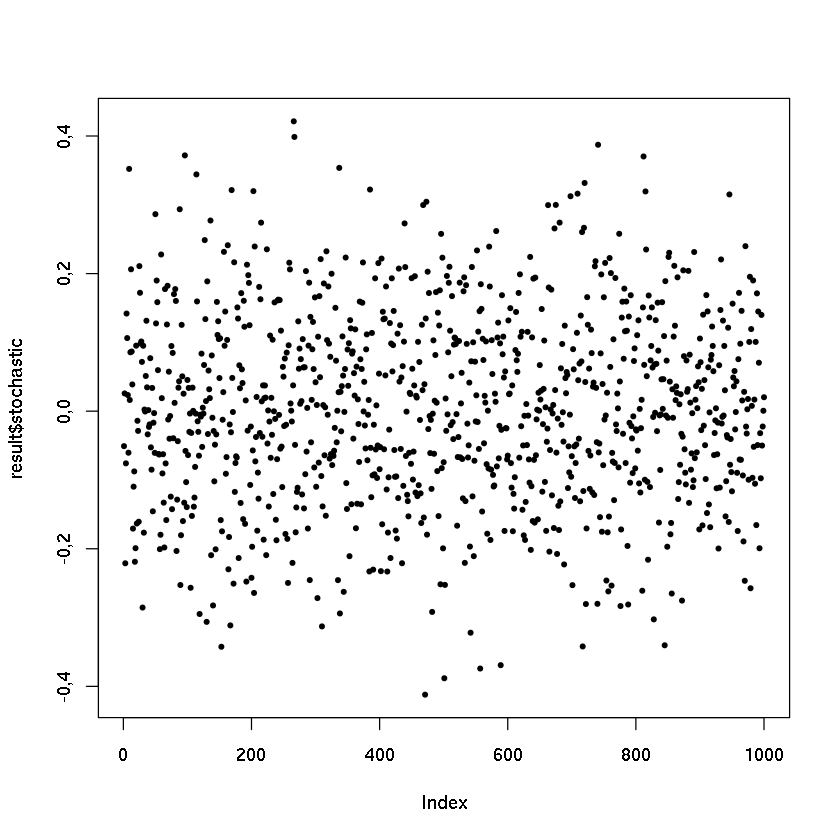

In [5]:
plot(result$stochastic, pch=20, cex=.8)

Este resultado (componente estocástico) é do tipo ESTACIONÁRIO, já que não existe uma tendência de crescimento ou decrescimento. Ou também os momentos estatísticos permanecem estáveis ao longo do tempo

In [6]:
mean(result$stochastic[1:500])

[1] 0,002294505

In [7]:
mean(result$stochastic[500:1000])

[1] 0,004593732

In [8]:
sqrt(sum((mean(result$stochastic[1:500]) - mean(result$stochastic[501:1000]))^2))

[1] 0,002456829

^ Calcula a diferença absoluta (distância euclidiana). Conforme aproxima de zero, temos que o primeiro momento (média) é estável ao longo das observações

Agora compararemos os quartos da série

In [9]:
sqrt(sum((mean(result$stochastic[1:250]) - mean(result$stochastic[251:500]))^2))

[1] 0,007423228

In [10]:
sqrt(sum((mean(result$stochastic[251:500]) - mean(result$stochastic[501:750]))^2))

[1] 0,0008540233

In [11]:
sqrt(sum((mean(result$stochastic[500:750]) - mean(result$stochastic[751:1000]))^2))

[1] 0,0004853505

Todos são próximos a zero!!!!

In [20]:
install.packages("moments")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [37]:
estacionariedade <- function(series, threshold=250, order=1) {
    require(moments)
    
    
    # func: representa o momento a ser calculado (média, variância, curtose, skewness...)
    len = length(series)
    
    # A subtração das duas separações centraliza os momentos calculados. Por exemplo centraliza a média
    # e podemos comparar deacordo com a proximidade de zero
    div = sqrt((moment(series[1:floor(len/2)], order=order) - moment(series[(floor(len/2)+1):len], order=order))^2)
    
    if (len > threshold) {
        div = c(div, estacionariedade(series[1:floor(len/2)], order=order) + 
                estacionariedade(series[(floor(len/2)+1):len]), order=order)
    }
    return (div)
}

In [26]:
estacionariedade(result$stochastic)

order       order 
0,002456829 0,008224751 0,030324876 2,000000000 1,000000000

^ a média varia próximo a zero

In [27]:
estacionariedade(result$stochastic, order=2)

order        order 
0,0019193025 0,0009005507 0,0274138748 3,0000000000 2,0000000000

^ a variância também

In [28]:
estacionariedade(result$stochastic, order=3)

order        order 
0,0002335027 0,0010619315 0,0244547180 4,0000000000 3,0000000000

In [29]:
novo.estocastico = result$stochastic + seq(0, 2, length=1000)

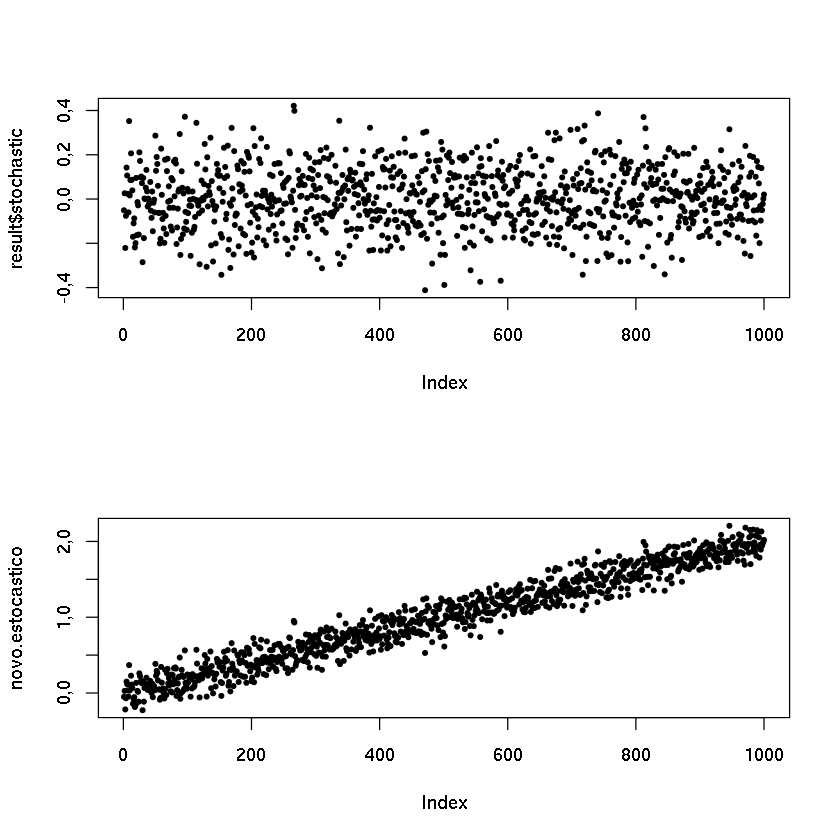

In [31]:
par(mfrow=c(2,1))
plot(result$stochastic, pch=20, cex=.8)
plot(novo.estocastico, pch=20, cex=.8)

O novo estocástico apresenta incremento ao longo do tempo, e portanto tem variação da média ao longo do tempo, e portanto não é mais estável

In [32]:
estacionariedade(novo.estocastico, order = 1)

order     order 
1,0034578 1,0076227 0,9839118 2,0000000 1,0000000

Agora a média já varia bastante da proximidado do zero, o que indica que o componente não é estacionário

In [33]:
estacionariedade(novo.estocastico, order = 2)

order     order 
2,0104093 1,0080120 0,8593877 3,0000000 2,0000000

In [35]:
estacionariedade(novo.estocastico, order = 3)

order     order 
3,5813616 0,9747161 0,7993032 4,0000000 3,0000000

In [36]:
estacionariedade(novo.estocastico, order = 4)

order     order 
6,2735327 0,9427464 0,7662674 5,0000000 4,0000000

Sistemas não estacionários possuem ordem de disparidade, ou nível. A estacionariedade teórica é nula, porém o nível 

#### Os momentos estatísticos:: correlações entre eixos de um espaço

Conforme aumentamos o momento, podemos avaliar perturbações em um dado sistema ao longo do tempo por conta de que: caso o momento seja menor que 1, o aumento da ordem tende a reduzir seu valor. Caso contrário, o momento cresce

In [39]:
diff.primeira.ordem = diff(novo.estocastico)
estacionariedade(diff.primeira.ordem, order = 1)

order        order 
0,0002358191 0,0024441393 0,0040621167 2,0000000000 1,0000000000

In [40]:
diff.primeira.ordem = diff(novo.estocastico)
estacionariedade(diff.primeira.ordem, order = 2)

order       order 
0,003959165 0,005436826 0,015786589 3,000000000 2,000000000

Quando calculamos a diferença ponto a ponto do atual com o anterior, removemos a tendência. Com isso podemos fazer a modelagem utilizando ARMA, com modelagem linear

In [43]:
series = arima.sim(n=1000, list(ar=c(0.8897))) # com ar, temos dependência apenas com passado próximo
                                                #series[t] = a*series[t-1] + b

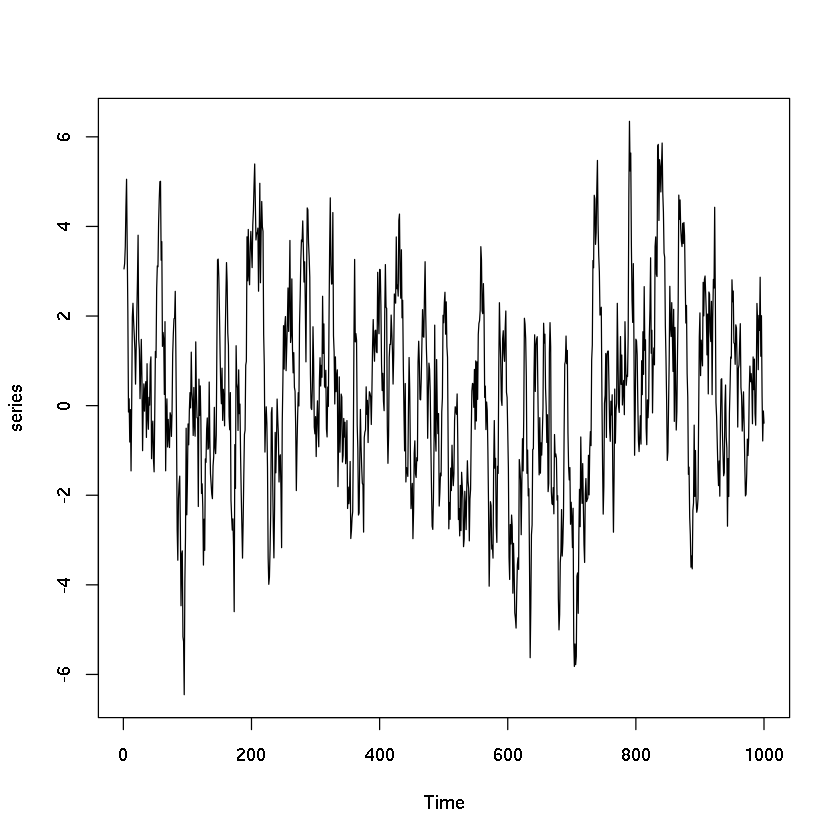

In [44]:
plot(series)

Com isso, esperamos que o espaço de fase entre $series[t]$ $vs$ $series[t-1]$ seja linear

Loading required package: tseriesChaos


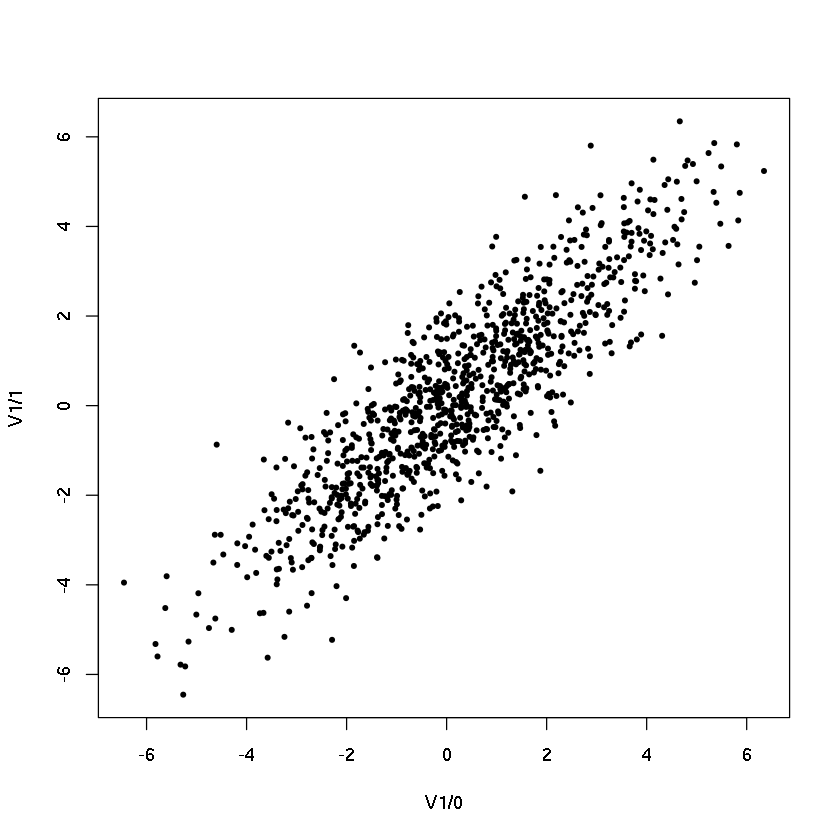

In [46]:
require(tseriesChaos)
plot(embedd(series, m=2, d=1), pch=20, cex=.8)

Que de fato, obtemos

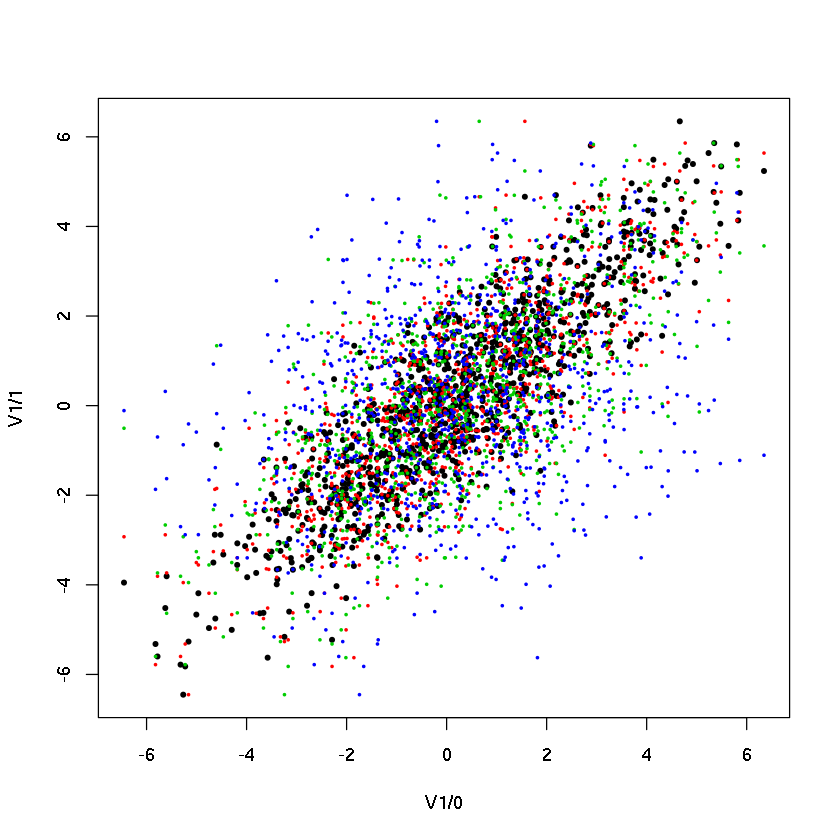

In [50]:
# A medida que aumentamos o lag com que plotamos, os pontos se dispersam devido ao acúmulo de erro
# Quando fizermos a projeção dos pontos sobre a regressão, para d=1 teremos menos erros

plot(embedd(series, m=2, d=1), pch=20, cex=.8)
points(embedd(series, m=2, d=2), pch=20, cex=.4, col=2)
points(embedd(series, m=2, d=3), pch=20, cex=.4, col=3)
points(embedd(series, m=2, d=8), pch=20, cex=.4, col=4)

In [54]:
require(stats)
dataset = embedd(series, m=2, d=1)
dataset = as.data.frame(embedd(series, m=2, d=1))

In [63]:
colnames(dataset) = c("Xt1", "Xt")
lm(formula=Xt~Xt1, data=dataset)


Call:
lm(formula = Xt ~ Xt1, data = dataset)

Coefficients:
(Intercept)          Xt1  
    0,02304      0,87505  


Xt1 sendo 0.875 representa o argumento com o qual construímos o modelo... o que faz sentido

In [67]:
series = arima.sim(n=1000, list(ar=c(0.8897, -0.25))) # Agora a dependência vai até a um lag com 2 passos
dataset = embedd(series, m=3, d=1)
dataset = as.data.frame(embedd(series, m=3, d=1))
colnames(dataset) = c("Xtm2", "Xtm1", "Xt")

In [68]:
lm(Xt ~., data=dataset)


Call:
lm(formula = Xt ~ ., data = dataset)

Coefficients:
(Intercept)         Xtm2         Xtm1  
   -0,00236     -0,27636      0,94591  


In [77]:
install.packages('sourcetools')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [84]:
series = arima.sim(n=1000, list(order=c(1,1,0), ar=0.7))
# a ordem do modelo será: c(1,1,0)  - a ordem do AR é 1
#                                   - a ordem da integração é 1
#                                   - a ordem do MA é 0

Criamos assim uma série temporal na forma

Como a integração vale 1, a série é não estacionária e depende de uma dependência de primeira ordem

$$
series[t] = 0.7 * series[t-1] + b
$$

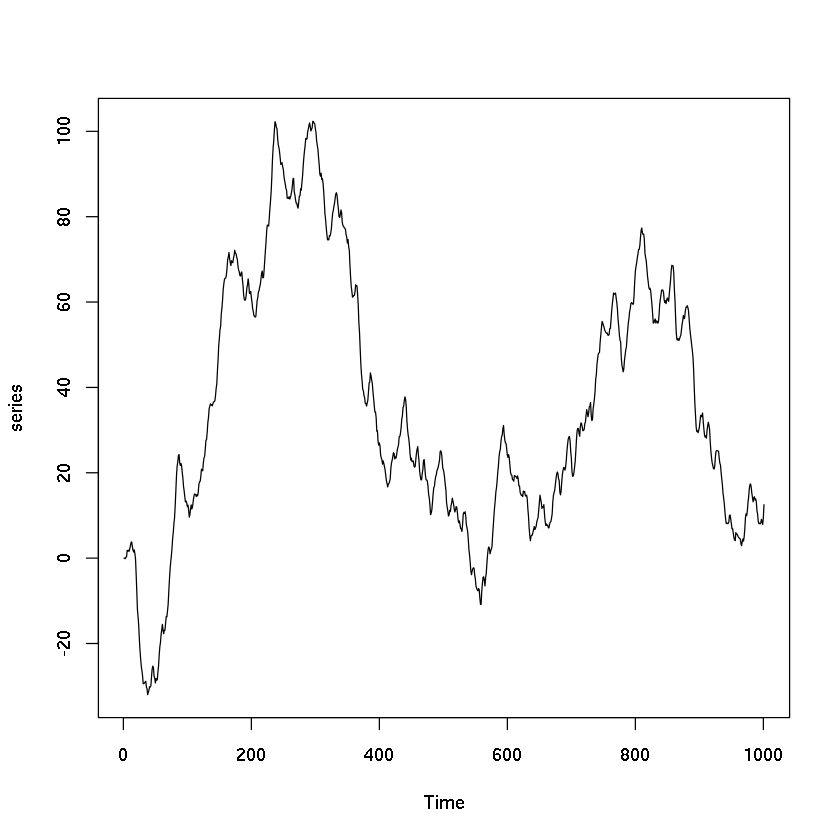

In [85]:
plot(series)

In [86]:
cat(estacionariedade(series, order=1))
cat(estacionariedade(series, order=2))
cat(estacionariedade(series, order=3))
cat(estacionariedade(series, order=4))

Warning message in estacionariedade(series[1:floor(len/2)], order = order) + estacionariedade(series[(floor(len/2) + :
“comprimento do objeto maior não é múltiplo do comprimento do objeto menor”

13,65117 46,49514 173,7563 39,98308 35,76502 124,5216 1

Warning message in estacionariedade(series[1:floor(len/2)], order = order) + estacionariedade(series[(floor(len/2) + :
“comprimento do objeto maior não é múltiplo do comprimento do objeto menor”

1796,571 1333,576 4307,387 40,98308 1322,846 4258,152 2

Warning message in estacionariedade(series[1:floor(len/2)], order = order) + estacionariedade(series[(floor(len/2) + :
“comprimento do objeto maior não é múltiplo do comprimento do objeto menor”

164894,8 133968,1 343827,5 41,98308 133957,3 343778,2 3

Warning message in estacionariedade(series[1:floor(len/2)], order = order) + estacionariedade(series[(floor(len/2) + :
“comprimento do objeto maior não é múltiplo do comprimento do objeto menor”

15526304 12273702 26494375 42,98308 12273691 26494325 4

A ordem é MUITO GRANDE. O que faz da serie não estacionária

In [87]:
diff.primeira.ordem = diff(series)

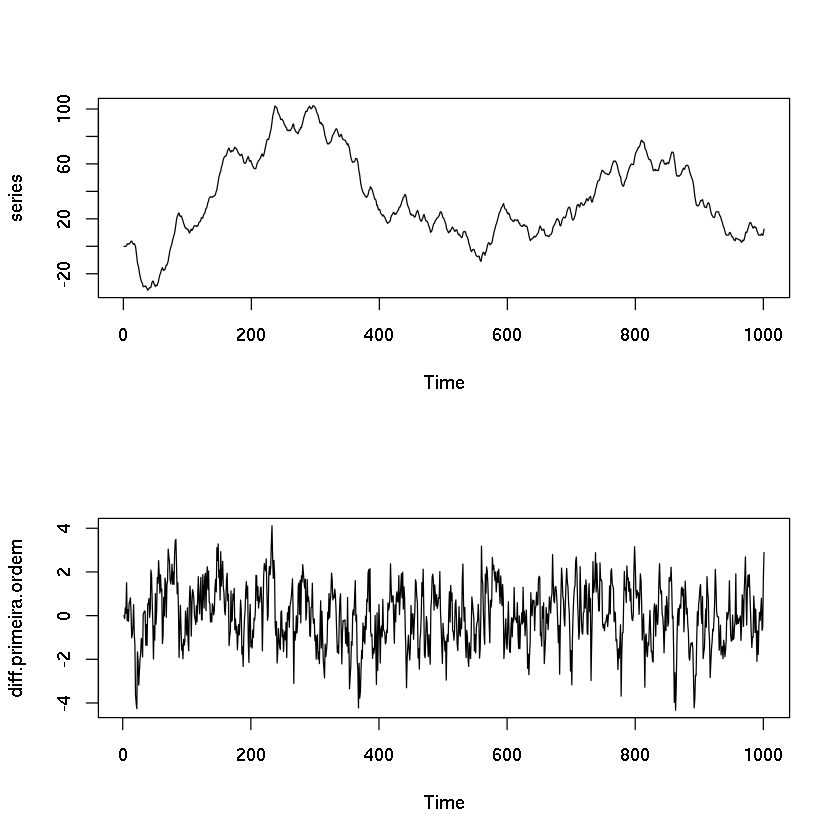

In [89]:
par(mfrow=c(2,1))
plot(series)
plot(diff.primeira.ordem)

In [93]:
print(estacionariedade(diff.primeira.ordem, order=1))
print(estacionariedade(diff.primeira.ordem, order=2))
print(estacionariedade(diff.primeira.ordem, order=3))
print(estacionariedade(diff.primeira.ordem, order=4))

                                      order      order 
0,05445441 0,93916845 1,31383582 2,00000000 1,00000000 
                                  order     order 
0,2341180 0,6426602 1,0715379 3,0000000 2,0000000 
                                  order     order 
0,3866191 3,9672903 4,2003091 4,0000000 3,0000000 
                              order    order 
2,152394 4,230471 4,533620 5,000000 4,000000 


Agora podemos modelar a série utilizando ARMA

In [105]:
test <- function() {
    series = arima.sim(list(order = c(1,2,0), ar=0.7), n = 1000)
    # Agora temos integração de ordem 2, o que faz necessário a diferença de segunda ordem
    
    cat("Calculando estacionariedades:")
    print(estacionariedade(series, order=1))
#     print(estacionariedade(series, order=2))
#     print(estacionariedade(series, order=3))
#     print(estacionariedade(series, order=4))
    
    diff.primeira.ordem = diff(series)
    cat("\nCalculando diferença de ordem 1:")
    print(estacionariedade(diff.primeira.ordem, order=1))
#     print(estacionariedade(diff.primeira.ordem, order=2))
#     print(estacionariedade(diff.primeira.ordem, order=3))
#     print(estacionariedade(diff.primeira.ordem, order=4))
    
    diff.segunda.ordem = diff(diff.primeira.ordem)
    cat("\nCalculando diferença de ordem 2:")
    print(estacionariedade(diff.segunda.ordem, order=1))
#     print(estacionariedade(diff.segunda.ordem, order=2))
#     print(estacionariedade(diff.segunda.ordem, order=3))
#     print(estacionariedade(diff.segunda.ordem, order=4))
    
    par(mfrow=c(3,1))
    plot(series)
    plot(diff.primeira.ordem)
    plot(diff.segunda.ordem)
    
    return(diff.segunda.ordem)
}

Calculando estacionariedades:                                       order    order    order 
33834,21 33727,99 37249,85 36819,91 14985,39     2,00     1,00 

Calculando diferença de ordem 1:

Warning message in estacionariedade(series[1:floor(len/2)], order = order) + estacionariedade(series[(floor(len/2) + :
“comprimento do objeto maior não é múltiplo do comprimento do objeto menor”

                                            order     order     order 
 75,44822  62,14999 124,79302  72,23898  55,22549  56,35425   1,00000 

Calculando diferença de ordem 2:                                      order      order 
0,07587959 0,48328504 1,69865719 2,00000000 1,00000000 


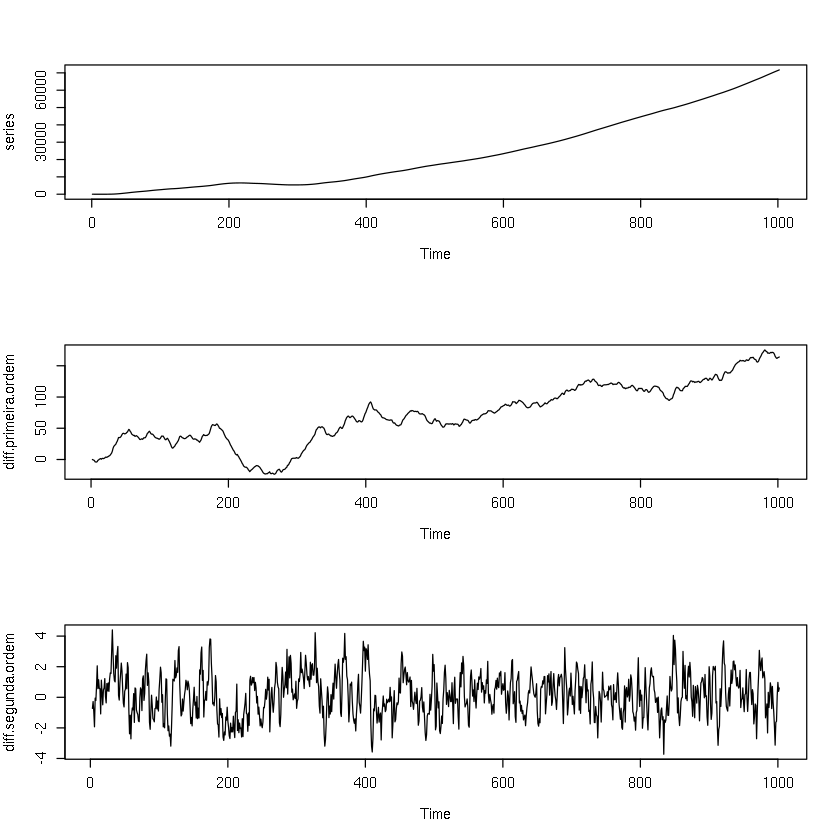

In [107]:
diff2 = test()

Com estas etapas, descobrimos quais as dependências que precisamos remover antes da modelagem

Agora podemos calcular PACF:

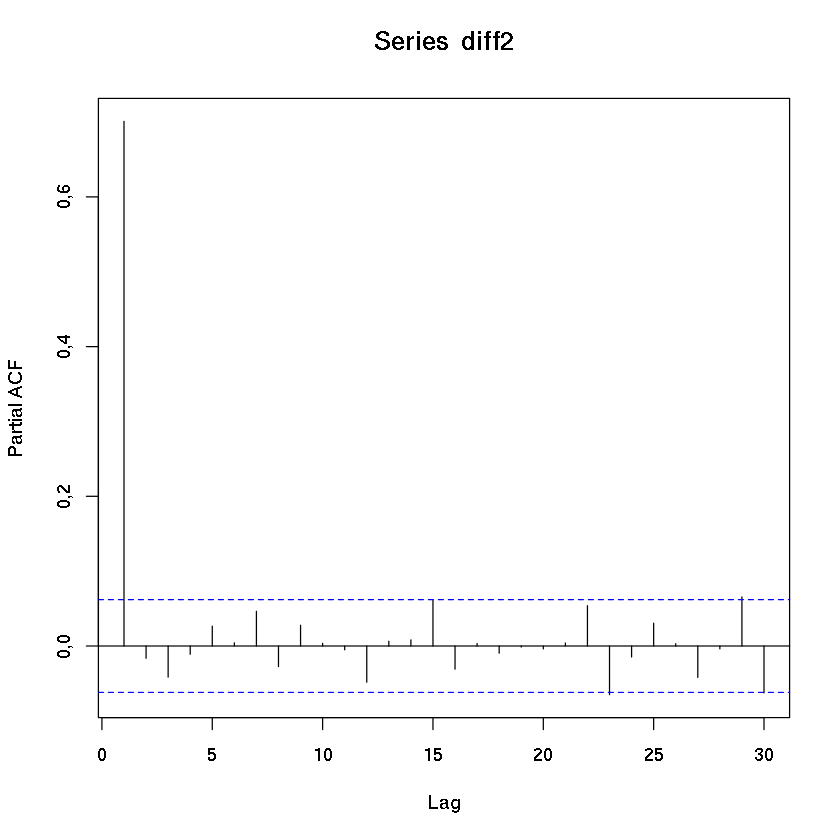

In [109]:
pacf(diff2)

Isso significa que $lag = 1$ atraso no passado é o lag que mais influencia no evento atual dos 30 primeiros componentes analisados

In [149]:
test <- function() {
    series = arima.sim(list(order = c(1,2,0), ar=0.7), n = 1000)
    # Agora temos integração de ordem 2, o que faz necessário a diferença de segunda ordem
    
#     cat("Calculando estacionariedades:")
#     print(estacionariedade(series, order=1))
#     print(estacionariedade(series, order=2))
#     print(estacionariedade(series, order=3))
#     print(estacionariedade(series, order=4))
    
    diff.primeira.ordem = diff(series)
#     cat("\nCalculando diferença de ordem 1:")
#     print(estacionariedade(diff.primeira.ordem, order=1))
#     print(estacionariedade(diff.primeira.ordem, order=2))
#     print(estacionariedade(diff.primeira.ordem, order=3))
#     print(estacionariedade(diff.primeira.ordem, order=4))
    
    diff.segunda.ordem = diff(diff.primeira.ordem)
#     cat("\nCalculando diferença de ordem 2:")
#     print(estacionariedade(diff.segunda.ordem, order=1))
#     print(estacionariedade(diff.segunda.ordem, order=2))
#     print(estacionariedade(diff.segunda.ordem, order=3))
#     print(estacionariedade(diff.segunda.ordem, order=4))
    
    par(mfrow=c(3,1))
    plot(series)
    plot(diff.primeira.ordem)
    plot(diff.segunda.ordem)
    
    #pacf(diff2, lag.max=100)
    
    return(diff.segunda.ordem)
}

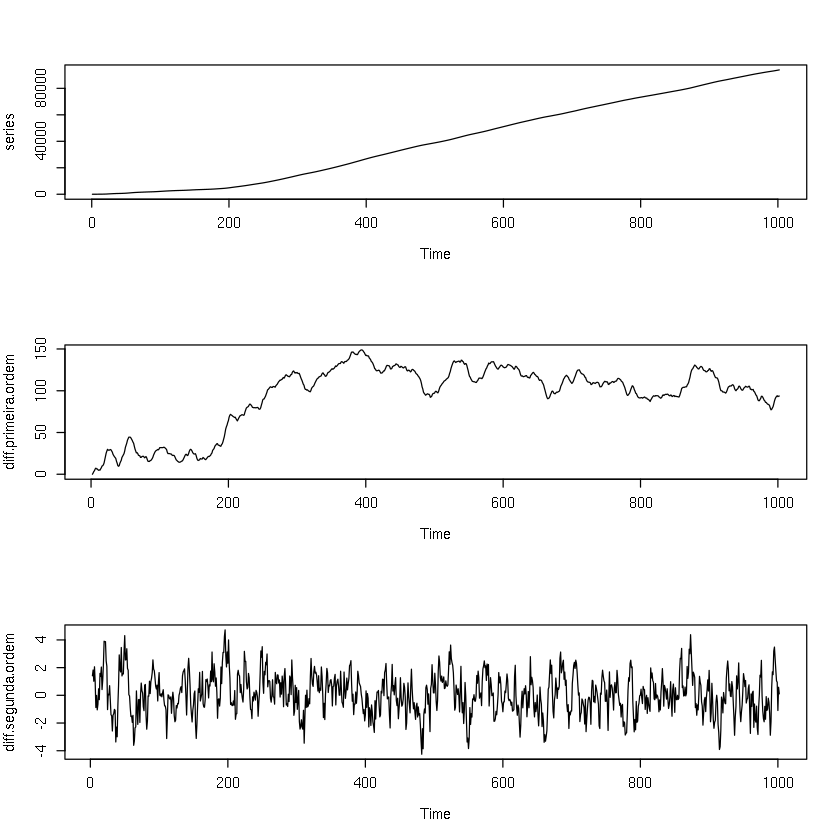

In [150]:
diff2 = test()

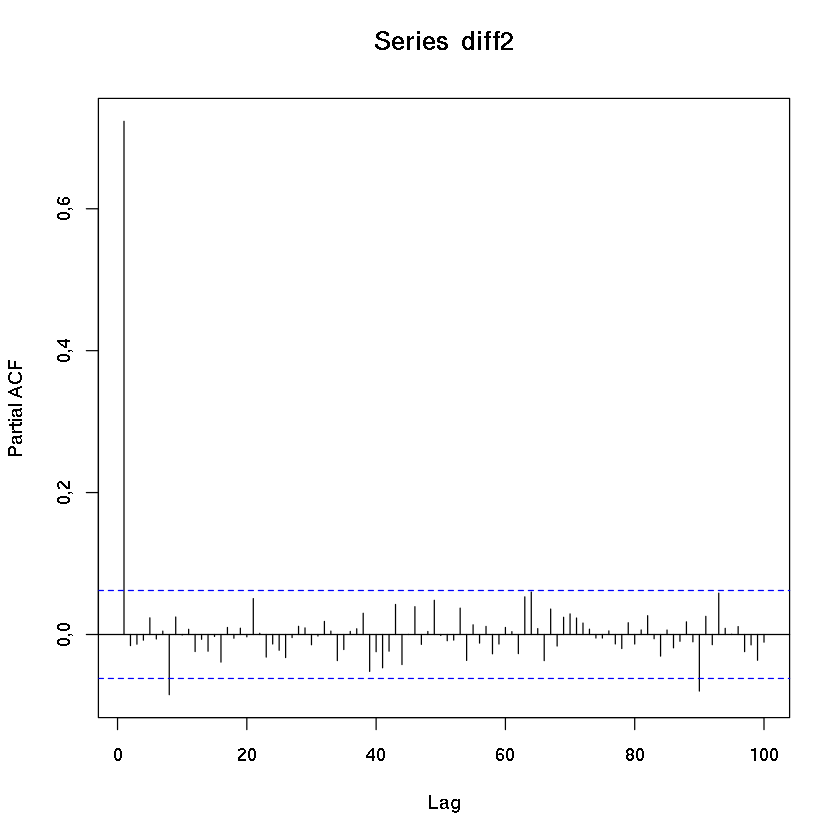

In [151]:
pacf(diff2, lag.max=100)

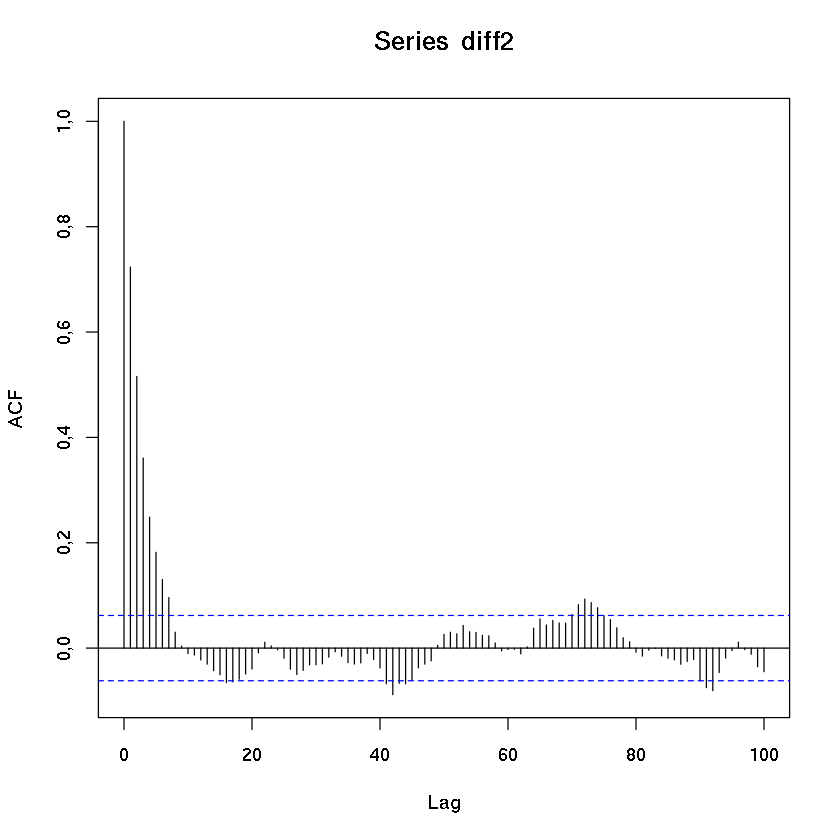

In [152]:
acf(diff2, lag.max=100)

A ACF mostra que o erro com $lag = 5$ anteriores, ou seja, a ordem de MA é $5$

No modelo simulado, impomos um lag zero. A ACF é um estimador e existe um erro associado à própria ACF

Precisamos então testar uma lista de modelos candidatos:
AR = 1; MA = 5
Logo:   

(1,2,0); (1,2,1); (1,2,2); (1,2,3); (1,2,4); (1,2,5)


(0,2,0); (0,2,1); (0,2,2); (0,2,3); (0,2,4); (0,2,5)

In [141]:
arima(series, order=c(1,2,0))


Call:
arima(x = series, order = c(1, 2, 0))

Coefficients:
          ar1
      -0,2126
s.e.   0,0309

sigma^2 estimated as 1,094:  log likelihood = -1462,59,  aic = 2929,18

Com estes parâmetros, o coeficiente encontrado pela função é de $-0.21$. Bem distante do esperado para $0.7$ (usado para construir o modelo)

In [142]:
arima(series, order=c(1,0,0))


Call:
arima(x = series, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0,9988    19,9205
s.e.  0,0010    21,7370

sigma^2 estimated as 1,877:  log likelihood = -1738,53,  aic = 3483,05

In [143]:
arima(series, order=c(1,1,0))


Call:
arima(x = series, order = c(1, 1, 0))

Coefficients:
         ar1
      0,6955
s.e.  0,0228

sigma^2 estimated as 0,9724:  log likelihood = -1405,25,  aic = 2814,51

In [144]:
arima(series, order=c(1,2,1))


Call:
arima(x = series, order = c(1, 2, 1))

Coefficients:
         ar1      ma1
      0,6971  -1,0000
s.e.  0,0228   0,0083

sigma^2 estimated as 0,9733:  log likelihood = -1406,6,  aic = 2819,19

In [145]:
arima(series, order=c(1,2,0))


Call:
arima(x = series, order = c(1, 2, 0))

Coefficients:
          ar1
      -0,2126
s.e.   0,0309

sigma^2 estimated as 1,094:  log likelihood = -1462,59,  aic = 2929,18

aic: Akaike information index

sigma^2: erro associado ao modelo que queremos

Iremos escolher (1,2,1)

In [157]:
series = arima.sim(list(order = c(1,2,0), ar=0.7), n = 1000)

In [158]:
model = arima(series, order=c(1,2,1))

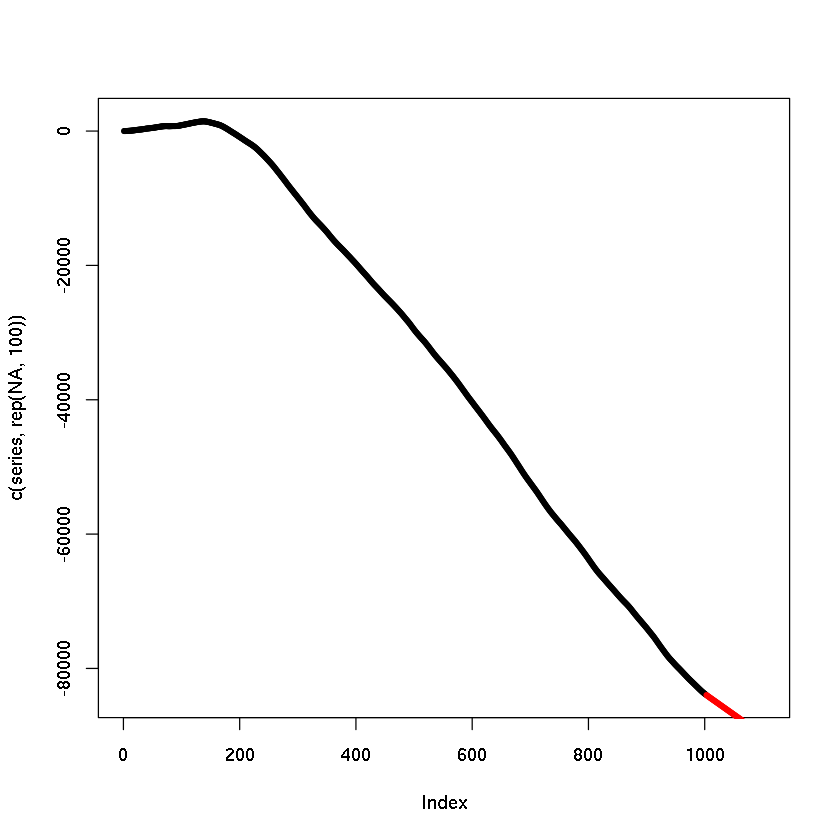

In [161]:
plot(c(series, rep(NA, 100)), pch=20, cex=.8)
points(c(rep(NA, length(series)), predict(model, n.ahead=100)$pred), col=2, pch=20, cex=.8)

In [181]:
test <- function() {
    series = arima.sim(list(order = c(1,2,0), ar=0.7), n = 1000)
    # Agora temos integração de ordem 2, o que faz necessário a diferença de segunda ordem
    
#     cat("Calculando estacionariedades:")
#     print(estacionariedade(series, order=1))
#     print(estacionariedade(series, order=2))
#     print(estacionariedade(series, order=3))
#     print(estacionariedade(series, order=4))
    
    diff.primeira.ordem = diff(series)
#     cat("\nCalculando diferença de ordem 1:")
#     print(estacionariedade(diff.primeira.ordem, order=1))
#     print(estacionariedade(diff.primeira.ordem, order=2))
#     print(estacionariedade(diff.primeira.ordem, order=3))
#     print(estacionariedade(diff.primeira.ordem, order=4))
    
    diff.segunda.ordem = diff(diff.primeira.ordem)
#     cat("\nCalculando diferença de ordem 2:")
#     print(estacionariedade(diff.segunda.ordem, order=1))
#     print(estacionariedade(diff.segunda.ordem, order=2))
#     print(estacionariedade(diff.segunda.ordem, order=3))
#     print(estacionariedade(diff.segunda.ordem, order=4))
    
    plot(series)
    plot(diff.primeira.ordem)
    plot(diff.segunda.ordem)
    
    model = list()
    
    
    model[[1]] = arima(x=series, order=c(0,2,0))
    model[[2]] = arima(x=series, order=c(0,2,1))
    model[[3]] = arima(x=series, order=c(0,2,2))
    model[[4]] = arima(x=series, order=c(0,2,3))
    model[[5]] = arima(x=series, order=c(0,2,4))
    model[[6]] = arima(x=series, order=c(0,2,5))
    
    model[[7]] = arima(x=series, order=c(1,2,0))
    model[[8]] = arima(x=series, order=c(1,2,1))
    model[[9]] = arima(x=series, order=c(1,2,2))
    model[[10]] = arima(x=series, order=c(1,2,3))
    model[[11]] = arima(x=series, order=c(1,2,4))
    model[[12]] = arima(x=series, order=c(1,2,5))
    
    model.id = -1
    akaike.information = Inf
    for (i in 1:length(model)) {
        if (model[[i]]$aic < akaike.information) {
            model.id = i
            akaike.information = model[[i]]$aic
        }
    }
    plot(pacf(diff.segunda.ordem, lag.max=100))
    plot(acf(diff.segunda.ordem, lag.max=100))
    
    cat("Selected model: ", model.id)
    selected.model = model[[model.id]]
    plot(c(series, rep(NA, 100)), pch=20, cex=.8)
    points(c(rep(NA, length(series)), predict(selected.model, n.ahead=100)$pred), col=2, pch=20, cex=.8)
    
    return(diff.segunda.ordem)
}

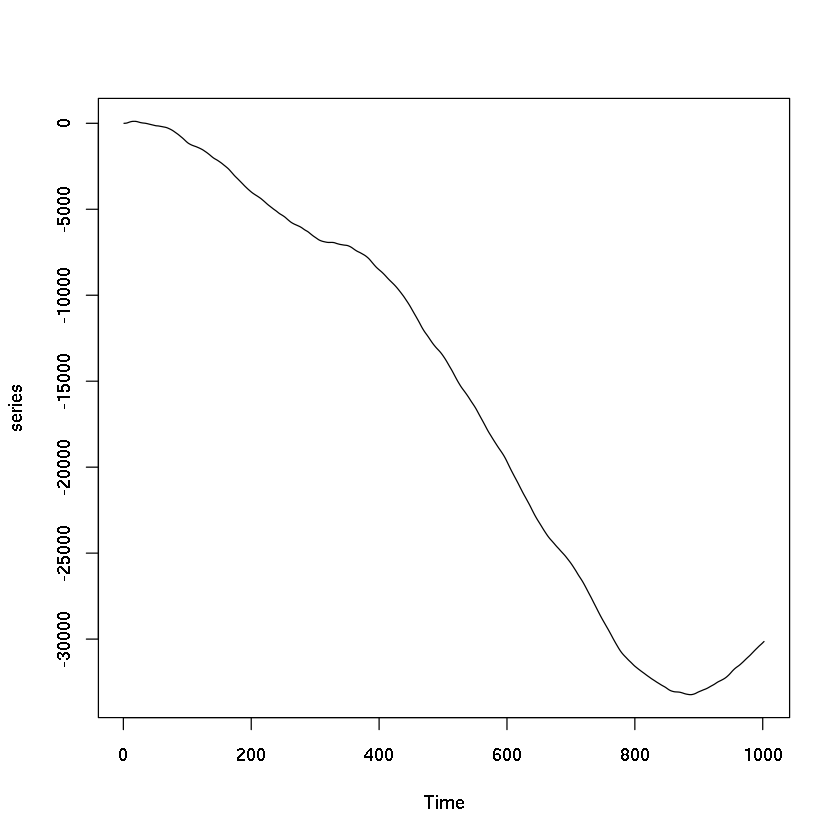

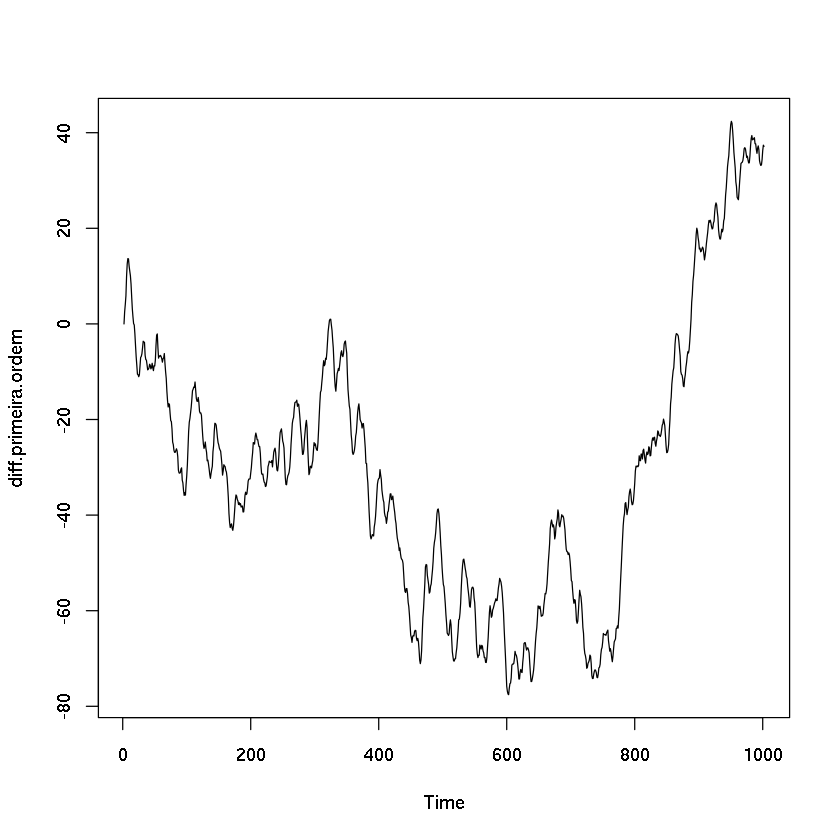

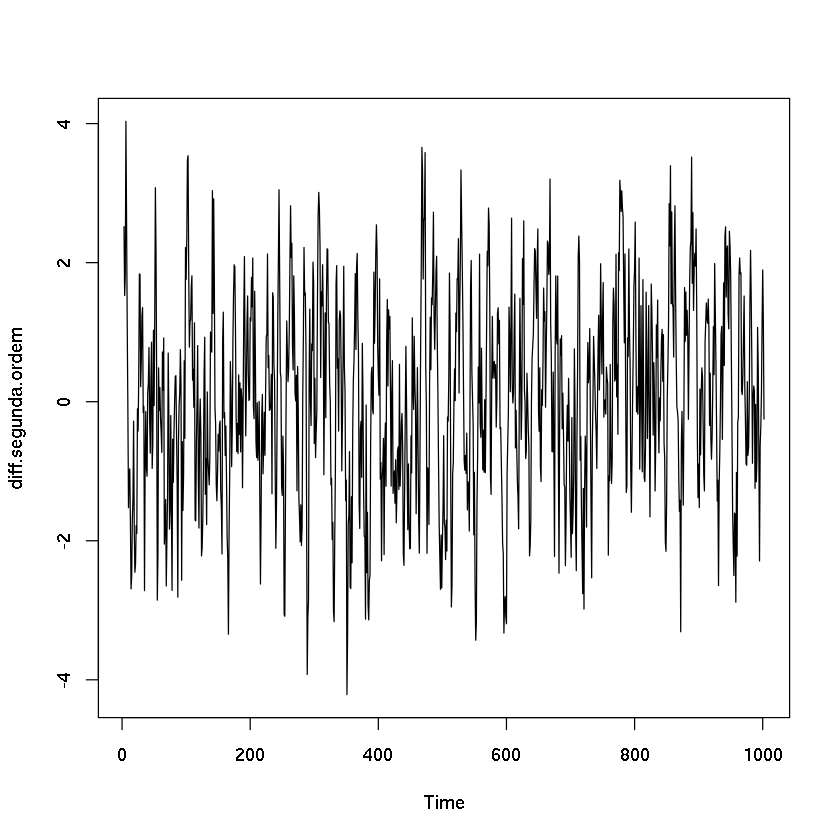

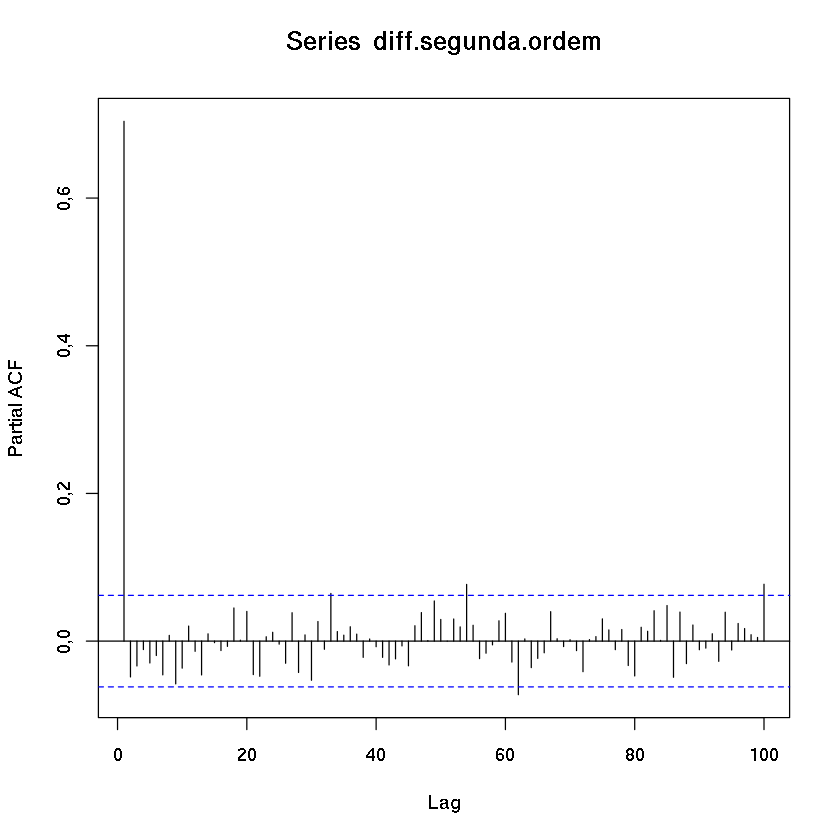

Selected model:  8

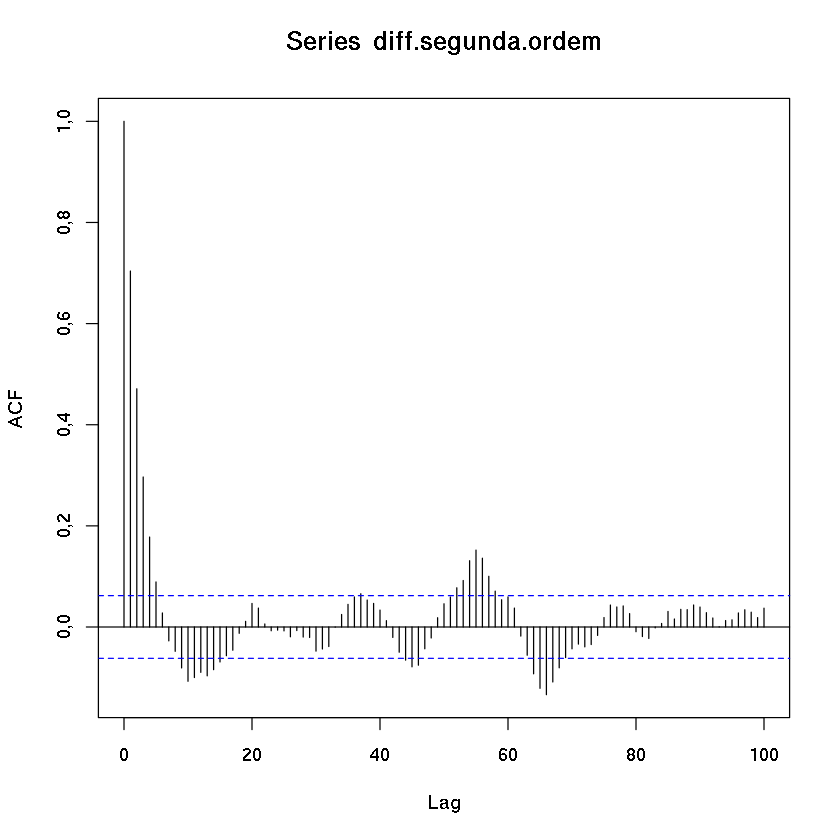

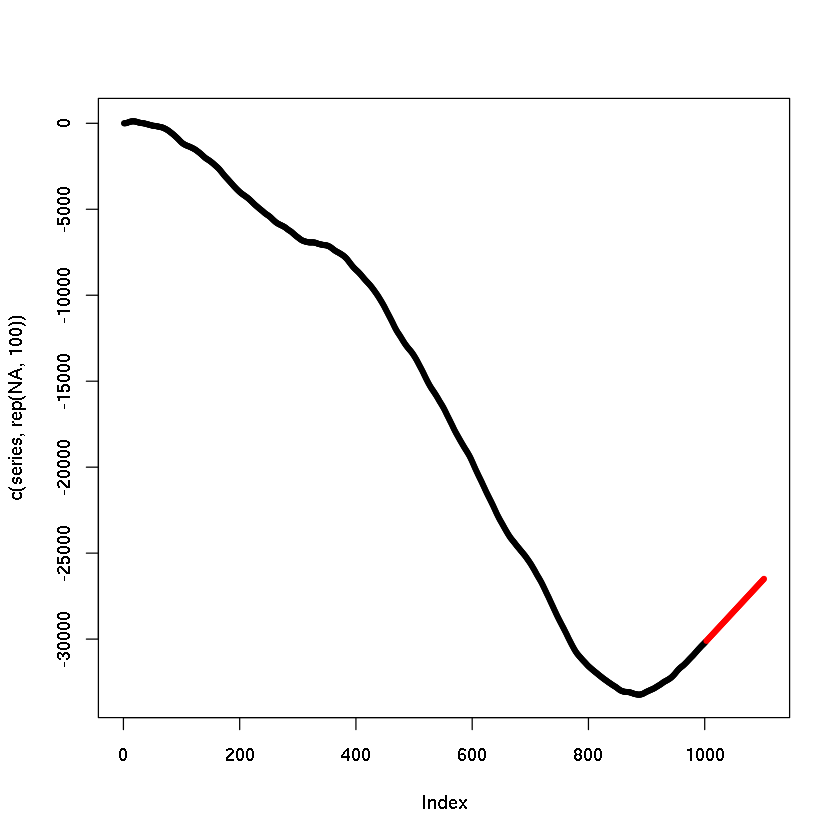

In [182]:
result = test()


# Aula 08

OVERVIEW

* Dado dataset: 

1. Pegar um dado atributo
    1. Analisar dependência temporal do atributo (ACF)
    2. Caso dependente: Decomposição (EMD)
        1. Componente Determinístico: Modelo de sistemas dinâmicos
            1. AMI (Time lag)
            2. FNN (embedding)
            3. Takens' embedding theorem (traz independência aos atributos)
            4. Algoritmo de regressão (Reg. logística,  DWNN, Support Vector regression, multilayer perceptron, RBF)
            
        
        2. Componente Estocástico: Modelo de processos estocásticos
            1. Análise de estacionariedade 
            2. PACF (para modelo AR - Auto-regressive)
            3. ACF (para modelo de MA - Movel Average) (Reconstrução de espaço, que traz independência)
            4. ARIMA (Fitting ou modelagem)
            
    
    3. Caso independente (só é independente se ): 
        1. Aprendizado de máquina: Statistical Learning Theory (só tem validade neste caso onde as variáveis são independentes)

In [4]:
dataset = read.table("Estudos/WineData/wine.data", sep=',')

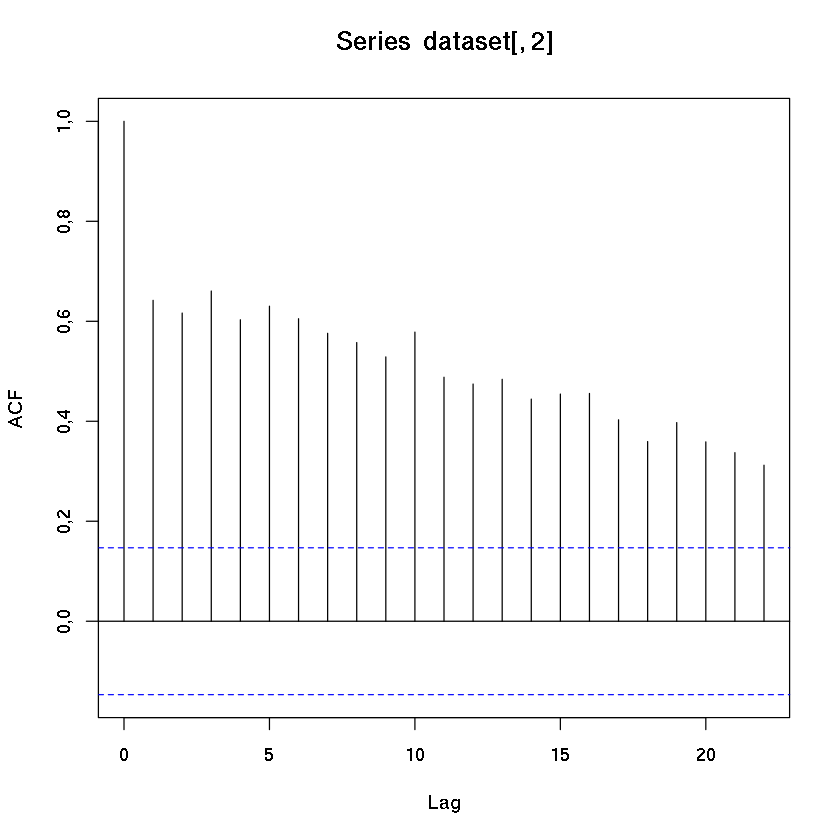

In [6]:
acf(dataset[,2])

De acordo com esta análise, a ACF mostra que temos dependência entre os valores de um único atributo do dataset wine, o que não é verdade

Como não existem muitos dados, a ACF não traz muita precisão. Logo, saber se é dependente usando ACF só deve ser feito caso tenhamos grande quantidade de observações no conjunto de dados

Caso não existam muitos dados, podemos fazer 

- segmentação: subconjunto treinamento/teste K vezes
- Avaliar a distribuiçãode acurácias
    - Caso tenham uma distribuição de acuráci em torno da média, temos valores independentes


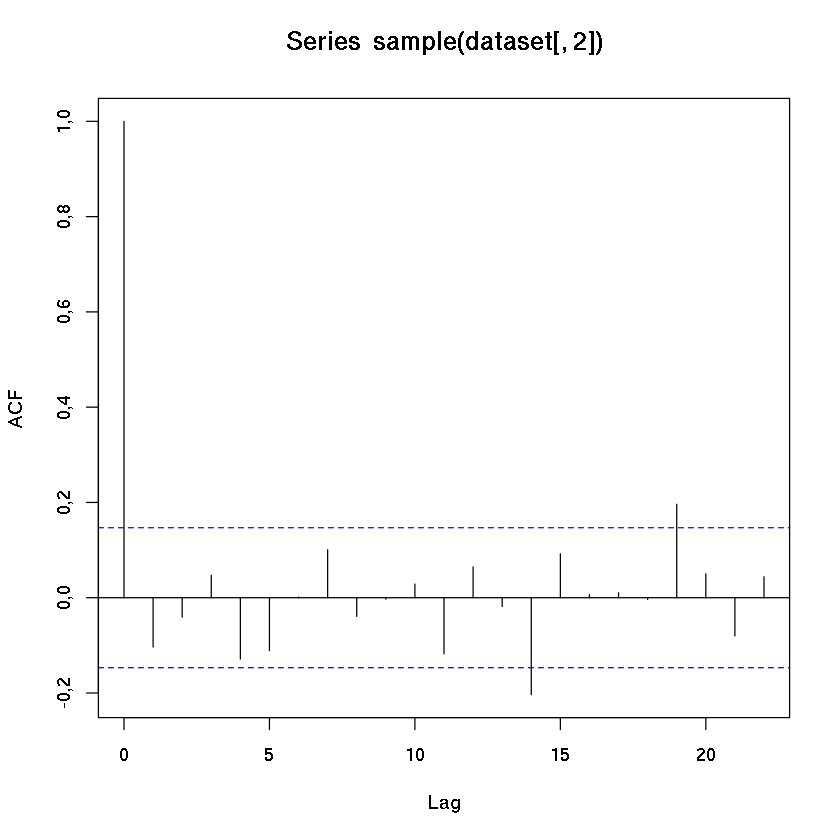

In [7]:
acf(sample(dataset[,2]))

Qualquer aleatorização quebra as dependências temporais.

In [51]:
dataset = read.table("Estudos/CovertypeData/covertype_csv.csv", sep=',')

In [11]:
print(dataset[1,])

         V1     V2    V3                               V4
1 Elevation Aspect Slope Horizontal_Distance_To_Hydrology
                              V5                              V6            V7
1 Vertical_Distance_To_Hydrology Horizontal_Distance_To_Roadways Hillshade_9am
              V8            V9                                V10
1 Hillshade_Noon Hillshade_3pm Horizontal_Distance_To_Fire_Points
               V11              V12              V13              V14
1 Wilderness_Area1 Wilderness_Area2 Wilderness_Area3 Wilderness_Area4
         V15        V16        V17        V18        V19        V20        V21
1 Soil_Type1 Soil_Type2 Soil_Type3 Soil_Type4 Soil_Type5 Soil_Type6 Soil_Type7
         V22        V23         V24         V25         V26         V27
1 Soil_Type8 Soil_Type9 Soil_Type10 Soil_Type11 Soil_Type12 Soil_Type13
          V28         V29         V30         V31         V32         V33
1 Soil_Type14 Soil_Type15 Soil_Type16 Soil_Type17 Soil_Type18 Soil_Type19
    

Não existe correlação entre cada um dos valores

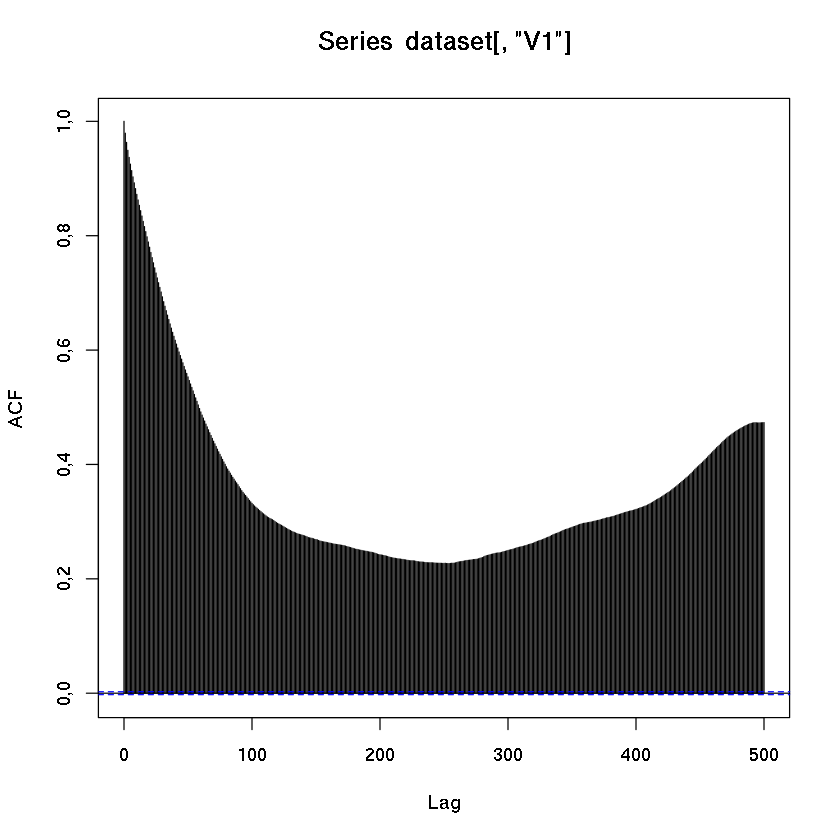

In [14]:
acf(dataset[,'V1'], lag.max=500)

Mesmo com muitos dados, existe uma dependência entre elas pela ACF, apesar de não existir. ISso ocorre porque a elevação foi ordenada

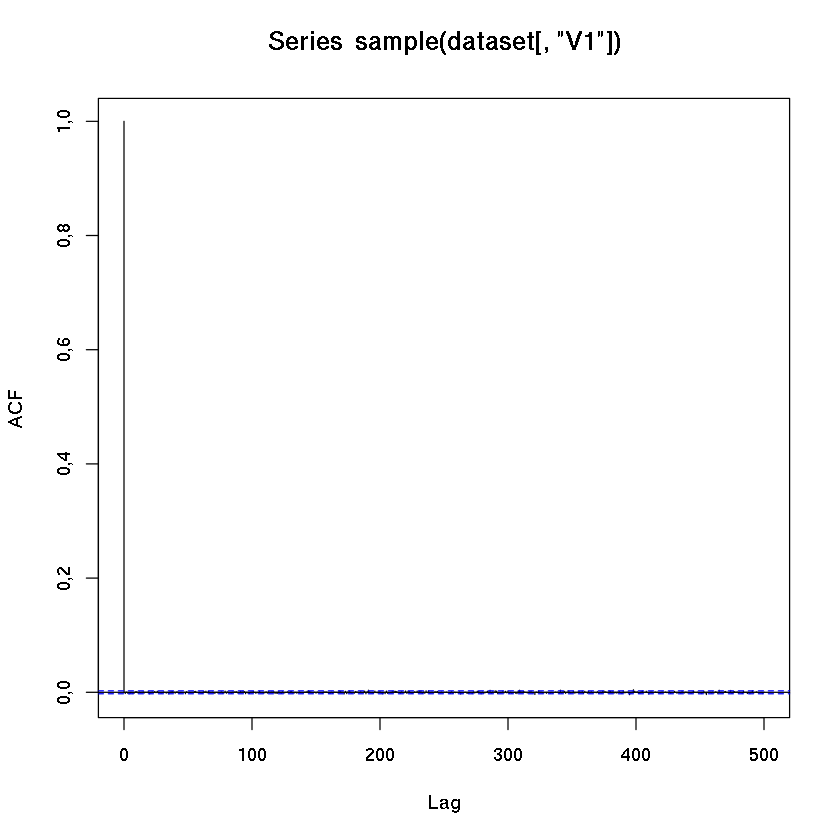

In [16]:
acf(sample(dataset[, 'V1']), lag.max=500)


Como antes, aleatorização quebra a dependência temporal

A Statistical Learning Theory é nossa garantia de que o aprendizado de máquina pode acontecer.
Temos então o *Modelo-f*

Construimos o modelo f usando uma subamostra do dataset. O **Poder de generalização** do nosso modelo é dado pela diferença de resultado do modelo-f com o conjunto de treino com 75% das amostras em relação ao resultado do modelo-f com o conjunto de teste com 25% das amostras

Quão mais próximo de zero, maior a generalização. Para que SLT garanta aprendizado:

1. Deve ser possível generalizar (R_emp1(f) - R_emp2(f) -> 0) -- R_emp: Erro da amostra empírica 1
2. O risco na amostra (1 - R__emp1) "complementar de R_emp1" de treinamento deve tender a zero conforme o tamanho

Logo, tanto o poder de generalização quanto os resultados do modelo-f devem tender a zero conforme a amostra aumente

E somente funciona SE E SOMENTE SE:
- Os exemplos forem independentes entre si
- ...

In [17]:
install.packages('randomForest')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [58]:
dwnn <- function(query, X, Y, sigma) {
    E = apply(X, 1, function(row) {sqrt(sum((row - query)^2)) })
    weight = exp(-E^2 / (2*sigma^2))
    
    return (weight %*% Y / sum(weight))
}

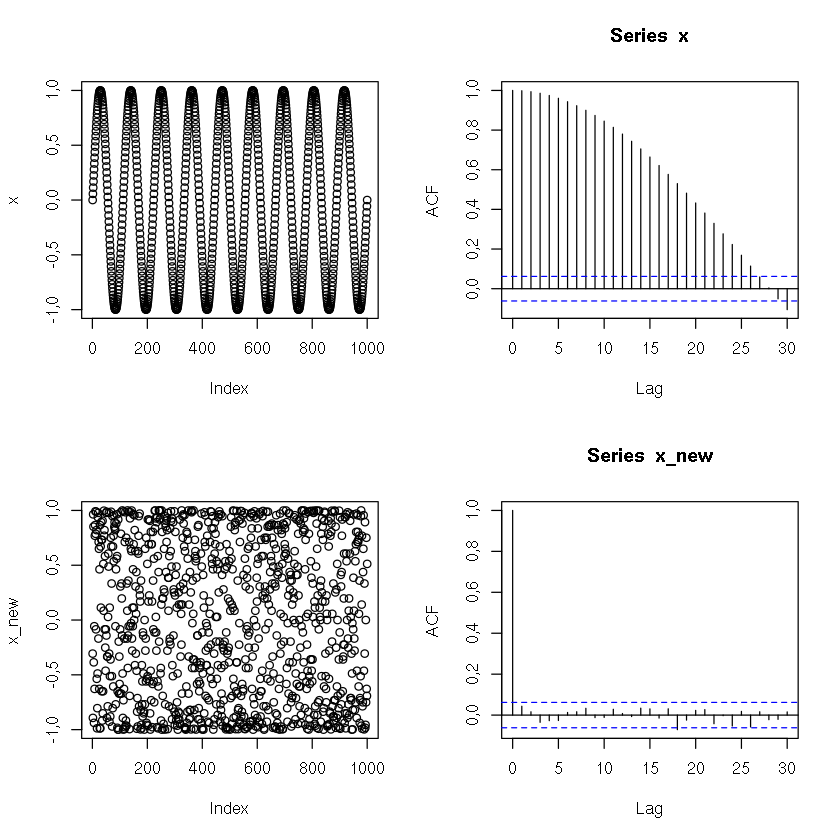

In [72]:
x = sin(2*pi*seq(0,9,len=1000))
x_new = sample(x)

par(mfrow=c(2,2))
plot(x)
acf(x)
plot(x_new)
acf(x_new)

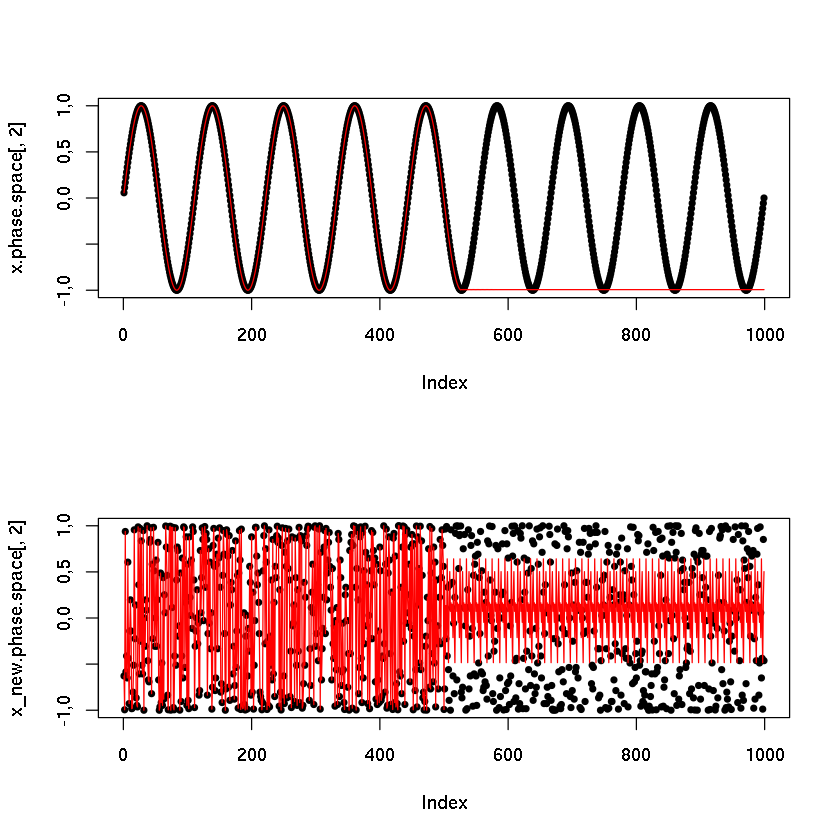

In [78]:
x = sin(2*pi*seq(0,9,len=1000))
x_new = sample(x)

x.phase.space = cbind(x[1:999], x[2:1000])
x_new.phase.space = cbind(x_new[1:999], x_new[2:1000])

x.buffer = x.phase.space[1:500,]
x_new.buffer = x_new.phase.space[1:500,]

sigma = 0.0015
# Modelagem e predição
for (i in (nrow(x.buffer) + 1):nrow(x.phase.space)) {
    x = x.buffer[i-1, 2:ncol(x.buffer)]
    y = dwnn(query=x, X=matrix(x.buffer[,1], ncol=1), Y=matrix(x.buffer[,2], ncol=1), sigma=sigma)
    
    x.buffer = rbind(x.buffer, c(x,y))
}

for (i in (nrow(x_new.buffer) + 1):nrow(x_new.phase.space)) {
    x = x_new.buffer[i-1, 2:ncol(x_new.buffer)]
    y = dwnn(query=x, X=matrix(x_new.buffer[,1], ncol=1), Y=matrix(x_new.buffer[,2], ncol=1), sigma=sigma)
    
    x_new.buffer = rbind(x_new.buffer, c(x,y))
}

par(mfrow=c(2,1))
plot(x.phase.space[,2], pch=20)
lines(x.buffer[,2], col=2, pch=20)

plot(x_new.phase.space[,2], pch=20)
lines(x_new.buffer[,2], col=2, pch=20)

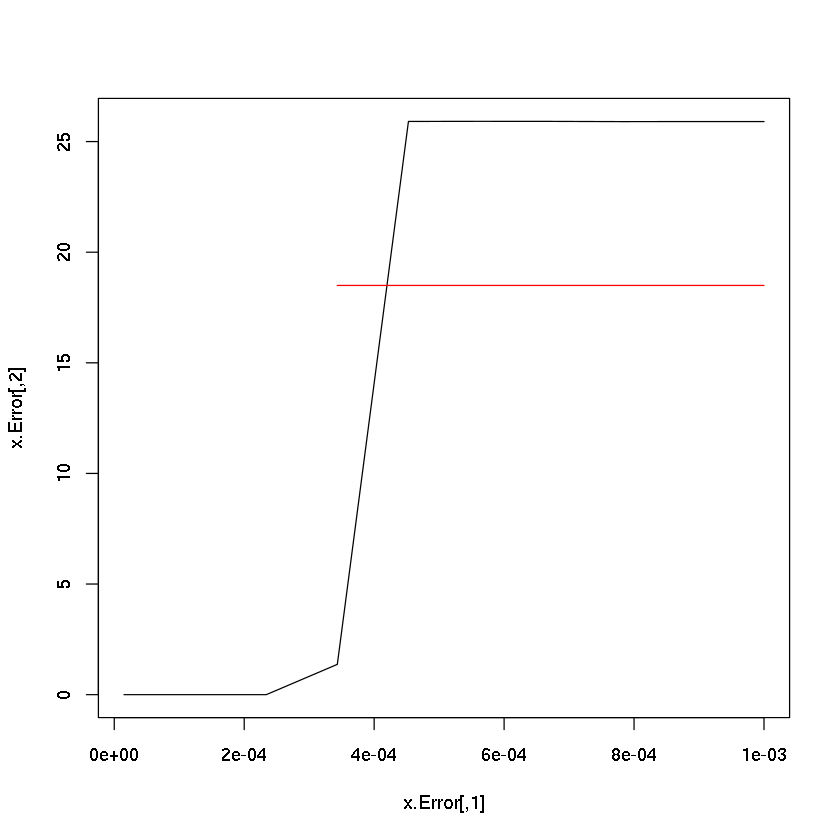

In [92]:
x = sin(2*pi*seq(0,9,len=1000))
x_new = sample(x)

x.phase.space = cbind(x[1:999], x[2:1000])
x_new.phase.space = cbind(x_new[1:999], x_new[2:1000])

x.buffer = x.phase.space[1:500,]
x_new.buffer = x_new.phase.space[1:500,]

x.Error = NULL
x_new.Error = NULL
for (sigma in seq(0.000015, 0.001, length=10)){
    x.buffer = x.phase.space[1:500,]
    x_new.buffer = x_new.phase.space[1:500,]
    
    # Modelagem e predição
    for (i in (nrow(x.buffer) + 1):nrow(x.phase.space)) {
        x = x.buffer[i-1, 2:ncol(x.buffer)]
        y = dwnn(query=x, X=matrix(x.buffer[,1], ncol=1), Y=matrix(x.buffer[,2], ncol=1), sigma=sigma)

        x.buffer = rbind(x.buffer, c(x,y))
    }
    
    Error = sqrt(sum((x.phase.space[501:nrow(x.phase.space),2] - x.buffer[501:nrow(x.phase.space),2])^2))
    x.Error = rbind(x.Error, c(sigma,Error))
    for (i in (nrow(x_new.buffer) + 1):nrow(x_new.phase.space)) {
        x = x_new.buffer[i-1, 2:ncol(x_new.buffer)]
        y = dwnn(query=x, X=matrix(x_new.buffer[,1], ncol=1), Y=matrix(x_new.buffer[,2], ncol=1), sigma=sigma)

        x_new.buffer = rbind(x_new.buffer, c(x,y))
    }
    
    Error = sqrt(sum((x_new.phase.space[501:nrow(x_new.phase.space),2] - x_new.buffer[501:nrow(x_new.phase.space),2])^2))
    x_new.Error = rbind(x_new.Error, c(sigma,Error))
}

par(mfrow=c(1,1))
x.ids = which(!is.nan(x.Error[,2]))
x_new.ids = which(!is.nan(x_new.Error[,2]))
plot(x.Error, ylim=range(c(x.Error[x.ids,2], x_new.Error[x_new.ids,2])), t='l')
lines(x_new.Error, col=2)


Para a faiza de valores de sigma bastante pequenos, o erro associado ao modelo com o espaço completo (senóide) é bastante baixo (próximo a zero, em preto). Já para o modelo com amostras aleatórias, o erro é sempre alto (vermelho)

Isso significa que a ACF apresentar dependencia temporal, usar DWNN somente não teremos aprendizado bom. Precisamos usar de Decomposição e análise determinística e estocástica

# Aula 10

In [2]:
install.packages("class")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


Para um aprendizado suprevisionado, para qualquer modelo f induzzido a partir de um conjunto de exemplos a fim de 
f: $X -> Y$

tal que x1, ..., xn $\in X$ é o espaço de entrada
e y1, ..., yn $\in Y$ é o espaço de saída

Como garantir o sucesso do aprendizado supervisionado??

Vapnik -> Teoria do aprendizado estatístico: **Conceito de Generalização** ajuda nas provas de aprendizado

[Remp(f) - R(f)] $\to 0$ se n $\to \infty$

Onde 

Remp(f) = (1/n) sum(i, 1, n, Loss(xi, yi, f(xi)))(Risco empírico, calculado sobre uma amostra apenas)

0-1 Loss:
    0-1 Loss(xi, yi, f(xi)) = 0, se f(xi) = yi; = 1, caso constrário
    
    R(f) = E(Loss(X, Y, f(X)) (Valor esperado de Loss), aplicado sobre todas as possíveis entradas 

Instanciação do conceito de generalização

Seja um professor responsável pelo ensono de tal assunto perante uma Classe

É responsabilidade do professor criar um conjunto de exemplos representativos para o problema em questão:

1. Esses exemplos correspondem à realidade ou são um subconjunto que não contempla todas as possíveis classes (classificação) ou espaços de saída (regressão)?
2. Motivar os alunos a procurar por materiais de viéses distintos (codificar, ler livros ou tutoriais com características distintas e diversas)

É responsabilidade de cada aluno:

1. Não decorar (overfitting) um material único. O overfitting é a representação perfeita de uma amostra única, então Remp(f) = 0. Nisso, R(f) = 0 apenas se o problema analisado é simplório. Caso um problema mais real/complexo, R(f) = max

Uma prova (instância):

1. $|Remp(f) - R(f)| \to 0$, se $n \to \infty$
2. Nota na prova (acurácia): 1 - ((1/n) sum(i, 1, n, 0-1 Loss(xi, yi, f(xi)))). Nota 0.9, Remp 0.1; Nota 0.7, Remp 0.3
3. Quando colocado em problemas do mundoreal, estes alunos com essas notas serão (Generalização de Vapnik): Mundo Real (Remp': indica que o mundo real não é um modelo generalista completo. Existem viéses). Remp' = 0.15; R'emp = 0.3
4. A generalização será |0.1 - 0.15| = 0.05; |0.3 - 0.3| = 0

O que é APRENDER para Vapnik?? (Convergências)

1. Generalização $|Remp(f) - R(f)| \to 0$, $n \to \infty$ (Precisamos ter uma prova com infinitos elementos para o aluno tenha um conhecimento generalizado)
2. $Remp(f) \to 0$, $n \to \infty$ (Precisamos ter um aprendizado, dentro da própria amostra, deve ser perfeita- overfitting

A generalização é apenas um critério de seleção de modelos (estimador)

$$
P(|Remp(f) - R(f)| > \epsilon) \leq 2 e^{-2n\epsilon^2}
$$

se $n \to \infty$, com $Remp(f) \in [0,1]$, $R(f) \in [0,1]$

Sendo f o viés (bias) do algoritmo de aprendizado utilizado

$$
P(sup_{f \in F} |Remp(f) - R(f)| > \epsilon) \leq 2 P(sup_{f \in F} |Remp(f) - Remp^*(f)| > \epsilon) \leq 2 m e^{-n\epsilon^2 / 4})
$$

Onde m: número de funções contida no viés do algoritmo (numero de funções que o algoritmo é capaz de representar)

**Hold-Out** ---> Amostra 1 para treino | Amostra 2 para teste

- Se $|Remp(Amostra1) - Remp(Amostra2)| \to 0$; então generalizamos
- Se $Remp(Amostra1) \to 0$ ou $Remp(Amostra2) \to 0$; então aprendemos

A1 (treino) | A2 (validação) | A3 (teste)

overfitting | subseleção | teste

**Subsampling** ---> A1 (n) reamostrados com reposição 68\% (treino) | A2 disjunto de A1 (teste)

Em A2 temos exemplos nunca vistos em treino

**K-fold Cross Validation** ---> K folds ($k \leq n$). Se $k = n$, temos **Leave one out**

fold 1 (1/n)
fold 2 (1/n)
fold 3 (1/n)
...
fold K (1/n)

Resto de folds (treino) | Fold $i$ (teste)

Algoritmo $A_i$:

1. Remp(fold1)(f), ... Remp(foldK)(f)
2. mean(Remp(fold1)(f), ... Remp(foldK)(f))
3. sd(Remp(fold1)(f), ... Remp(foldK)(f))

Escolher o algoritmo $A_i$ com menor mean e sd

Um outro algoritmo B:

sendo

$$
2 P(sup_{f \in F} |Remp(f) - Remp^*(f)| > \epsilon) \leq 2 m e^{-n\epsilon^2 / 4})
$$

Definimos $\delta = 2 m e^{-n\epsilon^2 / 4}$ tal que

$$
\epsilon = \sqrt{\frac{4}{n} log(2m) - log(\delta)}
$$

Quando erramos:
$$
sup_{f \in F} |Remp(f) - Remp'(f)| > \sqrt{\frac{4}{n} log(2m) - log(\delta)}
$$

Quando acertamos:
$$
sup_{f \in F} |Remp(f) - Remp'(f)| \leq \sqrt{\frac{4}{n} log(2m) - log(\delta)}
$$

Se calcularmos uma matriz de divergências absolutas entre todos os riscos empríricos, teremos uma distribuição de erros. Quando \epsilon se aproxima de zero, temos o K-fold cross validation

Como o conjunto iris tem 50 setosa, 50 versicolor, 50 virginica

com K=10, temos ~Leave one out (0.9 K fold)

In [5]:
install.packages("dismo")

also installing the dependencies ‘raster’, ‘sp’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [6]:
require(dismo)
folds.ids = kfold(as.numeric(iris[,5]), k=10)

Loading required package: dismo
Loading required package: raster
Loading required package: sp


In [7]:
print(folds.ids)

  [1]  7  9 10  7  1  4  5  3  1  8  8  5  5 10  6  5  6  7  6  2  8  9  3  9  8
 [26]  1 10  9  4  7  6  8  6 10  9  2  4  2  3  9  2  1  4  1  4  5  5  4  1  6
 [51]  4  4  7 10  3  5  3  6  4  2  2 10  9  2  3  5  8  2  6  8  1  3  3  4  7
 [76]  7  2  9  5  4 10  7  8  2  1  6  9  9 10  9 10  1  8  6  4  5  7  3  4  2
[101]  8  1  2 10  2  3  7  1  4 10  5  7  5  7 10  6  3  9  9  4  3 10  9  1  8
[126]  7 10  8  2  9  6  6  5  1 10  8  3  1  3  1  2  7  8  8  3  5  6  6  7  5


In [8]:
iris[folds.ids==2, ]

Sepal.Length Sepal.Width Petal.Length Petal.Width Species   
20  5.1          3.8         1.5          0.3         setosa    
36  5.0          3.2         1.2          0.2         setosa    
38  4.9          3.6         1.4          0.1         setosa    
41  5.0          3.5         1.3          0.3         setosa    
60  5.2          2.7         3.9          1.4         versicolor
61  5.0          2.0         3.5          1.0         versicolor
64  6.1          2.9         4.7          1.4         versicolor
68  5.8          2.7         4.1          1.0         versicolor
77  6.8          2.8         4.8          1.4         versicolor
84  6.0          2.7         5.1          1.6         versicolor
100 5.7          2.8         4.1          1.3         versicolor
103 7.1          3.0         5.9          2.1         virginica 
105 6.5          3.0         5.8          2.2         virginica 
129 6.4          2.8         5.6          2.1         virginica 
141 6.7          3.1         5.6          2.4         virginica

representam o id de cada fold onde colocamos uma das 10 amostras. Cada fold não terá o mesmo número de setosa, virginica e versicolor (não segue a mesma distribuição dos dados contidos no conjunto)

Precisamos então criar folds estratificdos, i.e., contendo a mesma representatividade dasclasses existentes no nosso conjunto de dados original

In [10]:
folds = list()
for (class in unique(iris[,5])) {
    ids = which(iris[,5] == class)
    folds.ids = kfold(ids, k=10)
    
    for (fold in 1:10) {
        sel = which(fold == folds.ids)
        if (length(folds) >= fold){
            folds[[fold]] = rbind(folds[[fold]], iris[ids[sel],])
        } else {
            folds[[fold]] = iris[ids[sel],]
        }
    }
}

In [11]:
folds[[1]]

Sepal.Length Sepal.Width Petal.Length Petal.Width Species   
11  5.4          3.7         1.5          0.2         setosa    
14  4.3          3.0         1.1          0.1         setosa    
22  5.1          3.7         1.5          0.4         setosa    
25  4.8          3.4         1.9          0.2         setosa    
29  5.2          3.4         1.4          0.2         setosa    
60  5.2          2.7         3.9          1.4         versicolor
63  6.0          2.2         4.0          1.0         versicolor
66  6.7          3.1         4.4          1.4         versicolor
72  6.1          2.8         4.0          1.3         versicolor
86  6.0          3.4         4.5          1.6         versicolor
120 6.0          2.2         5.0          1.5         virginica 
131 7.4          2.8         6.1          1.9         virginica 
138 6.4          3.1         5.5          1.8         virginica 
144 6.8          3.2         5.9          2.3         virginica 
147 6.3          2.5         5.0          1.9         virginica

Agora temos o mesmo número de elementos

In [14]:
# Precisamos randomizar cada fold
for (fold in 1:10) {
    folds[[fold]] = folds[[fold]][sample(1:nrow(folds[[fold]])),]
}

In [15]:
folds[[1]]

Sepal.Length Sepal.Width Petal.Length Petal.Width Species   
72  6.1          2.8         4.0          1.3         versicolor
14  4.3          3.0         1.1          0.1         setosa    
29  5.2          3.4         1.4          0.2         setosa    
63  6.0          2.2         4.0          1.0         versicolor
120 6.0          2.2         5.0          1.5         virginica 
22  5.1          3.7         1.5          0.4         setosa    
11  5.4          3.7         1.5          0.2         setosa    
147 6.3          2.5         5.0          1.9         virginica 
144 6.8          3.2         5.9          2.3         virginica 
25  4.8          3.4         1.9          0.2         setosa    
131 7.4          2.8         6.1          1.9         virginica 
66  6.7          3.1         4.4          1.4         versicolor
138 6.4          3.1         5.5          1.8         virginica 
86  6.0          3.4         4.5          1.6         versicolor
60  5.2          2.7         3.9          1.4         versicolor

In [16]:
require(class)

Loading required package: class


In [18]:
Remp.folds =  c()
for (fold in 1:10) {
    X.train = NULL
    Y.train = c()
    
    for (f in setdiff(1:10, fold)) {
        X.train = rbind(X.train, folds[[f]][,1:4])
        Y.train = c(Y.train, folds[[f]][,5])
    }
    
    y = knn(train=X.train, test=folds[[fold]][,1:4], cl=Y.train, k=3)
    acc = sum((as.numeric(y) == as.numeric(folds[[fold]][,5])) / nrow(folds[[fold]]))
    Remp = 1 - acc
    Remp.folds = c(Remp.folds, Remp)
    
}

In [19]:
Remp.folds

[1] 0.06666667 0.00000000 0.06666667 0.06666667 0.06666667 0.06666667
 [7] 0.00000000 0.00000000 0.06666667 0.00000000

In [24]:
cat('Remp médio = ', mean(Remp.folds), '\n')
cat('Remp stdev = ', sd(Remp.folds), '\n')

Remp médio =  0.04 
Remp stdev =  0.03442652 


Cada modelo apresenta um resultado diferente do outro. Eventualmente os exemplos do conjuto de dados apresentam algum grau de dependência entre si

Pode ser que o desbalanceamentode classes por fold afeta o aprendizado (Se tivermos 90% de virginica, os kfolds terá esse viés, e o aprendizado será baseado apenas nela. Afeta muito a medida de risco Remp)

In [25]:
install.packages('tm')

also installing the dependencies ‘NLP’, ‘slam’, ‘xml2’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


# Aula 11

In [2]:
require(tm)

Loading required package: tm
Loading required package: NLP


In [3]:
library(tm)

In [4]:
news = "Estudos/20newsData"
dataset = VCorpus(DirSource(news, recursive=TRUE))

In [41]:
 dataset

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 18828

In [42]:
DTM = DocumentTermMatrix(dataset)

Geramos uma matriz com cada termo presente nos textos calculando a frequência de cada um dos termos

In [1]:
naive <- function(query, X, Y, eps=1e-323) {
    H = unique(Y)
    prob = rep(1, length(H))
    P_h = rep(0, length(H))
    for (i in 1:length(H)){
        P_h[i] = sum(H[i] == Y) / nrow(X)
        ids = which(uery > 0)
        mat = as.matrix(X[,ids])
        row.ids = which(rownames(mat) == X$dimnames$Docs)
        P_aj_h = sum(H[i] == Y[row.ids]) / sum(H[i] == Y)
        
        prob[i] = prob[i] * P_h[i] + eps    
    }
    
    ret = list()
    ret$H = H
    ret$prob = prob / sum(prob)
    return (ret)
}

In [7]:
dataset = VCorpus(DirSource(news, mode='text', recursive=TRUE))
strsplit_space_tokenizer <- function(x) {
    unlist(strsplit(as.character(x), "[[:space:]]+"))
}

ctrl = list(tokenize=strsplit_space_tokenizer,
           removePunctuation = TRUE, 
           stopwords=stopwords('en'), 
           stemming = FALSE,
           tolower = TRUE,
           removeNumbers=TRUE,
           wordLengths=c(2,20))

X = DocumentTermMatrix(dataset, control = ctrl)
file.paths = system(paste('find ', news, ' -type f', sep=''), intern=TRUE)
Y = rep('none', nrow(X))

for (i in 1:length(X$dimnames$Docs)) {
    id = grep(X$dimnames$Docs[i], file.paths)
    elements = strsplit(file.paths[id], '/')[[1]]
    Y[i] = elements[length(elements)-1]
}

# Aula 12